In [1768]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import datetime
import squarify
import plotly
# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py

# Cufflinks wrapper on plotly
import cufflinks as cf

# Options for pandas
#pd.options.display.max_columns = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

init_notebook_mode(connected=True)
#import plotly.graph_objects as go
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
#from wordcloud import WordCloud

In [1883]:
apps = pd.read_csv('googleplaystore.csv')
apps.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

  Reviews Size  Installs  Type Price Content Rating  \
0     159  19M   10,000+  Free     0       Everyone   
1     967  14M  500,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up

In [1798]:
apps.shape

(10841, 13)

In [1799]:
apps.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [1731]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [1800]:
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

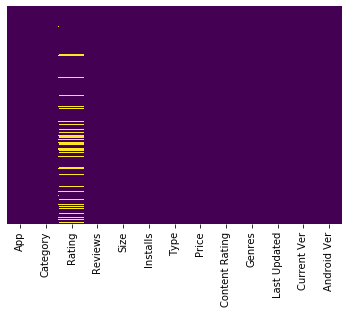

In [1698]:
# we can also see the null values by this
sns.heatmap(apps.isnull(),yticklabels=False, cbar=False, cmap= 'viridis')

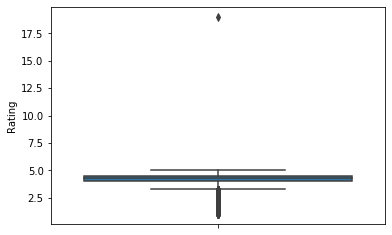

In [1699]:
# Checking For the Outliers

sns.boxplot(y=apps['Rating'])

In [1732]:
# We can see there are some Outliers in Ratings so, we have to fix that

# Using Inter Quantile Range Method to fix outliers

#->Calculating q75 and q25

q75, q25 = np.nanpercentile(apps['Rating'], [75 ,25])

In [1733]:
print("25% qunatile: " + str(q25),"75% quantile: " + str(q75))

25% qunatile: 4.0 75% quantile: 4.5


In [1884]:
#Inter-Quartile Range

iqr = q75-q25
print("IQR:" + str(iqr))

#We now create a benchmark using InterQuartile Range for Outlier Treatment.

bench = q75 + (iqr*1.5)
print("Benchmark: "+ str(bench))

#We use loc to identify the position of the outlier cell and replace it with our capping value.

apps.loc[apps['Rating'] > 5.25, 'Rating'] = np.nan

IQR:0.5
Benchmark: 5.25


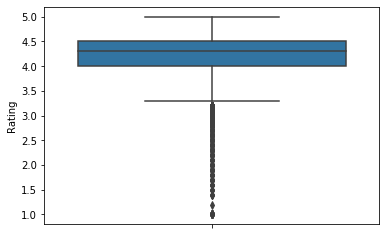

In [1735]:
sns.boxplot(y=apps['Rating'])

#we cam see most of the ratings are between 4.2 - 4.6
#we can see the boxplot
# We can see that many of the ratings are between 1-3 ,i.e variance is pretty high

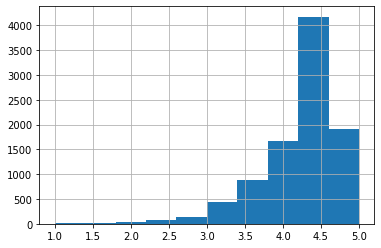

In [1704]:
apps['Rating'].hist()

In [1738]:
#How many apps having rating more than 4
apps[apps['Rating']>4]['App'].count()

6800

In [1706]:
#the missing values can be filled with the median if the histogram of right or left skewered
#categorical  data can be filled with mode.
#numerical data can be filled with median.

# We can also use Interpolation to fill the missing values.

In [1885]:
# filling Numerical data by interpolation.
apps = apps.interpolate()

In [1886]:
# filling categorical data with mode
apps.fillna(apps['Type'].mode().values[0],inplace=True)

In [1887]:
apps.fillna(apps['Current Ver'].mode().values[0],inplace=True)
apps.fillna(apps['Android Ver'].mode().values[0],inplace=True)

In [1742]:
apps.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

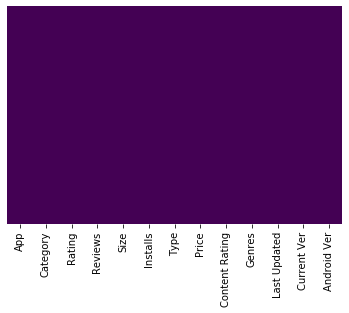

In [1711]:
sns.heatmap(apps.isnull(),yticklabels=False, cbar=False, cmap= 'viridis')

In [1888]:
#droping the duplicate rows
apps = apps.drop_duplicates()
apps.shape

(10367, 13)

In [1745]:
apps[apps['Price']=='Everyone']

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    3.85    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone           Free  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up        Free

In [1889]:
# Fixing the Bad data

apps['Reviews'] = apps['Reviews'].replace('3.0M',3000000)
apps['Price'] = apps['Price'].replace('Everyone',0)
apps['Type'] = apps['Type'].replace('0',np.nan)
apps['Type'] = apps['Type'].interpolate()

In [1890]:
#converting Price,Installs,Reviews into numeric
apps['Reviews'] = pd.to_numeric(apps['Reviews'])

apps['Size'] = apps['Size'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
apps['Size'] = apps['Size'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))

apps['Installs'] = apps['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
apps['Installs'] = apps['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))

apps['Price'] = apps['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
apps['Price'] = apps['Price'].apply(lambda x: float(x))

In [1748]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10367 entries, 0 to 10840
Data columns (total 13 columns):
App               10367 non-null object
Category          10367 non-null object
Rating            10367 non-null float64
Reviews           10367 non-null int64
Size              10367 non-null object
Installs          10367 non-null object
Type              10366 non-null object
Price             10367 non-null float64
Content Rating    10367 non-null object
Genres            10367 non-null object
Last Updated      10367 non-null object
Current Ver       10367 non-null object
Android Ver       10367 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [1891]:
apps['Installs'] = apps['Installs'].replace('Free',0)

apps['Installs'] = pd.to_numeric(apps['Installs'])

In [1811]:
# Feature Transformation
apps2 = apps.copy()
apps2['Installs'] = pd.to_numeric(apps2['Installs'])
apps2.skew()

Rating      -1.734079
Reviews     17.473102
Installs    10.131641
Price       23.328240
dtype: float64

In [1812]:
#-> Decresing skewness of the variables
apps2['Reviews'] = np.sqrt(np.sqrt(np.sqrt(apps2['Reviews'])));
apps2['Installs'] = np.sqrt(np.sqrt(np.sqrt(np.sqrt(apps2['Installs']))));
apps2['Price'] = np.sqrt(np.sqrt(np.sqrt(np.sqrt(np.sqrt(apps2['Price'])))));
apps2.skew()

## We can see we have reduced the skewness to lowest level which is pretty good for Machine Learning Models

Rating     -1.734079
Reviews     0.667975
Installs    0.144084
Price       3.267102
dtype: float64

In [1892]:
# Fixing the Similar values Issue
apps['Content Rating'] = apps['Content Rating'].replace('Everyone 10+','Everyone');
apps['Content Rating'] = apps['Content Rating'].replace('Adults only 18+','Mature 17+');

In [1814]:
#If an app has high number of installs, does it mean that it gets the more reviews from the users?

##### Here we will compare Apps2 (Installs and Reviews) which has reduced Skewenss near to Normal Distribution.
#####  and Apps (Installs and Reviews) which have original values.

install_reviews = apps2[['Installs','Reviews']]
install_reviews2 = apps[['Installs','Reviews']]

In [1815]:
install_reviews.head()
install_reviews2.head()

Installs   Reviews
0  1.778279  1.884407
1  2.270835  2.361448
2  2.622320  4.147221
3  3.028207  4.642129
4  2.053525  2.361448

Installs  Reviews
0     10000      159
1    500000      967
2   5000000    87510
3  50000000   215644
4    100000      967

In [1816]:
install_reviews.corr()

Installs   Reviews
Installs  1.000000  0.946082
Reviews   0.946082  1.000000

In [1817]:
install_reviews2.corr()

Installs  Reviews
Installs   1.00000  0.63496
Reviews    0.63496  1.00000

### We can see after Performing Feature Trasformation we have increase the Corrrelation from .63 to .94 which is very good.

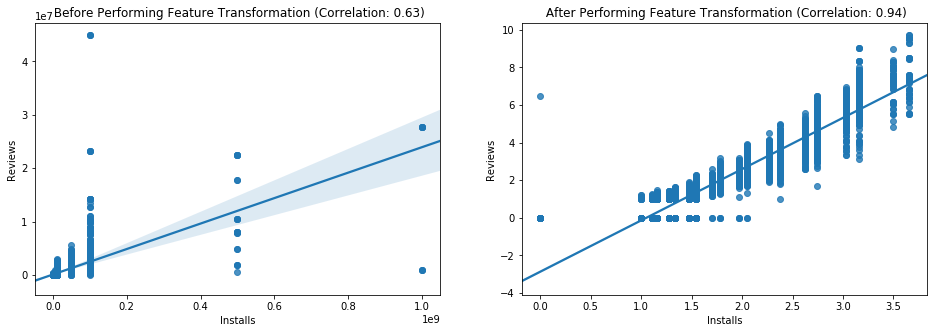

In [1818]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.regplot(data = apps[['Installs','Reviews']],x='Installs',y='Reviews')
plt.title(" Before Performing Feature Transformation (Correlation: 0.63)")

plt.subplot(122)
sns.regplot(data = install_reviews,x='Installs',y='Reviews');
plt.title(" After Performing Feature Transformation (Correlation: 0.94)");

#### A strong positive correlation of 0.94 exists between the number of reviews and number of downloads. This means that customers tend to download a given app more if it has been reviewed by a larger number of people.

#### This also means that many active users who download an app usually also leave back a review or feedback.

#### So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

In [1761]:
# Top 10 Categories (total number of apps in each Category )
top10_cateogries = apps.groupby(apps['Category'])['Category'].count().sort_values(ascending=False).head(10)

In [1762]:
top10_cateogries

Category
FAMILY             1943
GAME               1121
TOOLS               843
BUSINESS            427
MEDICAL             415
PRODUCTIVITY        407
PERSONALIZATION     388
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: Category, dtype: int64

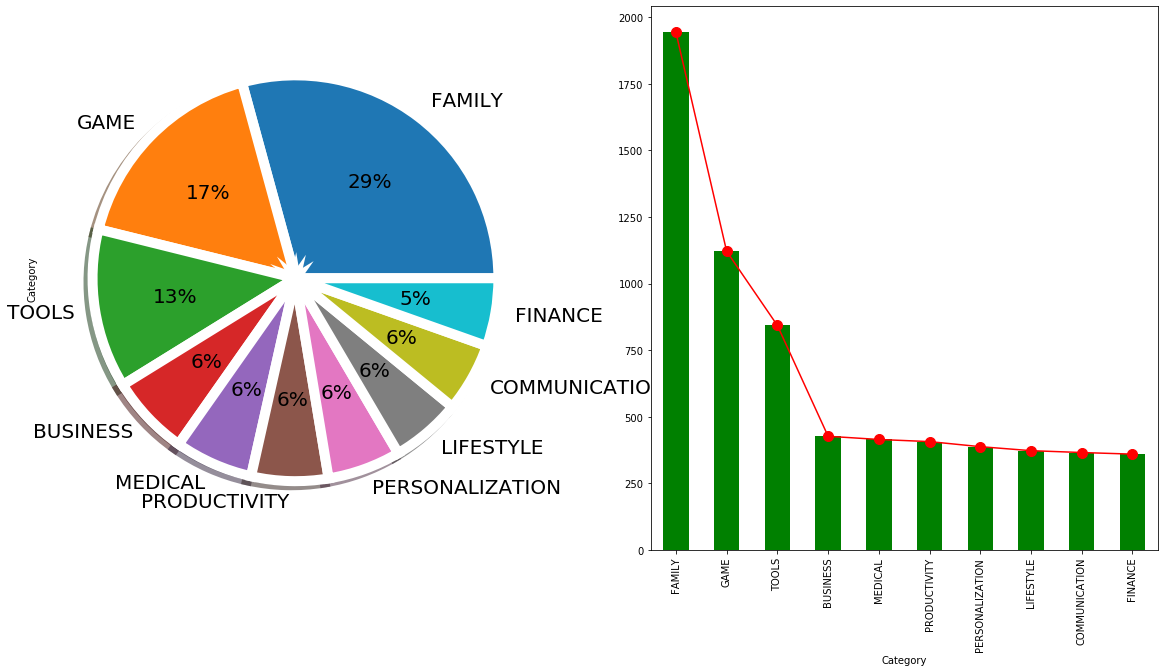

In [1763]:
plt.figure(figsize=(20,10))
plt.subplot(121)
top10_cateogries.plot.pie(autopct='%1.f%%',
                                                             wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                             shadow=True,
                                                             fontsize=20)

plt.subplot(122)
top10_cateogries.plot(marker='o',markersize=10,color='red')
top10_cateogries.plot(kind='bar',color='green');

#### We can see Family, Game and Tools are the Categories with most number of the Apps.

In [1819]:
Category_counts = apps['Category'].value_counts()
Category_counts.head()

FAMILY      1943
GAME        1121
TOOLS        843
BUSINESS     427
MEDICAL      415
Name: Category, dtype: int64

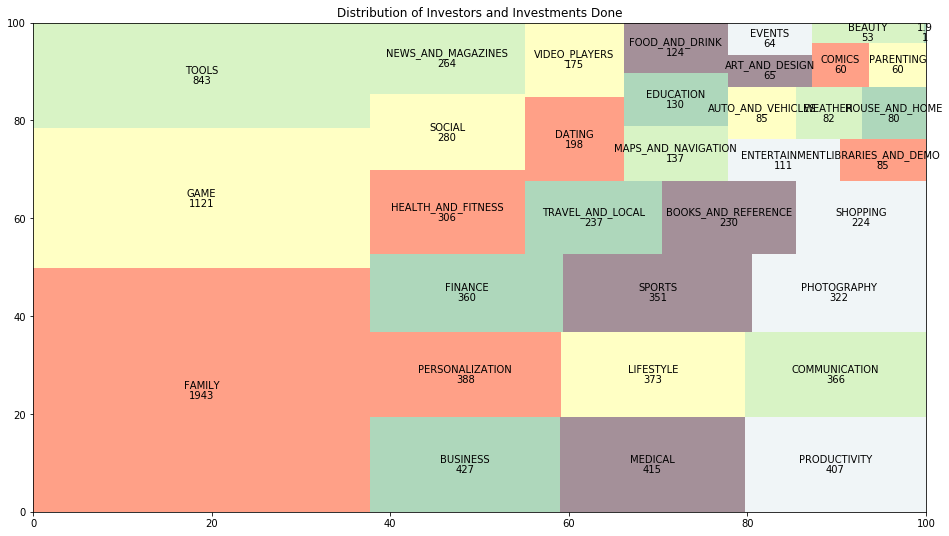

In [1766]:
plt.figure(figsize=(16,9))
squarify.plot(sizes=Category_counts.values,label=Category_counts.index,value=Category_counts.values,color=["#FF6138","#FFFF9D","#BEEB9F", "#79BD8F","#684656","#E7EFF3"], alpha=0.6)
plt.title('Distribution of Investors and Investments Done');

#### Here is the Tree Map to see different Cateogries and and number of Apps it contains

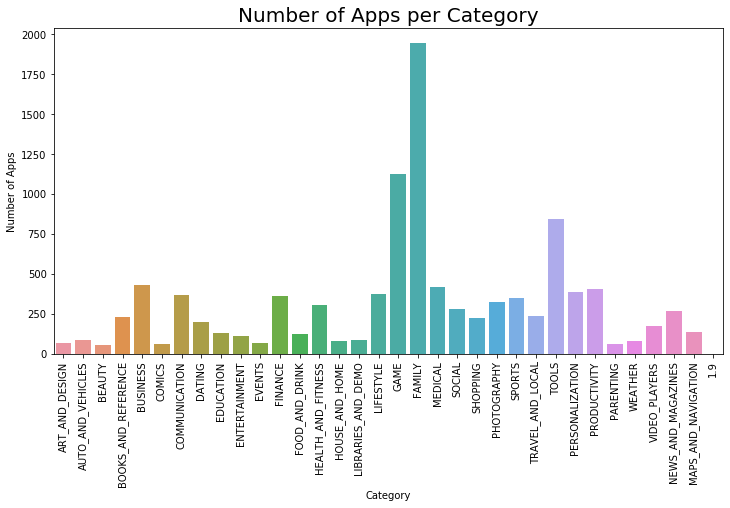

In [1770]:
plt.figure(figsize=(12,6))
sns.countplot(data=apps,x='Category')
plt.ylabel("Number of Apps")
plt.title("Number of Apps per Category", size=20)
plt.xticks(rotation=90);

In [1771]:
#Top 10 apps which got highest reviews in percentage
top10_Apps_Higest_Reviews = apps[['App','Reviews']].sort_values(by='Reviews',ascending=False).drop_duplicates('App').reset_index().drop('index',axis=1).head(10)
top10_Apps_Higest_Reviews['Reviews'] =round(top10_Apps_Higest_Reviews['Reviews']*100/top10_Apps_Higest_Reviews['Reviews'].sum())
top10_Apps_Higest_Reviews['Reviews'] = top10_Apps_Higest_Reviews['Reviews'].astype(int).astype(str)

top10_Apps_Higest_Reviews['Reviews'] = top10_Apps_Higest_Reviews['Reviews'].apply(lambda x: x+'%')
top10_Apps_Higest_Reviews

App Reviews
0                                           Facebook     17%
1                                 WhatsApp Messenger     15%
2                                          Instagram     14%
3           Messenger – Text and Video Chat for Free     12%
4                                     Clash of Clans     10%
5            Clean Master- Space Cleaner & Antivirus      9%
6                                     Subway Surfers      6%
7                                            YouTube      6%
8  Security Master - Antivirus, VPN, AppLock, Boo...      5%
9                                       Clash Royale      5%

#### Facebook has got highest Reviews as it is the most Famous followed by WhatsApp, Instagram and Messenger

In [1772]:
#Least 5 app with lowerst reviews
least5_Apps_lowest_Reviews = apps[['App','Reviews']].sort_values(by='Reviews').drop_duplicates('App').reset_index().drop('index',axis=1).head(5)
least5_Apps_lowest_Reviews

App  Reviews
0                              CQ Electrical Group        0
1                                Truth or Dare Pro        0
2  Private Dating, Hide App- Blue for PrivacyHider        0
3                                    AJ Wallpapers        0
4                              AJ Orange Icon Pack        0

#### These are the Apps Which didn't got any Ratings till now , may be due to very new to Play Store. 

In [1773]:
##############Top 5 highest size apps
a1 = apps[apps['Size'].str.contains('.M',regex=True)]
#apps2 = apps[apps['Size']=='.M']
top10_Apps_Higest_Size = a1[['App','Size']].sort_values(by='Size',ascending=False).drop_duplicates('Size').reset_index().drop('index',axis=1).head(10)
top10_Apps_Higest_Size

App Size
0                           Miami Crime Vice Town  99M
1                                  Clash of Clans  98M
2                                    Clash Royale  97M
3                                     Score! Hero  96M
4                                The Grand Bike V  95M
5                        Yoga Studio: Mind & Body  94M
6   Extreme Racing 2 - Real driving RC cars game!  93M
7                  Mass Effect: Andromeda APEX HQ  92M
8                             MARVEL Strike Force  91M
9  Guns Royale - Multiplayer Blocky Battle Royale  90M

#### Maimi Crime , Clash of Clans , Clash Royale are the most Bulky Apps

In [1774]:
###  Most Bulky Apps in Each Category
ap = apps2.copy()
ap = ap.dropna()
a2 = ap[ap['Size'].str.contains('.M',regex=True)]

t = a2[['Category','App','Size']]
t = t.groupby('Category')['App','Size'].max().sort_values(by='Size',ascending=False).drop_duplicates().reset_index()
t

Category                                                App  \
0                  GAME                                Аim Training for CS   
1    LIBRARIES_AND_DEMO                                       db.Mobil App   
2                 TOOLS   📏 Smart Ruler ↔️ cm/inch measuring for homework!   
3                FAMILY                                        中国語 AQリスニング   
4              SHOPPING                    パーリーゲイツ公式通販｜EJ STYLE（イージェイスタイル）   
5              BUSINESS                                               sABN   
6             PARENTING                   Zoo For Preschool Kids 3-9 Years   
7               MEDICAL                                               tökr   
8             EDUCATION                           play2prep: ACT, SAT prep   
9     AUTO_AND_VEHICLES                             Билеты ПДД CD 2019 PRO   
10   HEALTH_AND_FITNESS                         f.lux (preview, root-only)   
11          PHOTOGRAPHY                                               love   
12               SOCIAL      💘 WhatsLov: Smileys of love, stickers and GIF   
13               SPORTS  theScore: Live Sports Scores, News, Stats & Vi...   
14            LIFESTYLE                                         💎 I'm rich   
15              FINANCE                                              İşCep   
16        VIDEO_PLAYERS                            뽕티비 - 개인방송, 인터넷방송, BJ방송   
17      PERSONALIZATION                                         weather HD   
18     TRAVEL_AND_LOCAL                                            trip.bg   
19       FOOD_AND_DRINK                                         ¿Es Vegan?   
20  MAPS_AND_NAVIGATION                                         ÖBB Scotty   
21        COMMUNICATION                                            哈哈姆特不EY   
22   NEWS_AND_MAGAZINES            أحداث وحقائق | خبر عاجل في اخبار العالم   
23               BEAUTY                     ipsy: Makeup, Beauty, and Tips   
24               DATING                     stranger chat - anonymous chat   
25  BOOKS_AND_REFERENCE                                             日本AV历史   
26         PRODUCTIVITY                                             myGrow   
27       HOUSE_AND_HOME  乐屋网: Buying a house, selling a house, renting ...   
28              WEATHER                     wetter.com - Weather and Radar   
29               EVENTS                                  vide-greniers.org   
30        ENTERTAINMENT   🔥 Football Wallpapers 4K | Full HD Backgrounds 😍   
31       ART_AND_DESIGN                                          صور حرف H   
32               COMICS                                        감성학원 BL 첫사랑   

    Size  
0    99M  
1    99M  
2    99M  
3    99M  
4    98M  
5    98M  
6    98M  
7    97M  
8    97M  
9    97M  
10   96M  
11   96M  
12   96M  
13   95M  
14   94M  
15   93M  
16   91M  
17   91M  
18   90M  
19  9.9M  
20  9.9M  
21  9.9M  
22  9.9M  
23  9.9M  
24  9.8M  
25  9.8M  
26  9.8M  
27  9.7M  
28  9.7M  
29  9.7M  
30  9.7M  
31  9.4M  
32  9.1M

#### Tools , Games, Parenting, Family, Shopping , Medical , Education are the Having the Bulky apps

####  Food,Beauty, Travels, Weather, Entertainment, Dating, Arts, Comics are having light weighted apps

In [1893]:
# Top 10 most installed Apps
apps['Installs'] = pd.to_numeric(apps['Installs'])

top10_most_Installed_Apps = apps[['App','Installs']].sort_values(by='Installs',ascending=False).reset_index().drop('index',axis=1).head(10)
top10_most_Installed_Apps = top10_most_Installed_Apps[top5_most_Installed_Apps['Installs']!='Free']
top10_most_Installed_Apps

App    Installs
0                                  Hangouts  1000000000
1  Messenger – Text and Video Chat for Free  1000000000
2                 Maps - Navigate & Explore  1000000000
3                                 Instagram  1000000000
4                                     Gmail  1000000000
5                              Google Drive  1000000000
6                                  Facebook  1000000000
7                                 Instagram  1000000000
8              Google Chrome: Fast & Secure  1000000000
9                              Google Drive  1000000000

#### Hangouts, Messenger,Maps, Instagram, Gmail ect are the apps which are the top installed Apps.

#### We can say apps made by Google and Facebook are downloaded the most as they are IT giants.

In [1820]:
apps['Type'].value_counts()

Free    9600
Paid     766
Name: Type, dtype: int64

In [1782]:
#how many free and Paid apps are there in each App category
Top10_Free_Paid_Apps = pd.crosstab(apps['Category'],apps['Type']).sort_values(by=['Free','Paid'],ascending=False).head(10)
Top10_Free_Paid_Apps = Top10_Free_Paid_Apps.reset_index()
Top10_Free_Paid_Apps

Type       Category  Free  Paid
0            FAMILY  1756   187
1              GAME  1038    83
2             TOOLS   765    78
3          BUSINESS   415    12
4      PRODUCTIVITY   379    28
5         LIFESTYLE   354    19
6           FINANCE   343    17
7     COMMUNICATION   339    27
8           MEDICAL   330    85
9            SPORTS   327    24

#### Family Category is having the Highest number of Free and paid apps, followed by Game

#### In Free Category by Tools, Business , Productivity.

#### In Paid Category Medical and Games Apps are pretty costly followed by Tools.

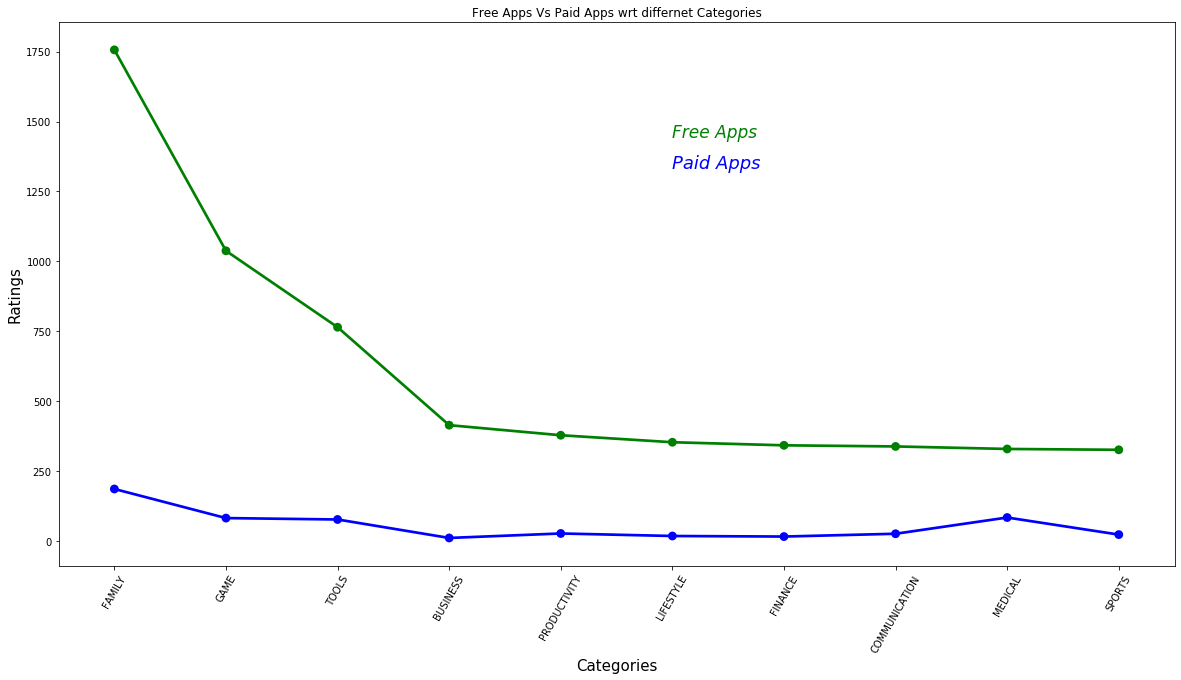

In [1783]:
f,ax2 = plt.subplots(figsize =(20,10))
sns.pointplot(data=Top10_Free_Paid_Apps,x='Category',y='Free',color='green',alpha=0.8)
sns.pointplot(data=Top10_Free_Paid_Apps,x='Category',y='Paid',color='blue',alpha=0.8)
plt.text(x = 5, y = 1444.3, s = 'Free Apps', color = 'green', fontsize = 17,style = 'italic')
plt.text(x = 5, y = 1333.46, s = 'Paid Apps', color='blue',fontsize = 18,style = 'italic')
plt.xlabel('Categories', fontsize = 15, color = 'black')
plt.ylabel('Ratings', fontsize = 15, color = 'black')
plt.xticks(rotation = 60);
plt.title("Free Apps Vs Paid Apps wrt differnet Categories");

<Figure size 1008x432 with 0 Axes>

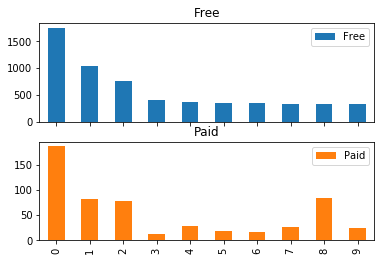

In [1784]:
plt.figure(figsize=(14,6))
Top10_Free_Paid_Apps.plot.bar(subplots=True);

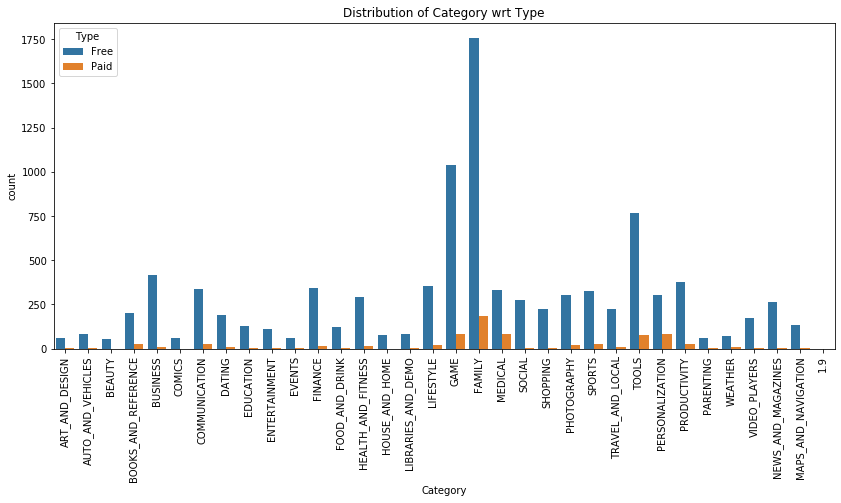

In [1785]:
plt.figure(figsize=(14,6))
sns.countplot(data=apps,x='Category',hue='Type')
plt.xticks(rotation=90)
plt.title("Distribution of Category wrt Type");

#### Almost all app categories perform decently. 

#### Health and Fitness and Books and Reference produce the highest quality apps with 50% apps having a rating greater than 4.5. This is extremely high!

#### On the contrary, 50% of apps in the Dating category have a rating lesser than the average rating.

#### A few junk apps also exist in the Lifestyle, Family and Finance category.

In [1786]:
#Top 10 apps having maximum prices
top10_apps_MaxPrice = apps[['App','Category','Price']].sort_values(by='Price',ascending=False).drop_duplicates('Price').reset_index().drop('index',axis=1).head(10)
top10_apps_MaxPrice

App      Category   Price
0  I'm Rich - Trump Edition     LIFESTYLE  400.00
1         I Am Rich Premium       FINANCE  399.99
2               Eu Sou Rico       FINANCE  394.99
3                 I Am Rich        FAMILY  389.99
4       I am extremely Rich     LIFESTYLE  379.99
5             I am rich VIP     LIFESTYLE  299.99
6              EP Cook Book       MEDICAL  200.00
7             cronometra-br  PRODUCTIVITY  154.99
8   BP Fitness Lead Scanner        EVENTS  109.99
9                   Lean EQ      BUSINESS   89.99

#### I am Rich - Trump Edition is mostly expesive of Lifestyle Category 
#### I am Rich Premium, Eu Sou Rico are the next most expensive of Finance Category

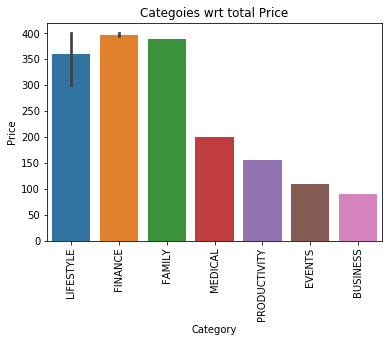

In [1787]:
sns.barplot(data=top10_apps_MaxPrice,x='Category',y='Price')
plt.xticks(rotation=90)
plt.title("Categoies wrt total Price");

#### Though Lifestyle App was the most Costly one still,
#### Finance Category apps are mostly the Costly ones and Family has almost the same trend as well. 
#### Followed bt Lifestyle and Medical Apps.

In [1792]:
top10_apps_MaxPrices = apps.groupby(['Category','App'])['Category','App','Price'].sum().sort_values(by='Price',ascending=False).drop_duplicates().head(10)
top10_apps_MaxPrices

Price
Category     App                                      
LIFESTYLE    I'm Rich - Trump Edition           400.00
             I'm Rich/Eu sou Rico/أنا غني/我很有錢  399.99
FINANCE      Eu Sou Rico                        394.99
FAMILY       I Am Rich                          389.99
LIFESTYLE    I am extremely Rich                379.99
             I am rich VIP                      299.99
MEDICAL      EP Cook Book                       200.00
PRODUCTIVITY cronometra-br                      154.99
EVENTS       BP Fitness Lead Scanner            109.99
BUSINESS     Lean EQ                             89.99

<Figure size 864x432 with 0 Axes>

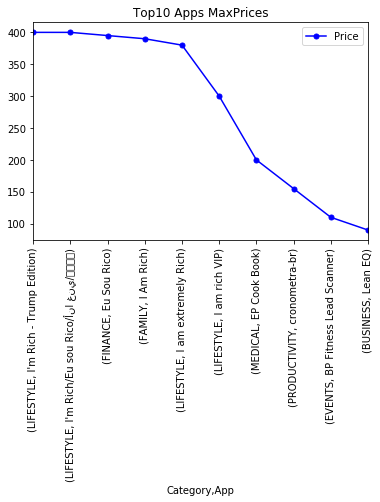

In [1790]:
plt.figure(figsize=(12,6))
top10_apps_MaxPrices.plot(kind='line',marker='o',markersize=5,color='blue')
plt.xticks(rotation=90)
plt.title("Top10 Apps MaxPrices");

In [1894]:
#Different Content ratings
apps['Content Rating'].value_counts()

# Category Rating with Free is wrong so we will remove that one.
apps['Content Rating'] = apps['Content Rating'].replace('Free',np.nan).dropna() 
apps['Content Rating'].value_counts()

Everyone      8766
Teen          1146
Mature 17+     452
Unrated          2
Free             1
Name: Content Rating, dtype: int64

Everyone      8766
Teen          1146
Mature 17+     452
Unrated          2
Name: Content Rating, dtype: int64

#### Most the Apps can are made for Everyone.

#### Teen Apps are also pretty high that would include mostly Education Apps.

#### Mature Apps are reasonable that would include like Dating Apps 

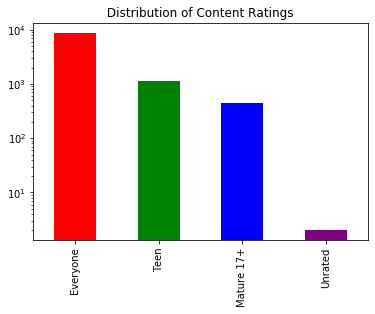

In [1830]:
apps['Content Rating'].value_counts().plot(kind='bar',color=['red','green','blue','purple','brown','yellow'])
plt.yscale('log')
plt.title(" Distribution of Content Ratings ");

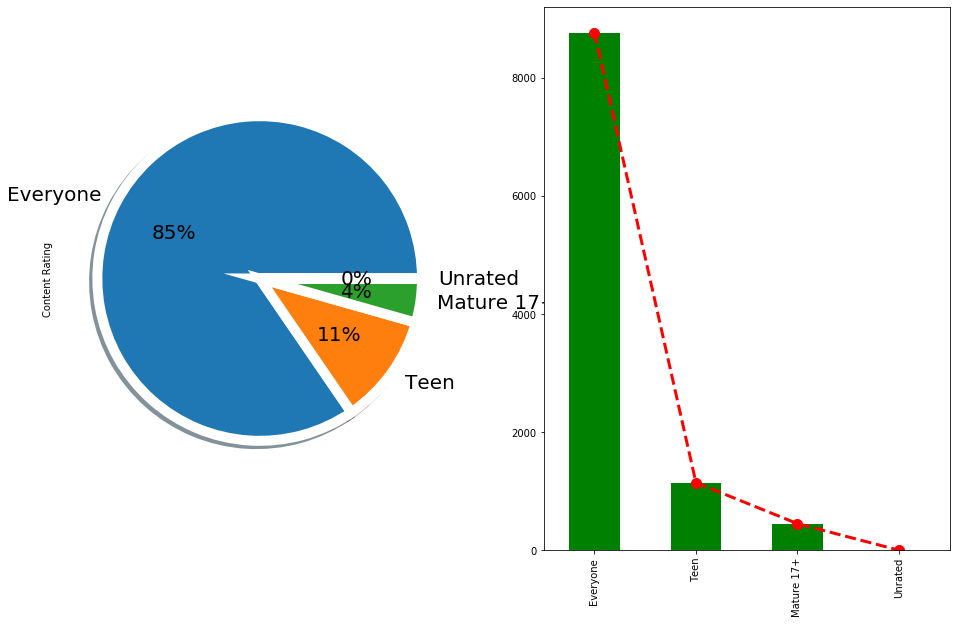

In [1831]:
# Content Rating Distribution
plt.figure(figsize=(16,10))
plt.subplot(121)
apps['Content Rating'].value_counts().plot.pie(autopct='%1.f%%',
                                                             wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                             shadow=True,
                                                             fontsize=20)

plt.subplot(122)
apps['Content Rating'].value_counts().plot(color='red',marker='o',markersize='10',linestyle='dashed',linewidth=3)
apps['Content Rating'].value_counts().plot(kind='bar',color='green');

In [1832]:
appCategory_ContentRatings = pd.crosstab(apps['Category'],apps['Content Rating'])
appCategory_ContentRatings.sort_values(['Everyone','Teen'],ascending=False).head(8)

Content Rating  Everyone  Mature 17+  Teen  Unrated
Category                                           
FAMILY              1631          50   261        1
TOOLS                835           2     5        1
GAME                 723          72   326        0
BUSINESS             413           1    13        0
MEDICAL              405           5     5        0
PRODUCTIVITY         397           1     9        0
FINANCE              355           0     5        0
LIFESTYLE            342           9    22        0

#### Family Category has the highest Content Rating Everyone type Apps, followed by Tools

#### Game Category has the highest Content Rating Teen type and Mature 17 + Apps that shows many mature and teen play games ex       PUBG or Subway Surf

#### Other Categories are mostly made for  Everyone Type.

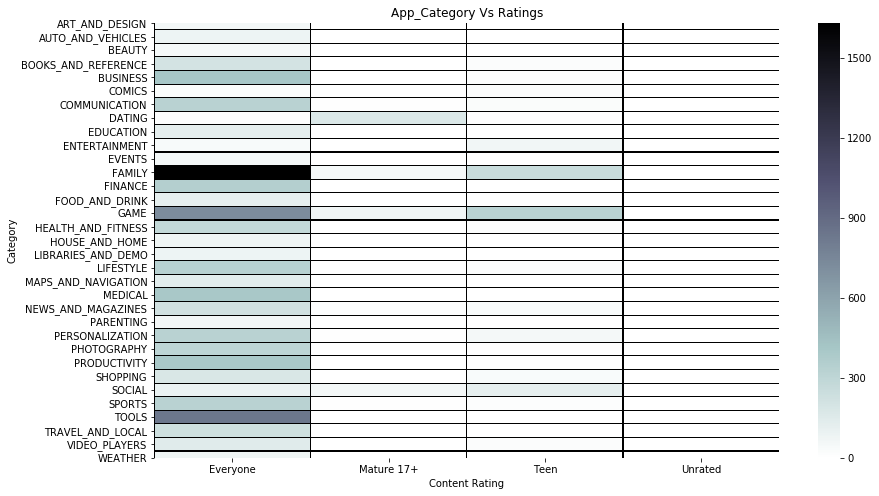

In [1833]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.heatmap(data=appCategory_ContentRatings,linewidths=0.1,linecolor='black',cmap='bone_r')
plt.title('App_Category Vs Ratings');

<Figure size 1008x576 with 0 Axes>

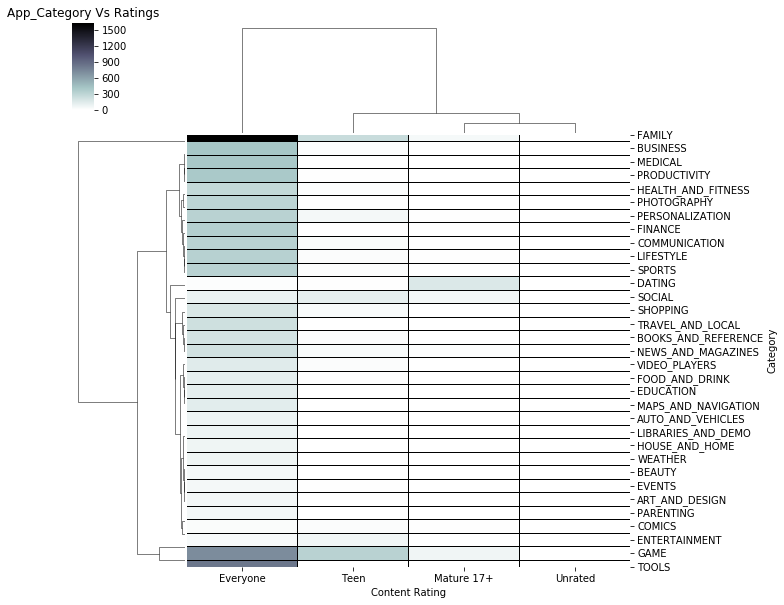

In [1834]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.clustermap(data=appCategory_ContentRatings,linewidths=0.1,linecolor='black',cmap='bone_r')
plt.title('App_Category Vs Ratings');

In [1898]:
apps['Android Ver'].value_counts().head(5)

4.1 and up      2379
4.0.3 and up    1458
4.0 and up      1338
0               1221
4.4 and up       894
Name: Android Ver, dtype: int64

In [1900]:
# We need to Fix this Android Versions and convert it into better form
apps['Android Ver'] = apps['Android Ver'].apply(lambda x:x.split('W')[0])
apps = apps[apps['Android Ver']!='Free']
apps['Android Ver']=apps['Android Ver'].apply(lambda x:x[0:3])
apps['Android Ver'] = apps['Android Ver'].astype(float);
apps['Android Ver'] = round(apps['Android Ver'])
apps['Android Ver'].value_counts()

4.0    6705
2.0    1470
0.0    1221
5.0     573
3.0     283
6.0      58
7.0      46
8.0       6
1.0       2
Name: Android Ver, dtype: int64

In [1912]:
# Converting 0.0 a resonable value
apps['Android Ver'] = apps['Android Ver'].replace(0.0,np.nan)
apps['Android Ver'] = apps['Android Ver'].fillna(method='ffill')
apps['Android Ver'].value_counts()

4.0    7624
2.0    1606
5.0     693
3.0     315
6.0      63
7.0      50
8.0      11
1.0       2
Name: Android Ver, dtype: int64

In [1913]:
## Distribution of People using different Android Versions wrt Type of App installed
apps = apps[apps['Android Ver']!='Free']
Android_version_Type = pd.crosstab(apps['Type'],apps['Android Ver'])
Android_version_Type.reset_index()

Android Ver  Type  1.0   2.0  3.0   4.0  5.0  6.0  7.0  8.0
0            Free    2  1363  274  7198  657   58   37   10
1            Paid    0   243   41   426   36    5   13    1

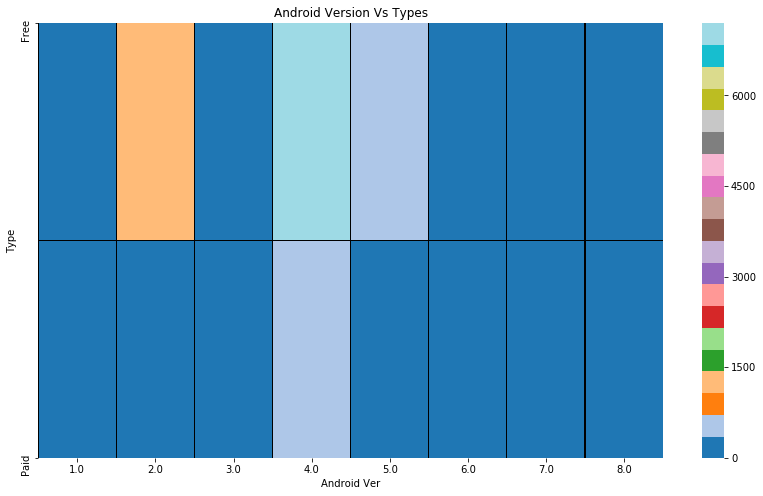

In [1914]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.heatmap(data= Android_version_Type,linewidths=0.1,linecolor='black',cmap='tab20')
plt.title('Android Version Vs Types');

#### In Paid Version we can see apps are moslty running on Android Version 4 which is Jelly Bean (pretty old)

#### In Free Version we can see apps are moslty running on Android Version  4 followed by 5.

#### Very Few People who are using latest versions like Android 7 or 8.

#### There are People around 660 using Android Version 5 with Type Free.

In [1915]:
#Updatings of apps
apps['Last Updated'].value_counts()

August 3, 2018       298
August 2, 2018       270
July 31, 2018        269
August 1, 2018       257
July 30, 2018        195
                    ... 
June 4, 2017           1
January 22, 2015       1
March 24, 2017         1
September 3, 2016      1
October 1, 2013        1
Name: Last Updated, Length: 1377, dtype: int64

In [1916]:
### Feature Creation

#creating a new column of Month and Year
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])

In [1917]:
def get_monthName(dt):
    var = str(dt.month_name()) + " " + str(dt.year)
    return var

apps['Last_Updated_Month'] = apps['Last Updated'].map(get_monthName)

In [1918]:
def get_month(dt):
    return dt.month_name()

apps['Month_of_Updation'] = apps['Last Updated'].map(get_month)

def get_year(dt):
    return dt.year

apps['Year_of_Updation'] = apps['Last Updated'].map(get_year)

In [1919]:
#Updatings of apps
updates = apps['Year_of_Updation'].value_counts()

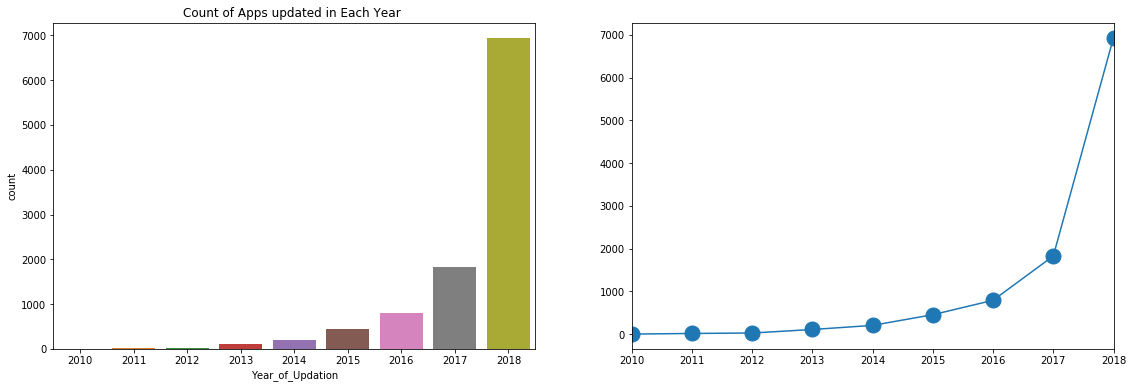

In [1920]:
plt.figure(figsize=(19,6))
plt.subplot(121)
sns.countplot(data=apps,x='Year_of_Updation')
plt.title("Count of Apps updated in Each Year ");

plt.subplot(122)
updates.plot(kind='line',marker='o',markersize=15);

#### We can see there is imcrease in updation of Apps but almost an exponential growth in updation of Apps in 2018 compared be other years.  

#### That shows the increase in using of Apps by  people  and as the Apps become more and more popular they use to update there app more frequently.

In [ ]:
### Which category has updated there apps most of the time

### top 5 apps updated most of the time

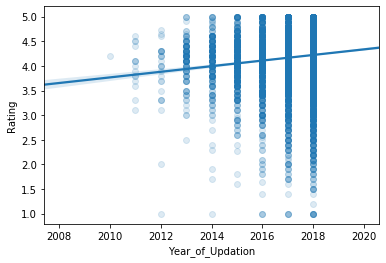

In [1921]:
apps['Year_of_Updation'] = apps['Year_of_Updation'].astype(int)
sns.regplot(data=apps,x='Year_of_Updation',y='Rating',scatter_kws={'alpha':0.15})

#### From the Trend we can see predict that if the Apps Are updated frequently their ratings will also increase simulataniously.

In [1925]:
## Category wise total times updation in each year.
updating_Apps_year =  pd.crosstab(apps['Category'],apps['Year_of_Updation'])
updating_Apps_year

Year_of_Updation     2010  2011  2012  2013  2014  2015  2016  2017  2018
Category                                                                 
ART_AND_DESIGN          0     0     0     0     0     0     0    12    53
AUTO_AND_VEHICLES       0     0     0     0     1     0     3     7    74
BEAUTY                  0     0     0     0     0     0     1    12    40
BOOKS_AND_REFERENCE     0     1     0     3     9    23    27    51   116
BUSINESS                0     1     1     4     7    24    38    82   270
COMICS                  0     0     0     0     0     1     1     8    50
COMMUNICATION           0     0     1     3    10    20    23    56   253
DATING                  0     0     0     0     0     0     3    15   180
EDUCATION               0     0     0     1     3     5     9    26    86
ENTERTAINMENT           0     0     0     0     0     3     2     2   104
EVENTS                  0     0     0     0     0     0     2    16    46
FAMILY                  1     1     9    16    40   102   206   448  1120
FINANCE                 0     0     1     3     0     5    14    48   289
FOOD_AND_DRINK          0     0     0     0     0     0     5     8   111
GAME                    0     4     2    18    26    62    80   184   745
HEALTH_AND_FITNESS      0     0     2     1     3     8    15    32   245
HOUSE_AND_HOME          0     0     0     1     0     7     1    10    61
LIBRARIES_AND_DEMO      0     1     1     2     1     2     7    35    36
LIFESTYLE               0     1     0     3     6    18    38    86   221
MAPS_AND_NAVIGATION     0     0     0     3     1     3     5    21   104
MEDICAL                 0     0     3     6    12    17    22    78   277
NEWS_AND_MAGAZINES      0     0     0     0     5     6    15    34   204
PARENTING               0     0     0     0     0     0     2     7    51
PERSONALIZATION         0     0     0    16    17    24    61    56   212
PHOTOGRAPHY             0     0     1     0     5    14    23    69   210
PRODUCTIVITY            0     0     1     5    12    20    37    65   267
SHOPPING                0     0     1     1     0     3     7    19   193
SOCIAL                  0     0     0     2     4     9    17    37   211
SPORTS                  0     0     0     4     4     9    17    55   262
TOOLS                   0     6     3    10    26    49    75   180   494
TRAVEL_AND_LOCAL        0     0     0     1     2     6    19    30   179
VIDEO_PLAYERS           0     0     0     4     4    12    14    28   113
WEATHER                 0     0     0     1     6     2     2    10    61

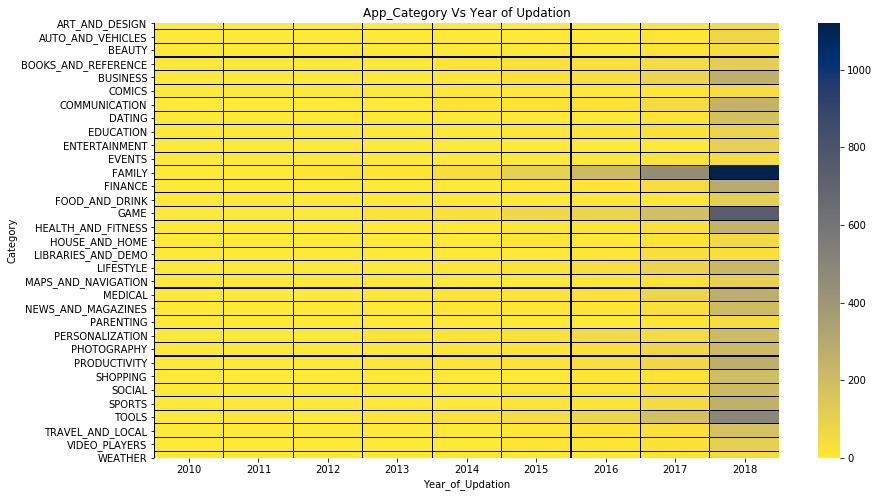

In [1928]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.heatmap(data=updating_Apps_year,linewidths=0.1,linecolor='black',cmap='cividis_r')
plt.title('App_Category Vs Year of Updation');

#### Almost all category apps have started their updation quite frequently from 2018.

#### Categories like Family , Game, Tools have started their updations frequently from 2015-2016 , though they have much larger number of Apps.

In [1929]:
## Category wise updation wrt to Months

updating_Apps_month =  pd.crosstab(apps['Category'],apps['Month_of_Updation'])
updating_Apps_month

Month_of_Updation    April  August  December  February  January  July  June  \
Category                                                                      
ART_AND_DESIGN           8       6         1         0        5    19     6   
AUTO_AND_VEHICLES        3      12         1         4        1    36    11   
BEAUTY                   5       6         1         2        1    11     7   
BOOKS_AND_REFERENCE     17      28        11        13       13    35    26   
BUSINESS                38      47        18        30       22    91    55   
COMICS                   0       6         2         0        2    27     7   
COMMUNICATION           22      62        12        15       19   131    25   
DATING                   5      31         2         6        4   121    15   
EDUCATION                3      20        11         4        3    46    14   
ENTERTAINMENT            2      20         1         2        4    56    15   
EVENTS                   2       7         6         0        1    21    11   
FAMILY                 123     212        97       109      121   422   274   
FINANCE                 17      47         6        22       14   121    52   
FOOD_AND_DRINK           8      26         0         3        5    46    16   
GAME                    63     137        58        45       44   366   121   
HEALTH_AND_FITNESS      13      41         7        13       10   133    39   
HOUSE_AND_HOME           3      19         1         3        0    32     7   
LIBRARIES_AND_DEMO       4       5         3        27        7    11     9   
LIFESTYLE               18      35        22        19       21    88    60   
MAPS_AND_NAVIGATION      6      33         7         5        6    39     9   
MEDICAL                 32      38        15        11       31   142    33   
NEWS_AND_MAGAZINES      13      49         7        15        6    82    39   
PARENTING                3       9         2         0        3    16    10   
PERSONALIZATION         34      41        22        18       19    71    50   
PHOTOGRAPHY             16      53         6        25       15    88    34   
PRODUCTIVITY            21      67        22        14       20   109    43   
SHOPPING                 6      73         3         9        5    82    19   
SOCIAL                   9      60         8         8        8    89    32   
SPORTS                  14      67        13        34       16    93    39   
TOOLS                   57      98        41        60       36   192    91   
TRAVEL_AND_LOCAL        15      52         3         4       13    75    25   
VIDEO_PLAYERS           13      35        10         3        3    43    20   
WEATHER                  7      24         2         4        2    21    12   

Month_of_Updation    March  May  November  October  September  
Category                                                       
ART_AND_DESIGN           9    4         4        2          1  
AUTO_AND_VEHICLES        4    8         3        2          0  
BEAUTY                   6    8         2        2          2  
BOOKS_AND_REFERENCE     20   29        12       14         12  
BUSINESS                29   40        16       24         17  
COMICS                   3    8         3        1          1  
COMMUNICATION           20   24        16        9         11  
DATING                   3    7         2        1          1  
EDUCATION                4   11         4        7          3  
ENTERTAINMENT            3    5         0        0          3  
EVENTS                   0    8         3        4          1  
FAMILY                 146  184        99       82         74  
FINANCE                 19   38         7       11          6  
FOOD_AND_DRINK           6    7         3        3          1  
GAME                    60  116        39       38         34  
HEALTH_AND_FITNESS      13   18         7        9          3  
HOUSE_AND_HOME           7    4         2        0          2  
LIBRARIES_AND_DEMO

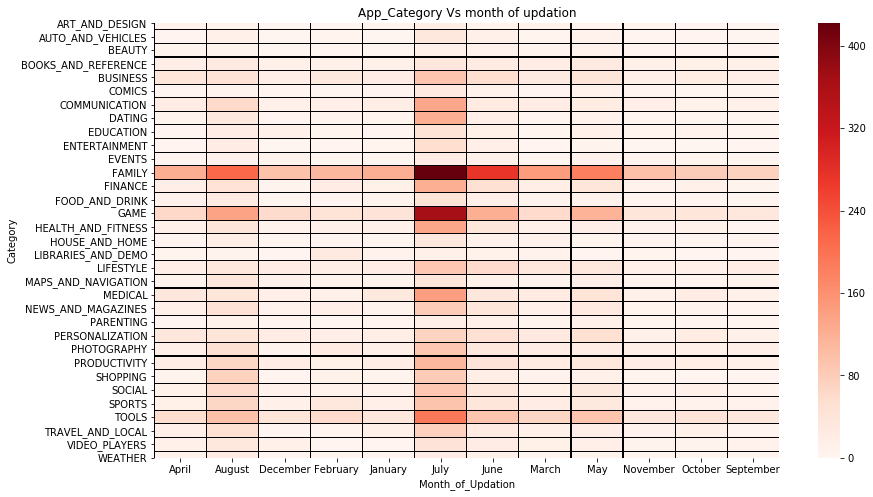

In [1931]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.heatmap(data=updating_Apps_month,linewidths=0.1,linecolor='black',cmap='Reds')
plt.title('App_Category Vs month of updation');

#### Most to Categories Apps have updated their apps in July specially Family and Games 

#### Next Frequent months are June , May and August.

#### We can say updation period is from May to  August of Most of the Apps.

#### Family Category Apps are updated almost Every month.

<Figure size 1008x576 with 0 Axes>

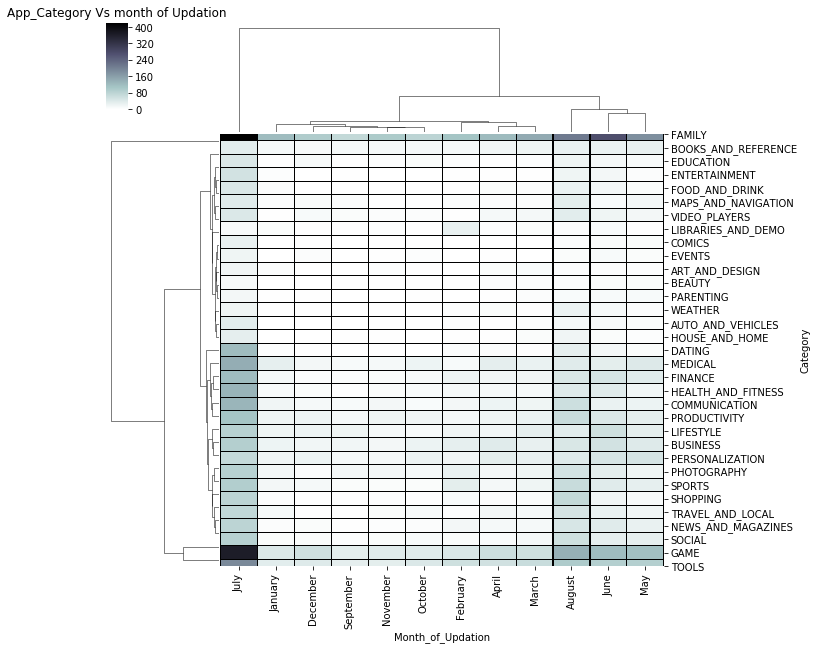

In [1932]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.clustermap(data=updating_Apps_month,linewidths=0.1,linecolor='black',cmap='bone_r')
plt.title('App_Category Vs month of Updation');

In [1933]:
apps['Current Ver'].value_counts()

Varies with device    1302
1                      835
1.1                    271
1.2                    185
2                      163
                      ... 
3.69.0                   1
2.20 Build 02            1
5.4.7                    1
1.0.180206               1
5.11.3.1                 1
Name: Current Ver, Length: 2784, dtype: int64

In [1934]:
#Number of Versions of each app Category
current_version = apps[['Category','Android Ver']].groupby('Category').count().sort_values(by='Android Ver',ascending=False).reset_index().head(10)
current_version

Category  Android Ver
0           FAMILY         1943
1             GAME         1121
2            TOOLS          843
3         BUSINESS          427
4          MEDICAL          415
5     PRODUCTIVITY          407
6  PERSONALIZATION          386
7        LIFESTYLE          373
8    COMMUNICATION          366
9          FINANCE          360

<Figure size 864x288 with 0 Axes>

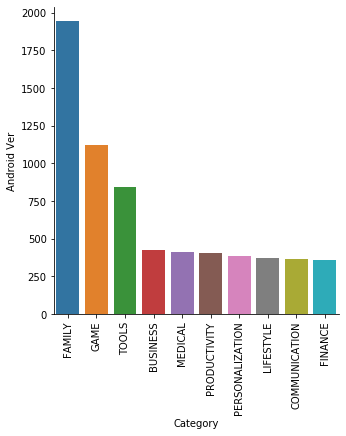

In [1935]:
plt.figure(figsize=(12,4))
sns.catplot(data=current_version,x='Category',y='Android Ver',kind='bar')
plt.xticks(rotation=90);

In [ ]:
#a= apps['Android Ver'].apply(lambda x:x.split(' ')[0])

In [1938]:
a = apps[['Category','Android Ver']]

In [ ]:
apps['Android Ver'] = apps['Android Ver'].apply(lambda x:x.split(' ')[0]);

In [1939]:
# remove/ deselect the unwanted column 'Varies'
apps = apps[apps['Android Ver']!='Varies']
apps['Android Ver'] = apps['Android Ver'].replace('4.4W','4.4')

a = apps[['Category','Android Ver']].copy()
a

Category  Android Ver
0           ART_AND_DESIGN          4.0
1           ART_AND_DESIGN          4.0
2           ART_AND_DESIGN          4.0
3           ART_AND_DESIGN          4.0
4           ART_AND_DESIGN          4.0
...                    ...          ...
10836               FAMILY          4.0
10837               FAMILY          4.0
10838              MEDICAL          2.0
10839  BOOKS_AND_REFERENCE          2.0
10840            LIFESTYLE          2.0

[10364 rows x 2 columns]

In [1940]:
# Number of Android Versions Supported By Categories
top10_apps_version = a.groupby('Category')['Android Ver'].count().sort_values(ascending=False).head(10)
top10_apps_version

Category
FAMILY             1943
GAME               1121
TOOLS               843
BUSINESS            427
MEDICAL             415
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: Android Ver, dtype: int64

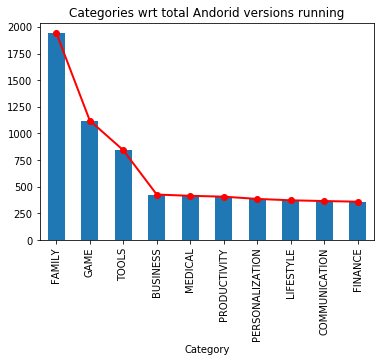

In [1941]:
top10_apps_version.plot(color='red',marker='o',linewidth=2)
top10_apps_version.plot(kind='bar')
plt.xticks(rotation=90)
plt.title("Categories wrt total Andorid versions running");

#### Family, Game and Tools are categories with highest number of Android Versions running.

#### This shows apps in these categories are more stable and compatible and work best with any of the android version.

In [1942]:
#Latest versions of all Categories of Apps
versions =  a.groupby('Category')['Android Ver'].max().sort_values(ascending=False)
versions = versions.reset_index()
versions = versions[(versions['Category']!='1.9') & (versions['Android Ver']!='1.9')]

versions['Android Ver'] = versions['Android Ver'].replace('Free',np.nan)
versions.dropna(inplace=True)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [1943]:
versions.head(10)

Category  Android Ver
0              MEDICAL          8.0
1                TOOLS          8.0
2   HEALTH_AND_FITNESS          8.0
3      PERSONALIZATION          8.0
4             BUSINESS          7.0
5                 GAME          7.0
6        VIDEO_PLAYERS          7.0
7   LIBRARIES_AND_DEMO          7.0
8            LIFESTYLE          7.0
9  BOOKS_AND_REFERENCE          7.0

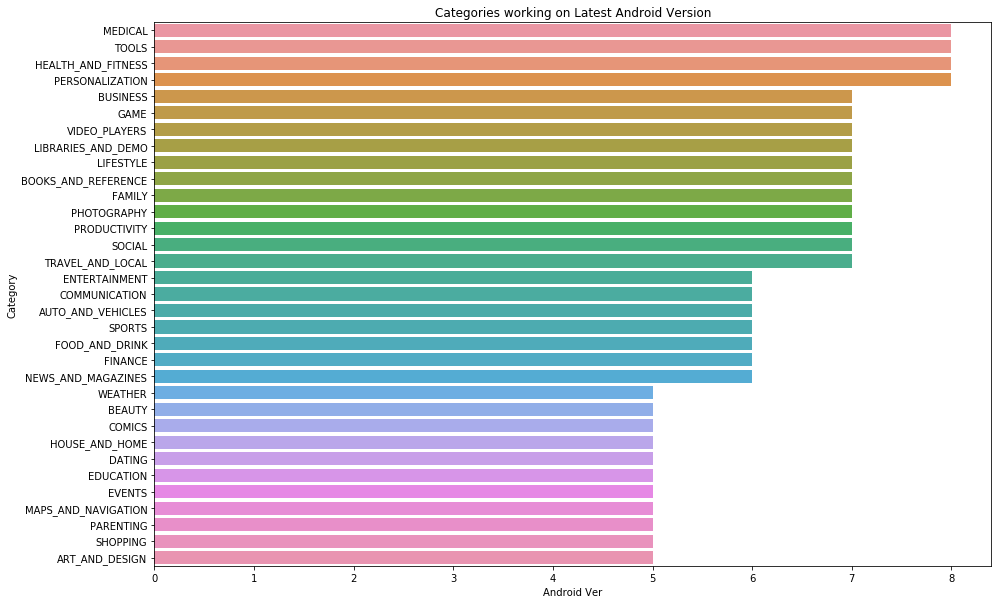

In [1944]:
versions['Android Ver'] = pd.to_numeric(versions['Android Ver'])

plt.figure(figsize=(15,10))
sns.barplot(data=versions,y='Category',x='Android Ver')
plt.title("Categories working on Latest Android Version");

#### Tools, Medical and Health-Fitness are the Categories which are supporting latest Android Version.

#### Most of the Categories apps are supporting android version between 6-8 android version.

#### Categories like Weather, Dating, Beauty, Shopping ect are still support upto android version 5.  That is why they have less number of users using these apps compared to other Categories.

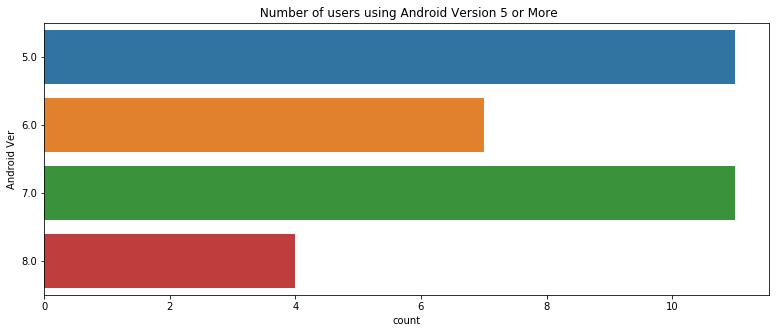

In [1945]:
plt.figure(figsize=(13,5))
sns.countplot(data=versions,y='Android Ver')
plt.title(" Number of users using Android Version 5 or More");

#### Most of the people are still using Android Version 5 and 7 which we have seen sometime ago followed by 6 and 8.

In [1951]:
fg = apps2[['Category','Rating']].copy()
fg['Rating'] = round(fg['Rating'])
fg.groupby(apps['Category'])['Rating'].value_counts()

Category           Rating
ART_AND_DESIGN     4.0       38
                   5.0       24
                   3.0        3
AUTO_AND_VEHICLES  4.0       53
                   5.0       24
                             ..
VIDEO_PLAYERS      3.0       16
                   2.0        4
WEATHER            4.0       70
                   5.0       10
                   3.0        2
Name: Rating, Length: 132, dtype: int64

In [1952]:
#Top 10 Cateogy which got highest Raatings
top10_rating_eachApp = fg.groupby(apps['Category'])['Rating'].value_counts()
top10_rating_eachApp = top10_rating_eachApp.unstack().reset_index()
top10_rating_eachApp.columns=['Category','1 star','2 star','3 star','4 star','5 star']

top10_rating_eachApp = top10_rating_eachApp.sort_values(['5 star','4 star'],ascending=False).head(10)
top10_rating_eachApp = top10_rating_eachApp.fillna(0)
top10_rating_eachApp = top10_rating_eachApp.reset_index().set_index('index').reset_index().drop('index',axis=1)
top10_rating_eachApp

Category  1 star  2 star  3 star  4 star  5 star
0              FAMILY     3.0    21.0   122.0  1370.0   427.0
1                GAME     2.0     3.0    29.0   874.0   213.0
2               TOOLS     4.0    22.0    90.0   587.0   140.0
3             MEDICAL     3.0    10.0    35.0   245.0   122.0
4  HEALTH_AND_FITNESS     1.0    11.0    22.0   160.0   112.0
5     PERSONALIZATION     0.0     2.0    13.0   267.0   104.0
6           LIFESTYLE     0.0    11.0    38.0   223.0   101.0
7            BUSINESS     1.0     9.0    47.0   272.0    98.0
8             FINANCE     3.0    10.0    26.0   232.0    89.0
9        PRODUCTIVITY     1.0     7.0    25.0   288.0    86.0

#### We can see Family Category has got max 5 star and 4 star ratings . This is all because of frequent Updatings which they started from 2015-16 onwards.

#### Most of the Other apps have got maximum 4 starts ratings and very free 2 or 1 star. 

#### This is the reason why average Ratings is 4.1

In [1953]:
#Melting the  top10_rating_each category

melted_top10_rating_eachApp = pd.melt(top10_rating_eachApp, 
                    id_vars=["Category"],
                    var_name=["1 star"])

melted_top10_rating_eachApp.columns=["Category","Ratings","Count"]
melted_top10_rating_eachApp.head()

Category Ratings  Count
0              FAMILY  1 star    3.0
1                GAME  1 star    2.0
2               TOOLS  1 star    4.0
3             MEDICAL  1 star    3.0
4  HEALTH_AND_FITNESS  1 star    1.0

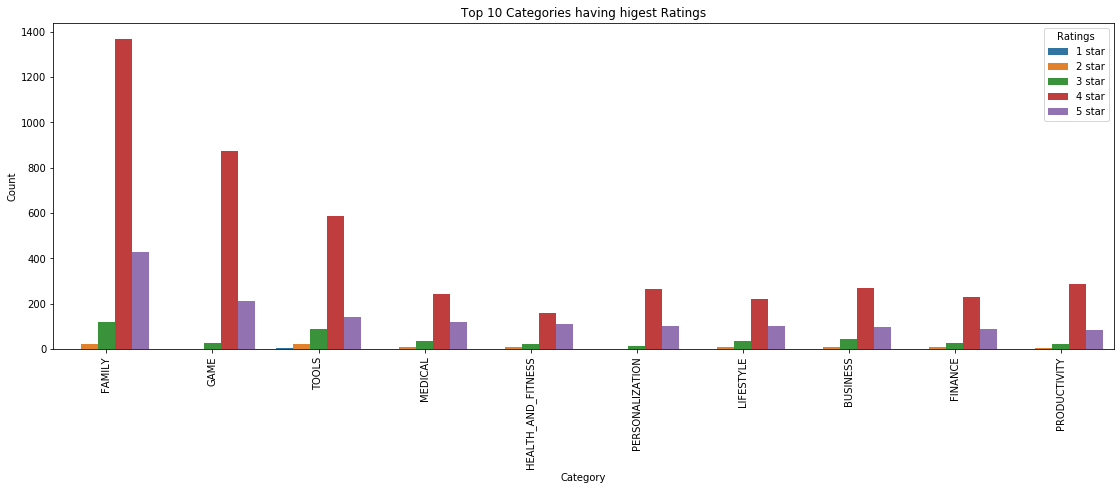

In [1954]:
plt.figure(figsize=(19,6))
sns.barplot(data=melted_top10_rating_eachApp,x='Category',y='Count',hue='Ratings')
plt.xticks(rotation=90)
plt.title("Top 10 Categories having higest Ratings");

In [1955]:
Ratingscols = apps[['App','Category','Rating']].copy()

In [1956]:
Ratingscols.sort_values('Rating', ascending=False).groupby(['Category'])['Rating'].value_counts()

Category        Rating  
ART_AND_DESIGN  4.700000    14
                4.400000     8
                4.100000     7
                4.200000     7
                4.800000     5
                            ..
WEATHER         4.100000     1
                4.150000     1
                4.250000     1
                4.266667     1
                4.688889     1
Name: Rating, Length: 1553, dtype: int64

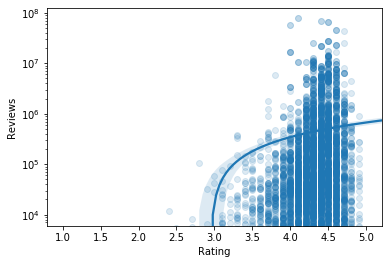

In [1958]:
# Relation between Ratings and Reviews
x = sns.regplot(data=apps,x='Rating',y='Reviews',scatter_kws={'alpha':0.15})
x.set(yscale="log");

In [1959]:
apps[['Rating','Reviews']].corr()

Rating   Reviews
Rating   1.000000  0.063578
Reviews  0.063578  1.000000

#### We can see there is no Correlation between Rating and Reviews

In [1960]:
#Top 5 install apps in each category
top5_install = apps.sort_values(by='Installs',ascending=False).groupby(['Category','App'])['Installs'].value_counts()
top5_install

Category        App                                                                                Installs
ART_AND_DESIGN  350 Diy Room Decor Ideas                                                           10000       1
                3D Color Pixel by Number - Sandbox Art Coloring                                    100000      1
                AJ Styles HD Wallpapers                                                            5000        1
                AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper                                  1000        1
                Ai illustrator viewer                                                              100000      1
                                                                                                              ..
WEATHER         Yahoo Weather                                                                      10000000    1
                Yahoo! Weather for SH Forecast for understanding the approach of rain clouds Free  10

#### We can seee the top 5 apps installed from each category

In [1966]:
Rating_ContentRating = pd.crosstab(apps['Rating'],apps['Content Rating'])
Rating_ContentRating

Content Rating  Everyone  Mature 17+  Teen  Unrated
Rating                                             
1.000000              15           1     0        0
1.200000               1           0     0        0
1.400000               3           0     0        0
1.500000               5           0     0        0
1.600000               4           0     0        0
...                  ...         ...   ...      ...
4.971429               1           0     0        0
4.975000               1           0     1        0
4.985714               1           0     0        0
4.987500               1           0     0        0
5.000000             267          11    28        0

[326 rows x 4 columns]

#### We can see that Apps that can are made for Everyone has got maximum 5 star rating.

#### Mature 17+ and Teen apps also got some 5 star ratings.

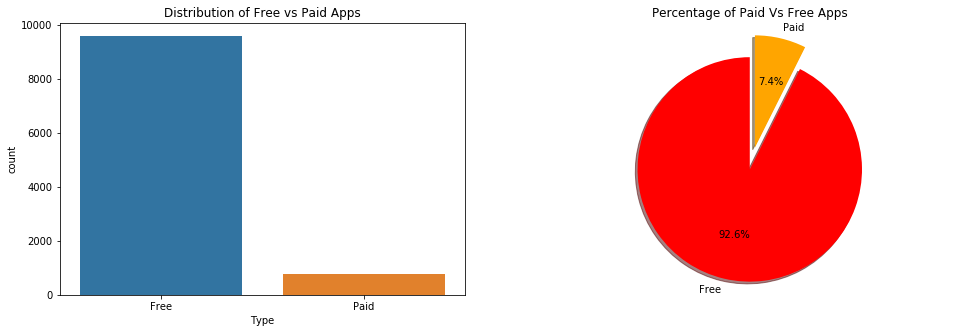

In [1983]:
#percentage of paid and free apps in Play Store?
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.countplot(data=apps,x='Type')
plt.title("Distribution of Free vs Paid Apps");

plt.subplot(122)
labels = apps.Type.unique() 
sizes = [len(apps[apps.Type == "Free"]), len(apps[apps.Type == "Paid"])]
explode = (0, 0.2)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=["red","orange"]) 
plt.axis('equal');  
plt.title("Percentage of Paid Vs Free Apps");

In [1982]:
Content_Type_Year_Updation = pd.crosstab(apps['Content Rating'],[apps['Type'], apps['Year_of_Updation']])
Content_Type_Year_Updation

Type             Free                                           Paid       \
Year_of_Updation 2010 2011 2012 2013 2014 2015 2016  2017  2018 2011 2012   
Content Rating                                                              
Everyone            1   11   19   70  134  327  599  1453  5456    3    5   
Mature 17+          0    0    1    2    3    5   19    42   361    0    0   
Teen                0    1    0    8   12   41   82   158   792    0    0   
Unrated             0    0    1    0    0    1    0     0     0    0    0   

Type                                            
Year_of_Updation 2013 2014 2015 2016 2017 2018  
Content Rating                                  
Everyone           25   49   72   83  161  296  
Mature 17+          0    1    2    4    3    9  
Teen                3    5    6    4   10   24  
Unrated             0    0    0    0    0    0

#### In Free type 

#### Content Type Everyone had started updated their apps from 2014-2015 onwards and have grown exponentially in 2017-2018
#### Content Type Mature and Teen had very less updates but started well in 2018

#### In Paid type

#### Content Type Everyone has updated their apps from 2014-15 onwards.
#### Content Type Mature and Teen has pretty less Paid type but started updating in 2018.

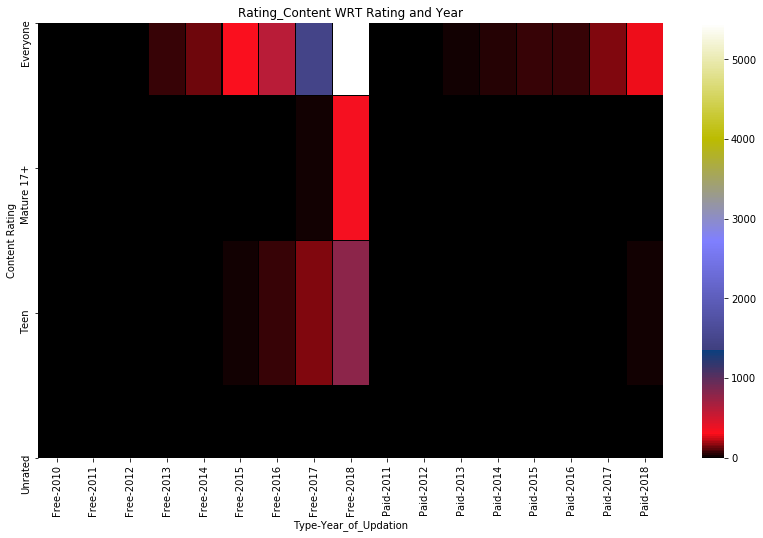

In [1984]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.heatmap(data=Content_Type_Year_Updation,linewidths=0.1,linecolor='black',cmap='gist_stern')
plt.title('Rating_Content WRT Rating and Year');

In [1985]:
Content_Type_Year_Installs = pd.crosstab(apps['Content Rating'],[apps['Type'], apps['Installs']])
Content_Type_Year_Installs

Type               Free                                                        \
Installs       0        1        5        10       50       100      500        
Content Rating                                                                  
Everyone              4       40       65      272      152      544      255   
Mature 17+            0        3        1       10        3       16       13   
Teen                  1        3        4       34       16       58       19   
Unrated               0        0        0        0        0        0        1   

Type                                       ...     Paid                    \
Installs       1000     5000     10000     ... 100      500      1000       
Content Rating                             ...                              
Everyone            673      373      810  ...       82       40      130   
Mature 17+           23        9       34  ...        5        0        2   
Teen                 57       24       70  ...        8        0        6   
Unrated               0        0        0  ...        0        0        0   

Type                                                                           
Installs       5000     10000    50000    100000   500000   1000000  10000000  
Content Rating                                                                 
Everyone             61      109       33       71       10       17        2  
Mature 17+            2        2        2        2        0        1        1  
Teen                  2        7        6       12        2        3        0  
Unrated               0        0        0        0        0        0        0  

[4 rows x 35 columns]

#### Here is the number of Installls wrt to Type Paid or Free and Content Rating. 

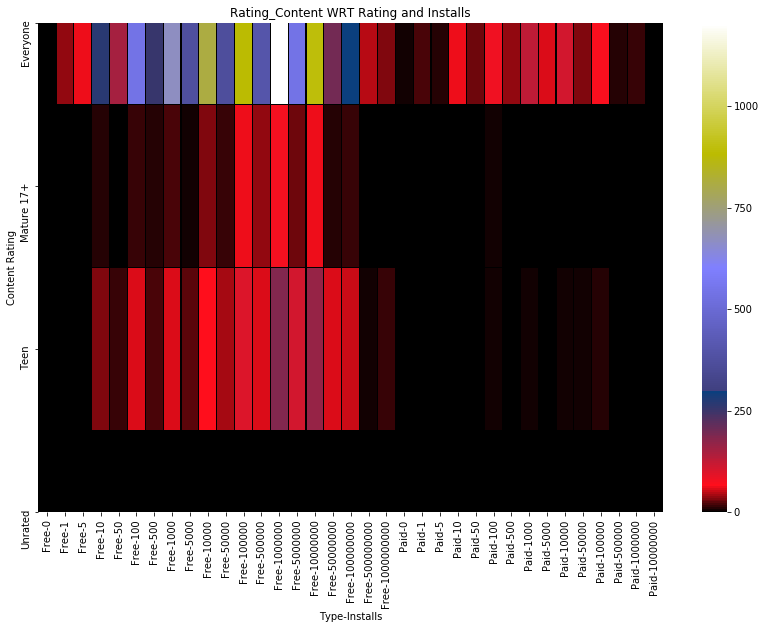

In [1986]:
plt.figure(figsize=(14,9))
plt.tight_layout()
sns.heatmap(data=Content_Type_Year_Installs,linewidths=0.1,linecolor='black',cmap='gist_stern')
plt.title('Rating_Content WRT Rating and Installs');

In [1987]:
# creating 4 bins for dividing minutes

bins = [0.01,75,150,225,300,375,400]
labels =["0-75 $","75-150 $","150-225 $","225-300 $","300-375 $","375-400 $"]
apps['Price_range'] = pd.cut(apps['Price'],bins=bins, labels=labels)

In [1989]:
apps.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

   Reviews Size  Installs  Type  Price Content Rating  \
0      159  19M     10000  Free    0.0       Everyone   
1      967  14M    500000  Free    0.0       Everyone   

                      Genres Last Updated Current Ver  Android Ver  \
0               Art & Design   2018-01-07       1.0.0          4.0   
1  Art & Design;Pretend Play   2018-01-15       2.0.0          4.0   

  Last_Updated_Month Month_of_Updation  Year_of_Updation Price_range  
0       January 2018           January              2018         NaN  
1       January 2018           January              2018         NaN

In [1990]:
# Filling the Empty Categorical values
apps['Price_range'] = apps['Price_range'].cat.add_categories('Free')

In [1991]:
apps['Price_range'].fillna('Free', inplace =True) 

In [1993]:
apps.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

   Reviews Size  Installs  Type  Price Content Rating  \
0      159  19M     10000  Free    0.0       Everyone   
1      967  14M    500000  Free    0.0       Everyone   

                      Genres Last Updated Current Ver  Android Ver  \
0               Art & Design   2018-01-07       1.0.0          4.0   
1  Art & Design;Pretend Play   2018-01-15       2.0.0          4.0   

  Last_Updated_Month Month_of_Updation  Year_of_Updation Price_range  
0       January 2018           January              2018        Free  
1       January 2018           January              2018        Free

In [1994]:
## Price Range Vs Content Type
Content_Type_Year_PriceRange = pd.crosstab(apps['Content Rating'],[apps['Type'], apps['Price_range']])
Content_Type_Year_PriceRange

Type            Free   Paid                                       
Price_range     Free 0-75 $ 75-150 $ 150-225 $ 225-300 $ 375-400 $
Content Rating                                                    
Everyone        8070    673        3         2         1        15
Mature 17+       433     19        0         0         0         0
Teen            1094     51        0         0         0         1
Unrated            2      0        0         0         0         0

#### We can see Most of paid apps cost in optimal range i.e below 75.
#### Very few apps are costly that range more than 375$

<Figure size 864x432 with 0 Axes>

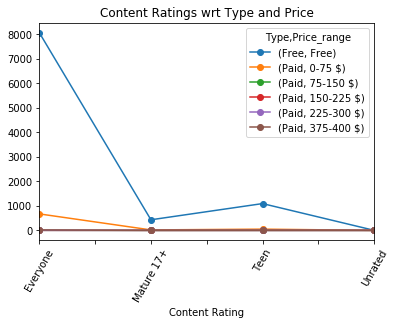

In [1995]:
plt.figure(figsize=(12,6))
Content_Type_Year_PriceRange.plot(kind='line',marker='o')
plt.xticks(rotation=60)
plt.title('Content Ratings wrt Type and Price');

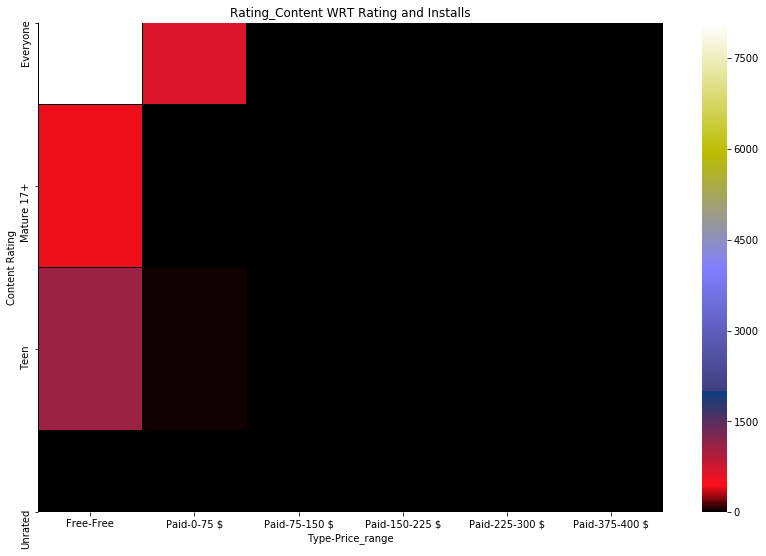

In [1996]:
plt.figure(figsize=(14,9))
plt.tight_layout()
sns.heatmap(data=Content_Type_Year_PriceRange,linewidths=0.1,linecolor='black',cmap='gist_stern')
plt.title('Rating_Content WRT Rating and Installs');

In [1848]:
ab = apps[['Category','Type','Content Rating','Android Ver']].copy()

In [1880]:
# remove/ deselect the unwanted column 'Varies'
ab = ab[ab['Android Ver']!='Varies']
ab.head()

Category  Type Content Rating  Android Ver
0  ART_AND_DESIGN  Free       Everyone          4.0
1  ART_AND_DESIGN  Free       Everyone          4.0
2  ART_AND_DESIGN  Free       Everyone          4.0
3  ART_AND_DESIGN  Free           Teen          4.0
4  ART_AND_DESIGN  Free       Everyone          4.0

In [1852]:
ab['Android Ver'] = ab['Android Ver'].apply(lambda x:x.split('W')[0])
ab = ab[ab['Android Ver']!='Free']
ab['Android Ver']=ab['Android Ver'].apply(lambda x:x[0:3])
ab['Android Ver'] = ab['Android Ver'].astype(float);
ab['Android Ver'] = round(ab['Android Ver'])
ab['Android Ver'].value_counts()

4.0    6705
2.0    1470
5.0     573
3.0     283
6.0      58
7.0      46
8.0       6
1.0       2
Name: Android Ver, dtype: int64

In [1997]:
# creating bins for dividing Android Version

bins = [1.0,3.0,6.0,8.0]
labels =["1.0 - 3.0","3.0 - 6.0","6.0 - 8.0"]
ab['Android Ver'] = pd.cut(ab['Android Ver'],bins=bins, labels=labels);

In [1998]:
ab.tail()

Category  Type Content Rating Android Ver
10834    FAMILY  Free       Everyone   3.0 - 6.0
10835  BUSINESS  Free       Everyone   3.0 - 6.0
10836    FAMILY  Free       Everyone   3.0 - 6.0
10837    FAMILY  Free       Everyone   3.0 - 6.0
10838   MEDICAL  Free       Everyone   1.0 - 3.0

In [1999]:
Content_Type_AndroidVersion = pd.crosstab(ab['Content Rating'],[ab['Type'], ab['Android Ver']])
Content_Type_AndroidVersion

Type                Free                          Paid                    
Android Ver    1.0 - 3.0 3.0 - 6.0 6.0 - 8.0 1.0 - 3.0 3.0 - 6.0 6.0 - 8.0
Content Rating                                                            
Everyone            1233      5869        36       238       381        13
Mature 17+            49       316         0         3        14         1
Teen                 201       732         2        27        24         0
Unrated                2         0         0         0         0         0

#### Most of the Android Version running Type Free belongs to version 3.0 - 6.0. Very Few Lastest Version Users.

#### Similar scenerio wrt to Type Paid.

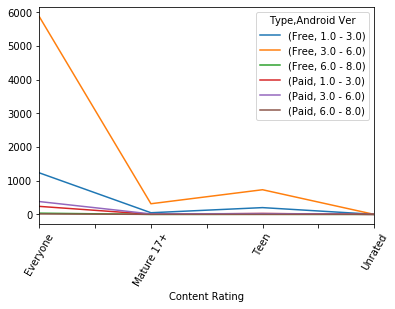

In [2000]:
Content_Type_Year_AndroidVersion.plot()
plt.xticks(rotation=60);

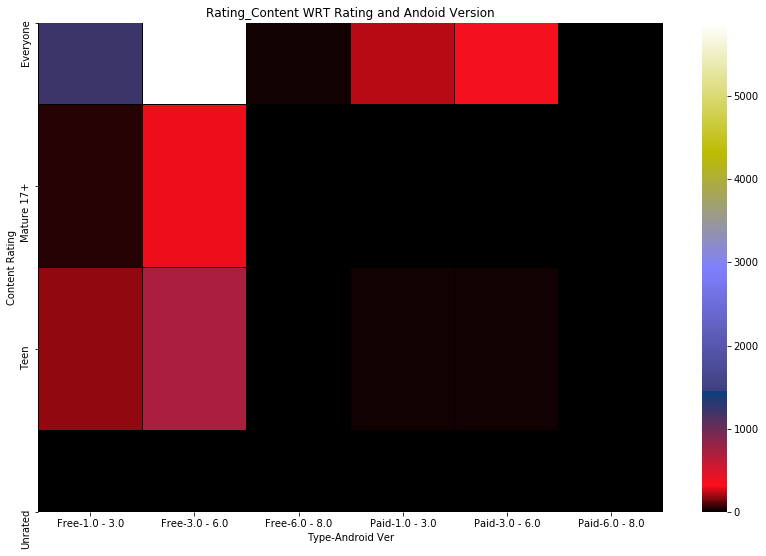

In [2001]:
plt.figure(figsize=(14,9))
plt.tight_layout()
sns.heatmap(data=Content_Type_Year_AndroidVersion,linewidths=0.1,linecolor='black',cmap='gist_stern')
plt.title('Rating_Content WRT Rating and Andoid Version');

In [2002]:
Content_Type_Year_Month = pd.crosstab(apps['Content Rating'],[apps['Type'], apps['Month_of_Updation']])
Content_Type_Year_Month

Type               Free                                                    \
Month_of_Updation April August December February January  July June March   
Content Rating                                                              
Everyone            469   1097      311      430     397  2284  953   515   
Mature 17+           17     89       11       15      15   180   47    14   
Teen                 54    201       39       36      23   357  136    56   
Unrated               0      0        0        1       0     0    1     0   

Type                             ...     Paid                             \
Month_of_Updation  May November  ... December February January July June   
Content Rating                   ...                                       
Everyone           769      300  ...       55       42      37  120   83   
Mature 17+          27        6  ...        0        1       3    5    2   
Teen                88       30  ...        5        2       5    9    4   
Unrated              0        0  ...        0        0       0    0    0   

Type                                                    
Month_of_Updation March May November October September  
Content Rating                                          
Everyone             66  75       32      33        29  
Mature 17+            1   0        2       1         0  
Teen                  3   3        4       3         1  
Unrated               0   0        0       0         0  

[4 rows x 24 columns]

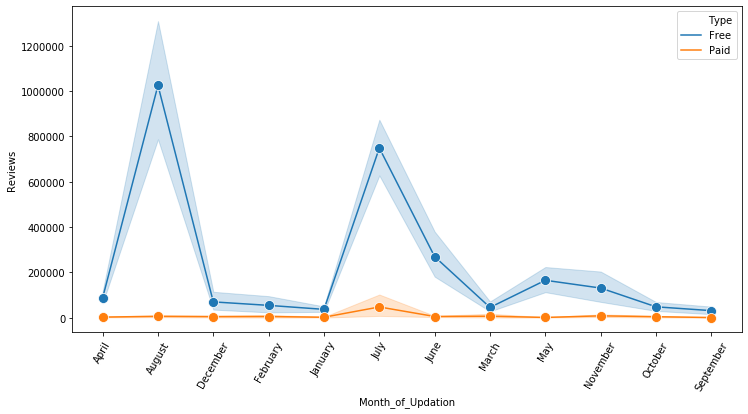

In [2003]:
plt.figure(figsize=(12,6))
sns.lineplot(data=apps,x='Month_of_Updation',y='Reviews',hue='Type',marker='o',markersize=10)
plt.xticks(rotation=60);

#### Most of the Type Free Apps are updated frequency between May- August.                Mostly July and August.

#### Paid apps are updated pretty less but a slight up can be seen month of July.

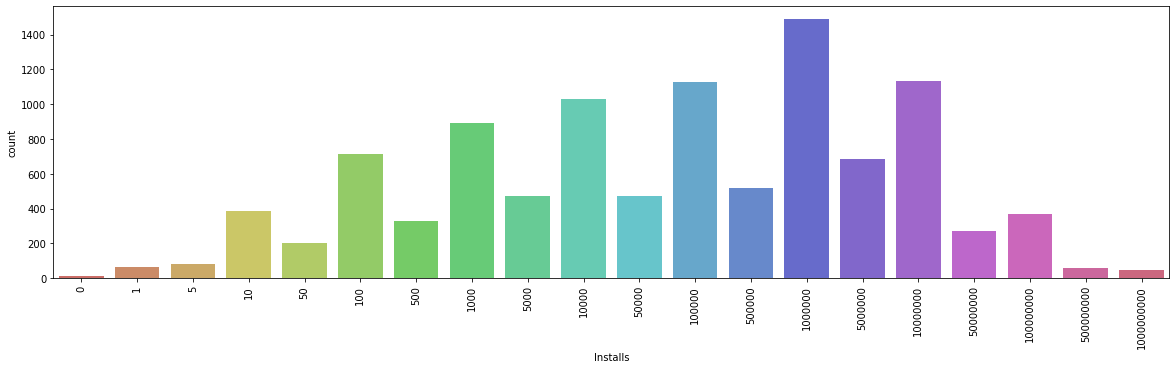

In [2004]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
fig = sns.countplot(x=apps['Installs'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig);

#### We can see most of Installation are for range 100000 - 1000000

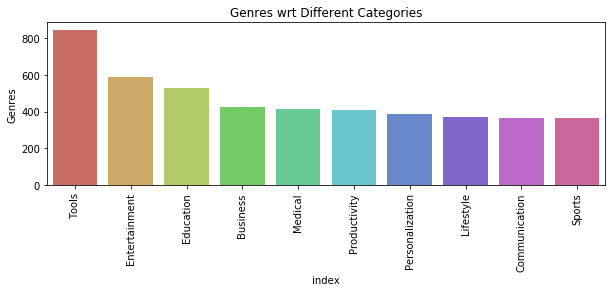

In [2005]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
fig = sns.barplot(y=apps['Genres'].value_counts().reset_index()[:10]['Genres'], x=apps['Genres'].value_counts().reset_index()[:10]['index'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.title("Genres wrt Different Categories");

#### Most of Genres are Tools, Entertainment and Education.

In [2006]:
#sort by ratings 
g = apps.sort_values(by='Reviews',ascending=False);

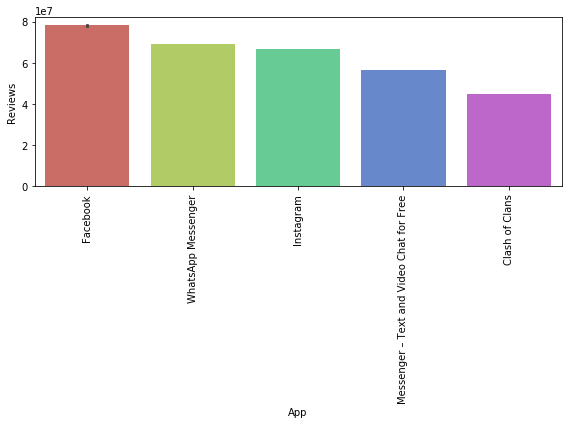

In [2008]:
plt.figure(figsize=(8,6))
fig = sns.barplot(x=g['App'][:10], y=g['Reviews'][:10], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show(fig);

In [2010]:
apps['Size'].value_counts()

Varies with device    1526
11M                    187
13M                    186
12M                    186
14M                    182
                      ... 
209k                     1
526k                     1
982k                     1
485k                     1
713k                     1
Name: Size, Length: 461, dtype: int64

In [2011]:
temp=apps['Price'].apply(lambda x: True if x>350 else False)
apps[temp].head(3)

App   Category  Rating  Reviews  Size  Installs  \
4197    most expensive app (H)     FAMILY     4.3        6  1.5M       100   
4362                💎 I'm rich  LIFESTYLE     3.8      718   26M     10000   
4367  I'm Rich - Trump Edition  LIFESTYLE     3.6      275  7.3M     10000   

      Type   Price Content Rating         Genres Last Updated Current Ver  \
4197  Paid  399.99       Everyone  Entertainment   2018-07-16           1   
4362  Paid  399.99       Everyone      Lifestyle   2018-03-11       1.0.0   
4367  Paid  400.00       Everyone      Lifestyle   2018-05-03       1.0.1   

      Android Ver Last_Updated_Month Month_of_Updation  Year_of_Updation  \
4197          7.0          July 2018              July              2018   
4362          4.0         March 2018             March              2018   
4367          4.0           May 2018               May              2018   

     Price_range  
4197   375-400 $  
4362   375-400 $  
4367   375-400 $

In [2012]:
# Dividing the Genres into 2 Categories 
apps['Pri_Genres'] = apps['Genres'].apply(lambda x: x.split(';')[0])
apps['Pri_Genres'].head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Pri_Genres, dtype: object

In [2013]:
apps['Sec_Genres'] = apps['Genres'].apply(lambda x: x.split(';')[-1])
apps['Sec_Genres'].head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: Sec_Genres, dtype: object

In [2015]:
grouped = apps.groupby(['Pri_Genres','Sec_Genres'])
grouped = grouped.size().reset_index()
grouped.head()

Pri_Genres          Sec_Genres    0
0     Action              Action  356
1     Action  Action & Adventure   15
2  Adventure  Action & Adventure   13
3  Adventure           Adventure   75
4  Adventure         Brain Games    1

In [2016]:
twowaytable = pd.crosstab(apps["Pri_Genres"],apps["Sec_Genres"])
twowaytable.head()

Sec_Genres       Action  Action & Adventure  Adventure  Arcade  Art & Design  \
Pri_Genres                                                                     
Action              356                  15          0       0             0   
Adventure             0                  13         75       0             0   
Arcade                0                  15          0     218             0   
Art & Design          0                   2          0       0            58   
Auto & Vehicles       0                   0          0       0             0   

Sec_Genres       Auto & Vehicles  Beauty  Board  Books & Reference  \
Pri_Genres                                                           
Action                         0       0      0                  0   
Adventure                      0       0      0                  0   
Arcade                         0       0      0                  0   
Art & Design                   0       0      0                  0   
Auto & Vehicles               85       0      0                  0   

Sec_Genres       Brain Games  ...  Simulation  Social  Sports  Strategy  \
Pri_Genres                    ...                                         
Action                     0  ...           0       0       0         0   
Adventure                  1  ...           0       0       0         0   
Arcade                     0  ...           0       0       0         0   
Art & Design               0  ...           0       0       0         0   
Auto & Vehicles            0  ...           0       0       0         0   

Sec_Genres       Tools  Travel & Local  Trivia  Video Players & Editors  \
Pri_Genres                                                                
Action               0               0       0                        0   
Adventure            0               0       0                        0   
Arcade               0               0       0                        0   
Art & Design         0               0       0                        0   
Auto & Vehicles      0               0       0                        0   

Sec_Genres       Weather  Word  
Pri_Genres                      
Action                 0     0  
Adventure              0     0  
Arcade                 0     0  
Art & Design           0     0  
Auto & Vehicles        0     0  

[5 rows x 52 columns]

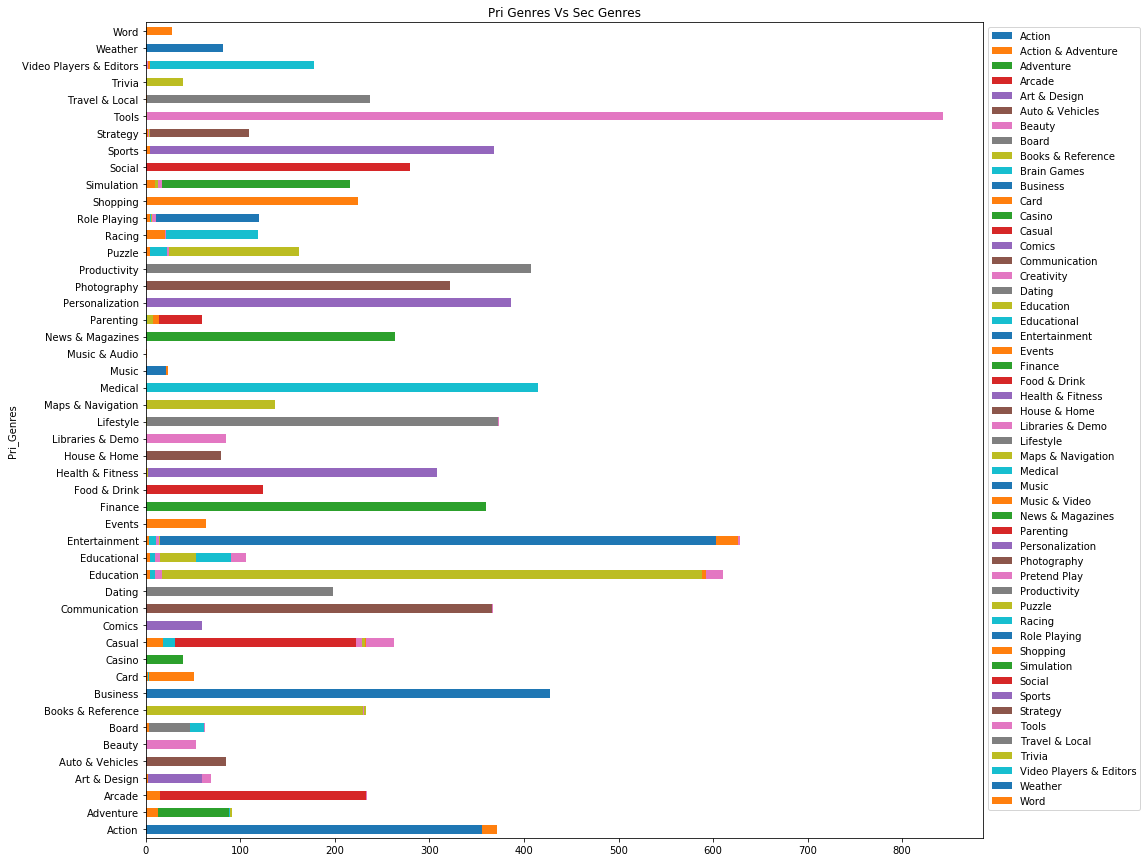

In [2017]:
twowaytable.plot(kind="barh", figsize=(15,15),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title("Pri Genres Vs Sec Genres");

In [2018]:
apps['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

In [ ]:
#Taking a difference between last updated date and today
#apps['Days_since_last_updated'] = apps['Last Updated'].apply(lambda x:datetime.date.today()- datetime.date(x))
#apps['Days_since_last_updated'].head()

In [ ]:
#pd.crosstab(apps['Category'],apps['Days_since_last_updated'])

#plt.figure(figsize=(12,12))
#sns.barplot(data=apps,y='Category',x='Days_since_last_updated')

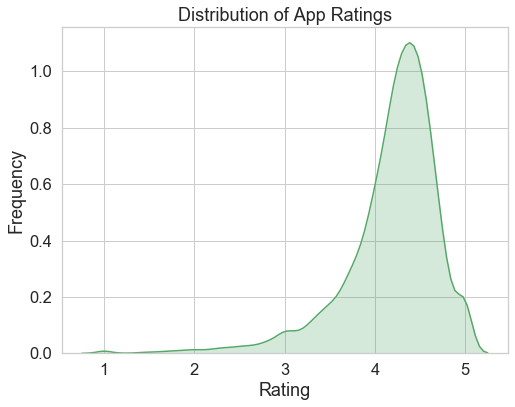

In [2019]:
sns.set(font_scale=1.5, style = "whitegrid") #set the font size and background
plt.figure(figsize=(8,6)) #set the plotsize
sns.distplot(apps.Rating, hist=False, color="g", kde_kws={"shade": True})
plt.ylabel("Frequency")
plt.title("Distribution of App Ratings");

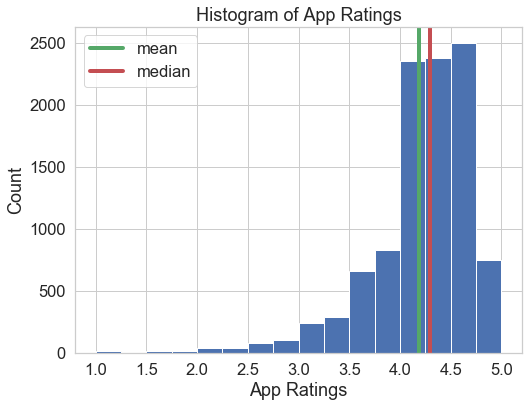

In [2020]:
plt.figure(figsize=(8,6))
plt.hist(apps.Rating, range=(1,5), bins=16)
plt.axvline(x=apps.Rating.mean(), linewidth=4, color='g', label="mean")
plt.axvline(x=apps.Rating.median(), linewidth=4, color='r', label="median")
plt.xlabel("App Ratings")
plt.ylabel("Count")
plt.title("Histogram of App Ratings")
plt.legend(["mean", "median"])
plt.show();

In [2021]:
#average rating per category
avg_category_rating = apps.groupby("Category")['Rating'].mean().sort_values(ascending=False).reset_index()
avg_category_rating.head(10)

Category    Rating
0               EVENTS  4.411477
1            EDUCATION  4.377692
2       ART_AND_DESIGN  4.358462
3      PERSONALIZATION  4.305885
4            PARENTING  4.304167
5  BOOKS_AND_REFERENCE  4.293754
6                 GAME  4.278248
7               SOCIAL  4.268039
8             SHOPPING  4.252261
9   HEALTH_AND_FITNESS  4.244336

#### Events, Art-Design, Education and Parenting have got highest Average Ratings.

#### We did not find Family , Tools and Games in Top 10 though having many Apps in them because as the number of Apps increases in Category there Ratings might decrease a bit. But they have average ratings of Above 4.1.

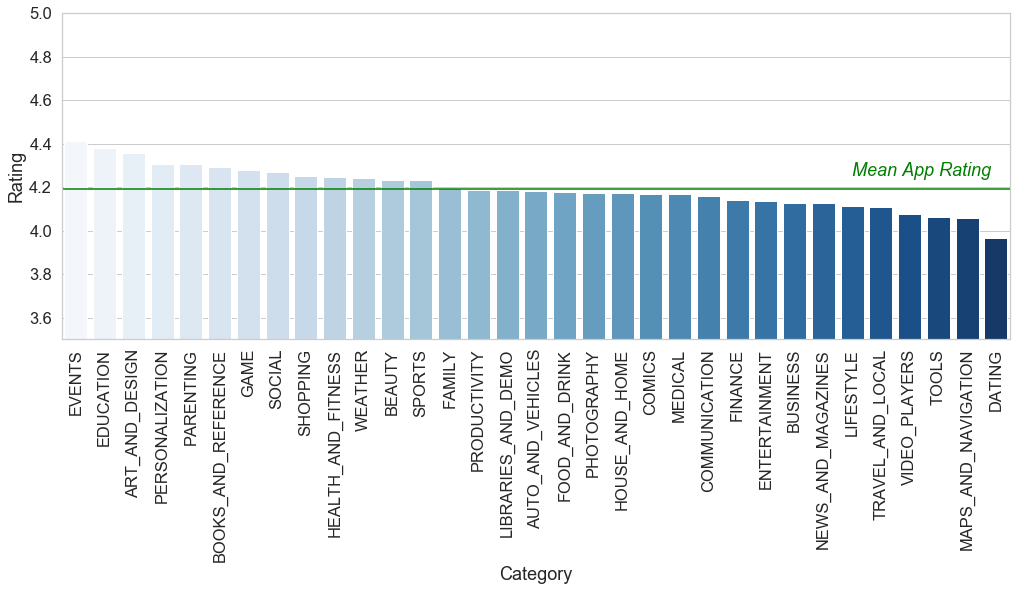

In [2022]:
plt.figure(figsize=(17,6))
x = sns.barplot(x="Category", y="Rating", data=avg_category_rating, palette="Blues") 
plt.xticks(rotation=90)
x.set(ylim=(3.5,5))
plt.axhline(apps3['Rating'].mean(),color='green');
plt.text(x = 27, y = 4.25, s = 'Mean App Rating', color='green',fontsize = 18,style = 'italic');

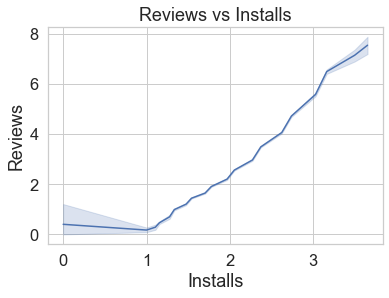

In [2023]:
sns.lineplot(data=install_reviews,x='Installs',y='Reviews');
plt.title("Reviews vs Installs");

In [2024]:
#Does every popular app (Installs 100M+) receives a review from each download ?
apps['Review_to_Install_Ratio'] = apps['Reviews'] / apps['Installs']
apps['Review_to_Install_Ratio'].head()

0    0.015900
1    0.001934
2    0.017502
3    0.004313
4    0.009670
Name: Review_to_Install_Ratio, dtype: float64

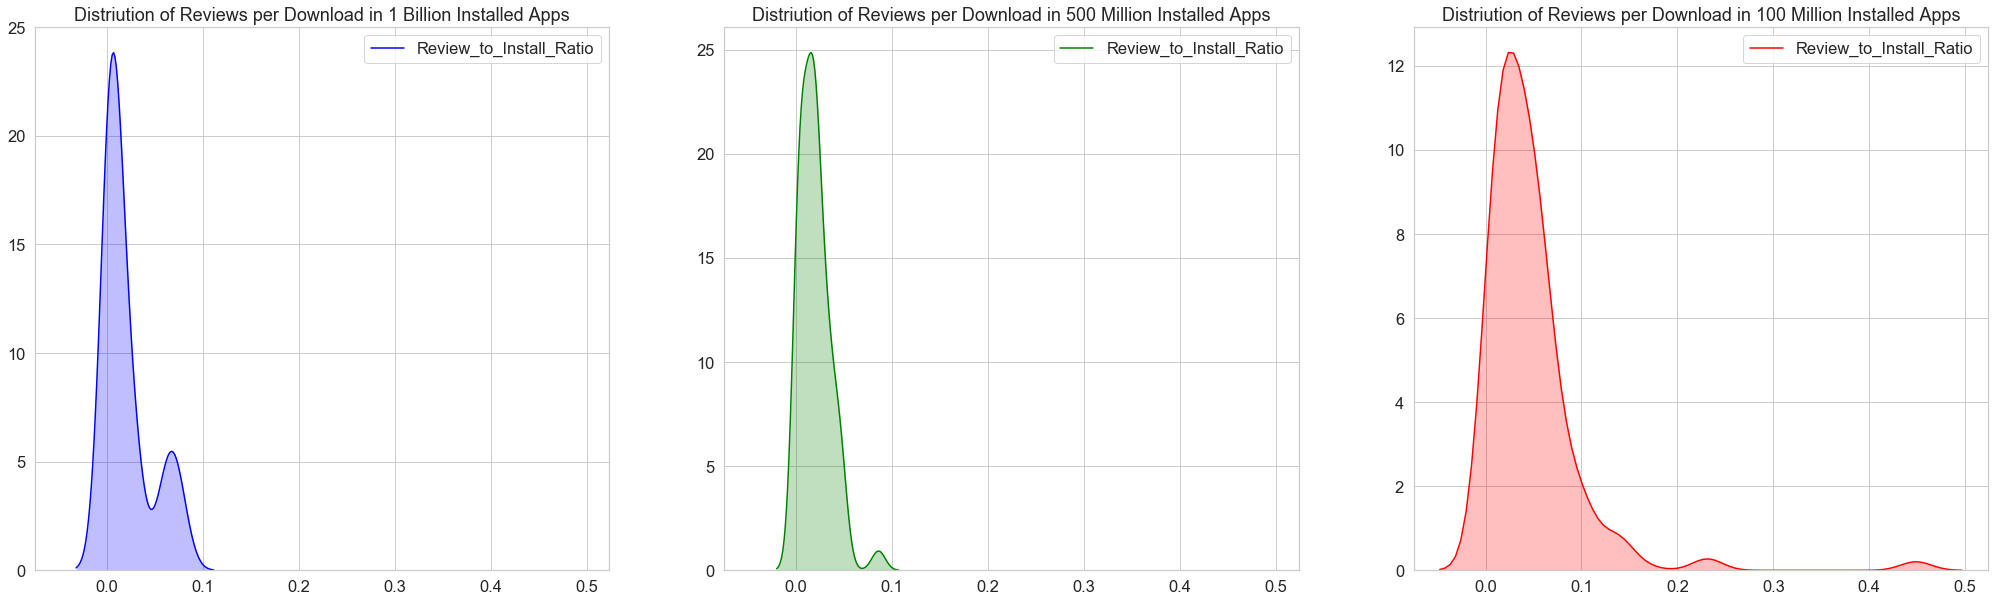

In [2025]:
f, axes = plt.subplots(1, 3, figsize=(35, 10), sharex=True) #set the plotsize, divide p


g1 = sns.kdeplot(apps.Review_to_Install_Ratio[apps.Installs == 1000000000], shade=True, ax=axes[0], color="blue")
g1.title.set_text("Distriution of Reviews per Download in 1 Billion Installed Apps")

g2 = sns.kdeplot(apps.Review_to_Install_Ratio[apps.Installs == 500000000], shade=True, ax=axes[1], color="green")
g2.title.set_text("Distriution of Reviews per Download in 500 Million Installed Apps")

g3 = sns.kdeplot(apps.Review_to_Install_Ratio[apps.Installs == 100000000], shade=True, ax=axes[2],color="red")
g3.title.set_text("Distriution of Reviews per Download in 100 Million Installed Apps")

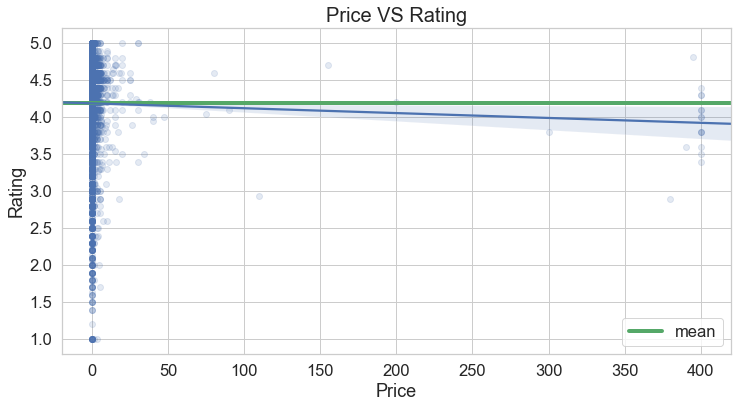

In [2027]:
#Do we have a correlation between price of the app and rating?
plt.figure(figsize=(12,6))
plt.axhline(y=apps.Rating.mean(), linewidth=4, color='g', label="mean")
sns.regplot(x="Price", y="Rating", data=apps,scatter_kws={'alpha':0.15})
plt.title("Price VS Rating", size=20)
plt.legend();

#### We can see that as the Price Increases , The reviews had started falling down may be due to users are not that much satisfied with the paid apps wrt what they had expectations.

In [2028]:
#Chagning MB and GB to overall KB's
def num_size(Size):
    if Size[-1] == 'k':
        return float(Size[:-1])*1024
    else:
        return float(Size[:-1])*1024*1024

In [2032]:
apps['Size'].value_counts().head()

Varies with device    1526
11M                    187
13M                    186
12M                    186
14M                    182
Name: Size, dtype: int64

In [2033]:
apps['Size'] = apps['Size'].replace('Varies with device',0.0)

In [2035]:
apps3 = apps[apps['Size']!=0.0].copy()
apps3['Size'].value_counts()

11M     187
13M     186
12M     186
14M     182
15M     174
       ... 
951k      1
232k      1
478k      1
695k      1
939k      1
Name: Size, Length: 460, dtype: int64

In [2036]:
apps3['Size']=apps3['Size'].map(num_size).astype(float)

In [2037]:
apps3['Size'].head()

0    19922944.0
1    14680064.0
2     9122611.2
3    26214400.0
4     2936012.8
Name: Size, dtype: float64

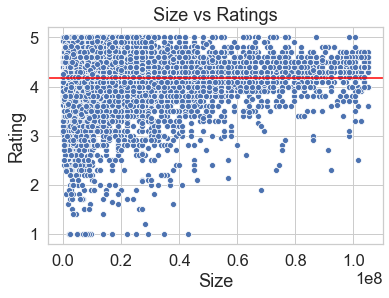

In [2194]:
#Size vs reviews
sns.scatterplot(data=apps3,x='Size',y='Rating')
plt.axhline(apps3['Rating'].mean(),color='red')
plt.title("Size vs Ratings");

#### Most top rated apps are optimally sized between 2MB to 40MB - neither too light nor too heavy.

#### Majority of the paid apps that are highly rated have small sizes. This means that most paid apps are designed and developed to cater to specific functionalities and hence are not bulky.

#### Users prefer to pay for apps that are light-weighted. A paid app that is bulky may not perform well in the market.


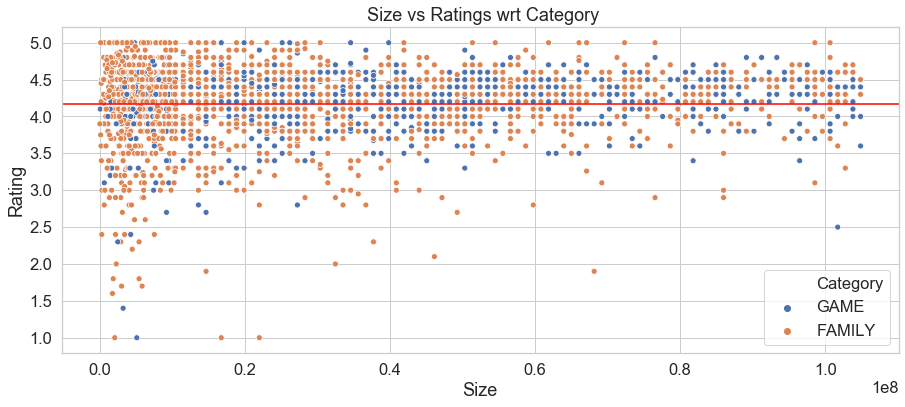

In [2195]:
ab = apps3[(apps3['Category']== 'GAME') | (apps3['Category']== 'FAMILY')]
plt.figure(figsize=(15,6))
sns.scatterplot(data=ab,x='Size',y='Rating',hue='Category')
plt.axhline(apps3['Rating'].mean(),color='red')
plt.title(" Size vs Ratings wrt Category");

#### We can see Most of Top ratings belong to Family Category even if they have are heavy size App

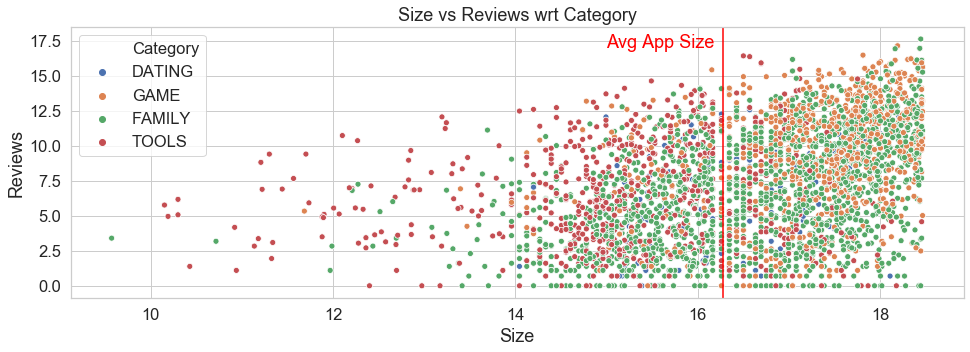

In [2204]:
f = np.log(apps3['Size'])
g = np.log(apps3['Reviews'])

ac = apps3[(apps3['Category']== 'GAME') | (apps3['Category']== 'FAMILY') | (apps3['Category']== 'DATING') | (apps3['Category']== 'TOOLS')]

plt.figure(figsize=(16,5))
sns.scatterplot(f,g,hue=ac['Category']);
plt.axvline(np.log(apps3['Size']).mean(),color='red')
plt.text(x=15,y=17,s='Avg App Size',color='red')
plt.title("Size vs Reviews wrt Category");

#### Most bulky apps belong to the Game and Family category. Despite this, these bulky apps are fairly highly Reviewed indicating that they are bulky for a purpose.

#### Most of Tools Based apps are between Less to moderate in Size. 

#### Dating Apps are Rated Low compared to Others.

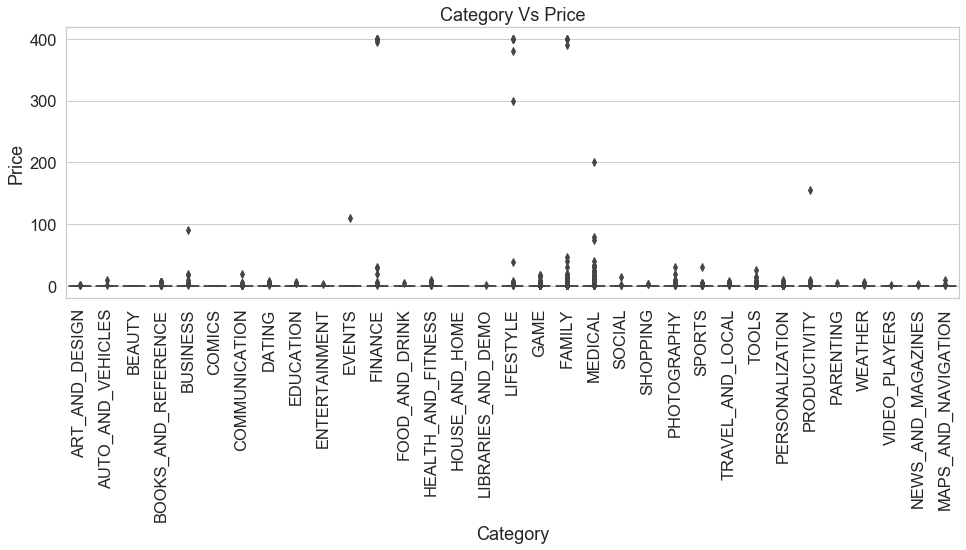

In [2047]:
#How do app prices impact app rating?
plt.figure(figsize=(16,5))
sns.boxplot(data=apps3,y='Price',x='Category')
plt.xticks(rotation=90);
plt.title("Category Vs Price");

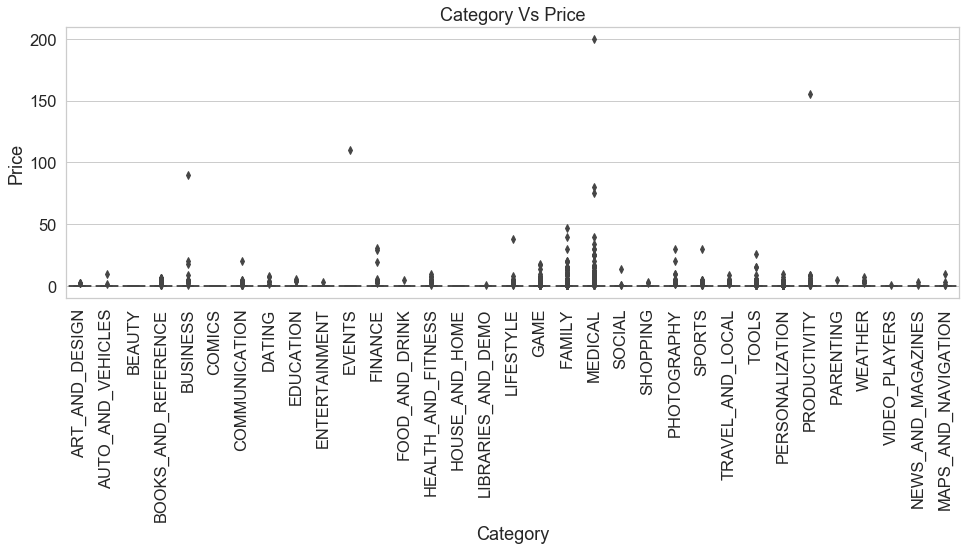

In [2050]:
# There are apps in Categories Like finance,Lifestyle,family which are costly

# Removing these and seeing the plot again

plt.figure(figsize=(16,5))
sns.boxplot(data=apps3[apps3['Price']<250],y='Price',x='Category')
plt.xticks(rotation=90);
plt.title("Category Vs Price");

#### Mediacal and Family are costly apps
#### All other apps are priced under 30.
#### Surprisingly, all game apps are reasonably priced below 20.
#### Medical apps are costly see it wrt Category type

In [2053]:
# medical apps are costly see it wrt Category type

medi = apps3[(apps3['Category']=='MEDICAL') & (apps3['Price']>0)]
medi.head(2)

App Category  Rating  Reviews        Size  \
2243  Monash Uni Low FODMAP Diet  MEDICAL     4.2     1135  12582912.0   
2244          iBP Blood Pressure  MEDICAL     4.4      578    720896.0   

      Installs  Type  Price Content Rating   Genres Last Updated Current Ver  \
2243    100000  Paid   9.00       Everyone  Medical   2018-07-16       2.0.7   
2244     10000  Paid   0.99       Everyone  Medical   2014-11-30       7.0.1   

      Android Ver Last_Updated_Month Month_of_Updation  Year_of_Updation  \
2243          4.0          July 2018              July              2018   
2244          2.0      November 2014          November              2014   

     Price_range Pri_Genres Sec_Genres  Review_to_Install_Ratio  
2243      0-75 $    Medical    Medical                  0.01135  
2244      0-75 $    Medical    Medical                  0.05780

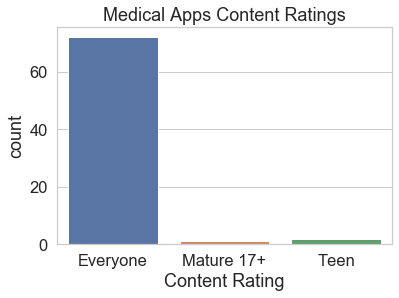

In [2054]:
sns.countplot(data=medi,x='Content Rating');
plt.title("Medical Apps Content Ratings");

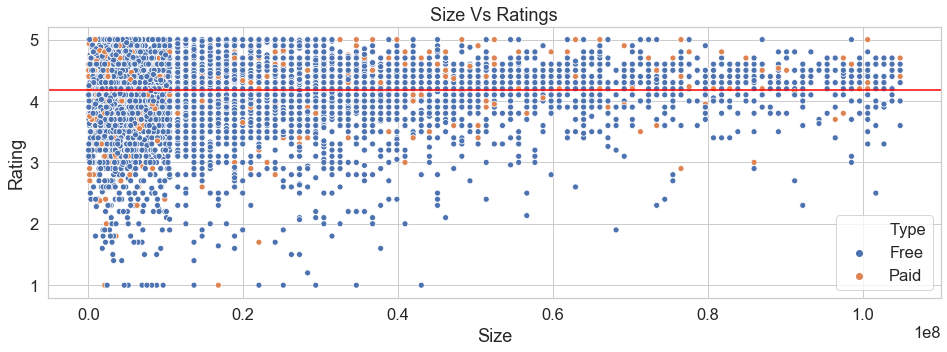

In [2078]:
#How do the sizes of paid apps and free apps vary?

plt.figure(figsize=(16,5))
sns.scatterplot(data=apps3,y='Rating',x='Size',hue='Type')
plt.axhline(apps3['Rating'].mean(),color='red');
plt.title("Size Vs Ratings");

#### Majority of the paid apps that are highly rated have small sizes. This means that most paid apps are designed and developed to cater to specific functionalities and hence are not bulky.

#### Users prefer to pay for apps that are light-weighted. 

#### A paid app that is bulky may not perform well in the market.

#### Most of Apps That are bulky that got better ratings wrt small size apps doesn't matter they are Free or Paid.

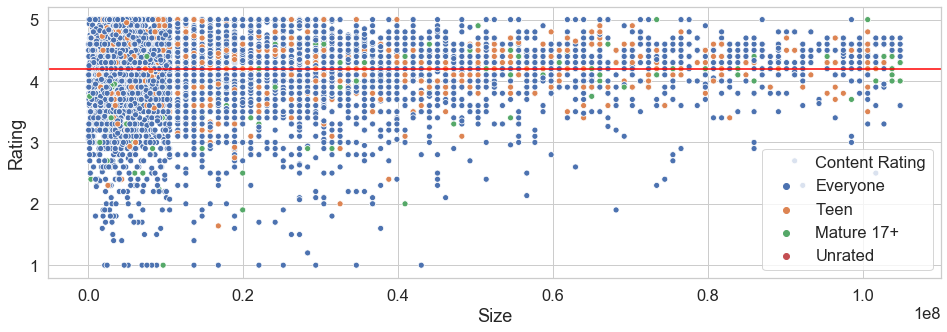

In [2077]:
#How do the sizes of apps and Content Ratings differ
plt.figure(figsize=(16,5))
sns.scatterplot(data=apps3,y='Rating',x='Size',hue='Content Rating')
plt.axhline(apps3['Rating'].mean(),color='red');

#### Most of apps are are made for Everyone.
#### Most of Mature Apps are rated pretty bad and have less size
#### Teen apps Ratings are pretty good and most of apps got 4 and above , and most of apps are less in size

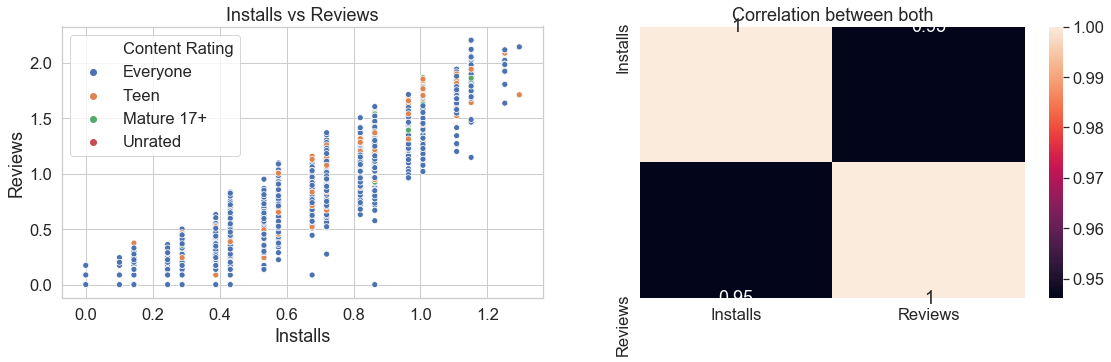

In [2107]:
# Relation of Installs/ Reviews
plt.figure(figsize=(19,5))
plt.subplot(121)
x = np.log(apps2['Installs'])
y = np.log(apps2['Reviews'])
sns.scatterplot(x,y,hue= apps3['Content Rating']);
plt.title("Installs vs Reviews");
plt.legend(loc='best');

plt.subplot(122)
sns.heatmap(apps2[['Installs','Reviews']].corr(),annot=True)
plt.title("Correlation between both");

In [2101]:
sns.heatmap(apps2['Installs'],apps2['Reviews'],annot=True)
plt.title("Correlation between both");

Installs   Reviews
Installs  1.000000  0.946082
Reviews   0.946082  1.000000

#### The correlation is pretty high between Installs and Reviews that means As Installs increases Reviews also increase and vice versa.

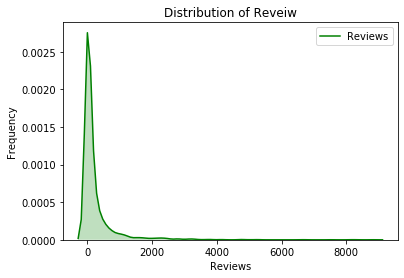

In [841]:
# rating distibution 
g = sns.kdeplot(np.sqrt(apps['Reviews']), color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw');

In [2108]:
#Categorising Price

apps3.loc[(apps3['Price'] > 0) & (apps3['Price'] <= 0.99), 'PriceBand'] = '1 cheap'
apps3.loc[(apps3['Price'] > 0.99) & (apps3['Price'] <= 2.99), 'PriceBand']   = '2 not cheap'
apps3.loc[(apps3['Price'] > 2.99) & (apps3['Price'] <= 4.99), 'PriceBand']   = '3 normal'
apps3.loc[(apps3['Price'] > 4.99) & (apps3['Price'] <= 14.99), 'PriceBand']   = '4 expensive'
apps3.loc[(apps3['Price'] > 14.99) & (apps3['Price'] <= 29.99), 'PriceBand']   = '5 too expensive'
apps3.loc[(apps3['Price'] > 29.99), 'PriceBand']  = 'Highly Expensive'
apps3[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

PriceBand    Rating
0           1 cheap  4.249577
1       2 not cheap  4.217990
2          3 normal  4.247774
3       4 expensive  4.216649
4   5 too expensive  4.275000
5  Highly Expensive  3.953563

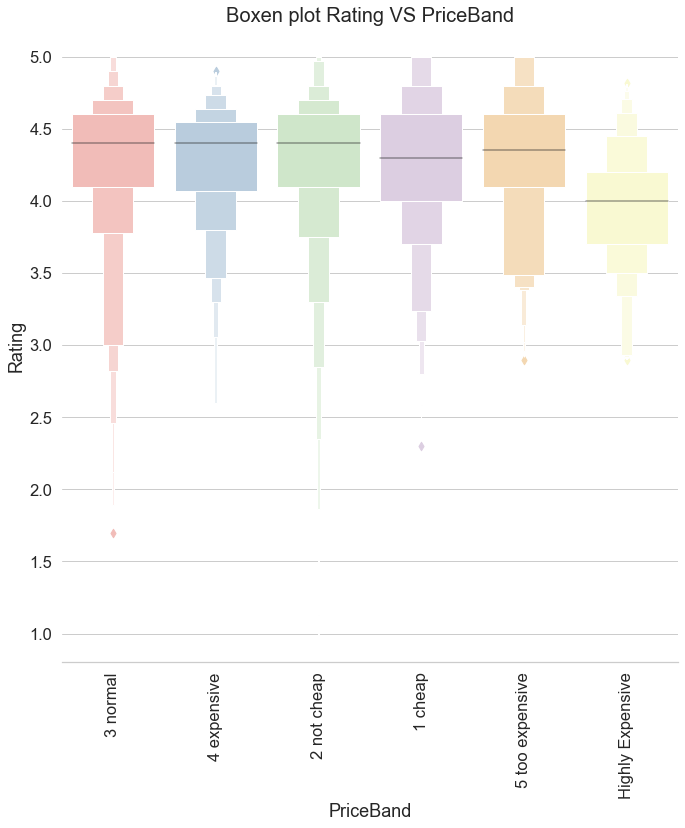

In [2109]:
g = sns.catplot(x="PriceBand",y="Rating",data=apps3, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20);

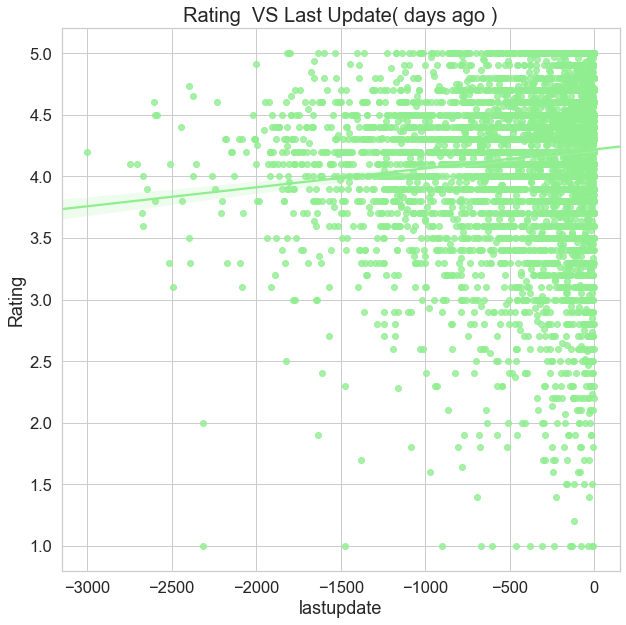

In [2111]:
#Days from last updations

apps3['new'] = pd.to_datetime(apps3['Last Updated'])

apps3['lastupdate'] = (apps3['Last Updated'] -  apps3['Last Updated'].max()).dt.days
apps3['lastupdate'].head()

plt.figure(figsize = (10,10))
sns.regplot(x="lastupdate", y="Rating", color = 'lightgreen',data=apps3);
plt.title('Rating  VS Last Update( days ago )',size = 20);

#### We can see that as the time period for not updating the apps rises their ratings gets down as well.

In [2113]:
##Feature Construction

#Total amount spent by category (installs * price)

apps3['Total_money_generated'] = apps3['Installs'] * apps3['Price']

In [2114]:
# Top 10 Category to genrate highest Revenue
top_10_category_revenue = apps3.groupby('Category')['Total_money_generated'].sum().astype(int).sort_values(ascending=False).head(10)
top_10_category_revenue

Category
LIFESTYLE          57554049
FAMILY             44122005
GAME               40389634
FINANCE            25726678
MEDICAL             8102869
PHOTOGRAPHY         8053267
PERSONALIZATION     7127532
SPORTS              3607711
PRODUCTIVITY        3192434
EDUCATION           2403980
Name: Total_money_generated, dtype: int32

#### We can see that Lifestype is highest Revenue Generator, next are Family, game and Finance.

#### This is because we have seen earlier that these 3-4 categories were having many costly Apps.

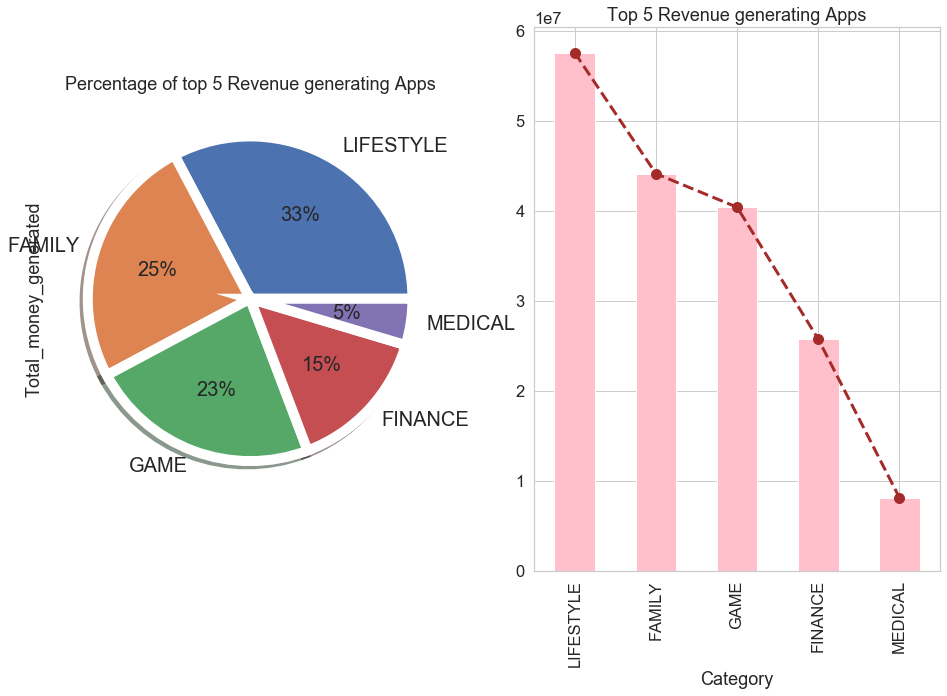

In [2118]:
plt.figure(figsize=(16,10))
plt.subplot(121)
top_10_category_revenue.head().plot.pie(autopct='%1.f%%',
                                                             wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                             shadow=True,
                                                             fontsize=20)
plt.title("Percentage of top 5 Revenue generating Apps")

plt.subplot(122)
top_10_category_revenue.head().plot(color='brown',marker='o',markersize='10',linestyle='dashed',linewidth=3)
top_10_category_revenue.head().plot(kind='bar',color='pink');
plt.title("Top 5 Revenue generating Apps");

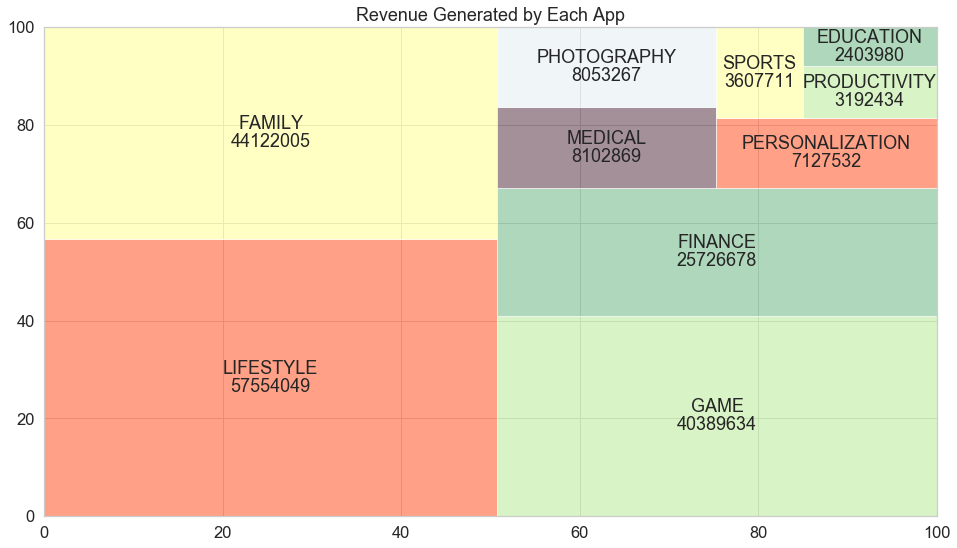

In [2119]:
# Creating Tree Map

plt.figure(figsize=(16,9))
squarify.plot(sizes=top_10_category_revenue.values,label=top_10_category_revenue.index,value=top_10_category_revenue.values,color=["#FF6138","#FFFF9D","#BEEB9F", "#79BD8F","#684656","#E7EFF3"], alpha=0.6)
plt.title('Revenue Generated by Each App');

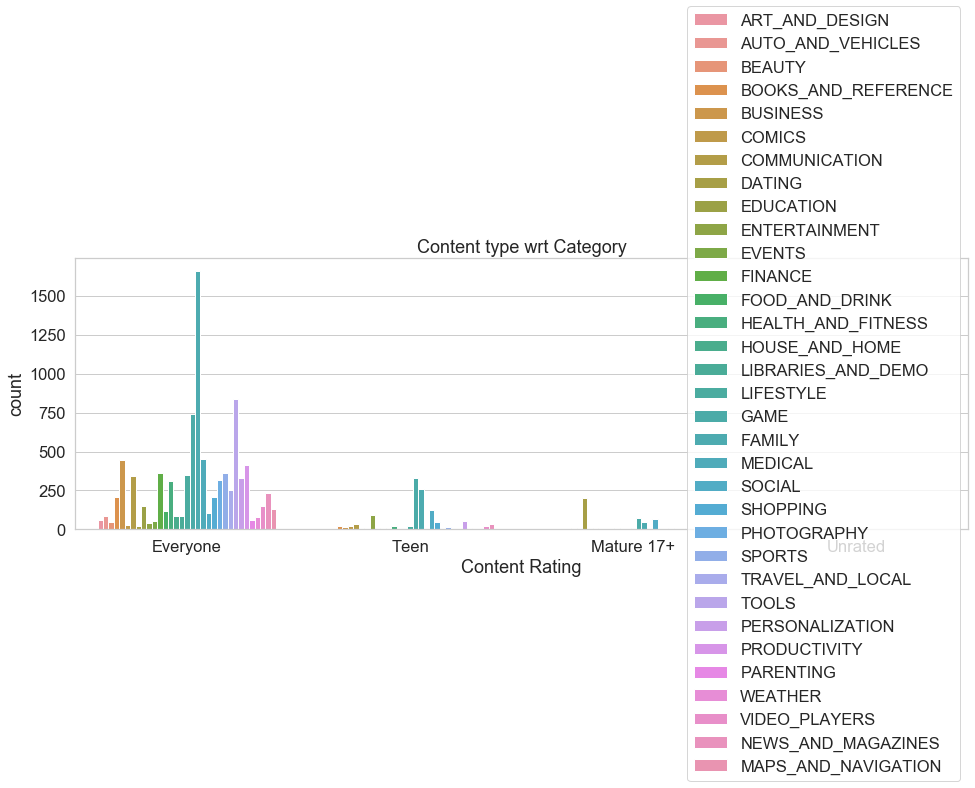

In [2120]:
# Content rating comparision wrt Category of Top 10 category having highest revenue generated
plt.figure(figsize=(16,5))
sns.countplot(data=apps,x='Content Rating',hue='Category')
#g.legend().remove()
plt.legend(loc='right');
plt.title("Content type wrt Category");

#### We can see Family, Tools, Game, Busimess have got the highest Content Ratings in Everyone.

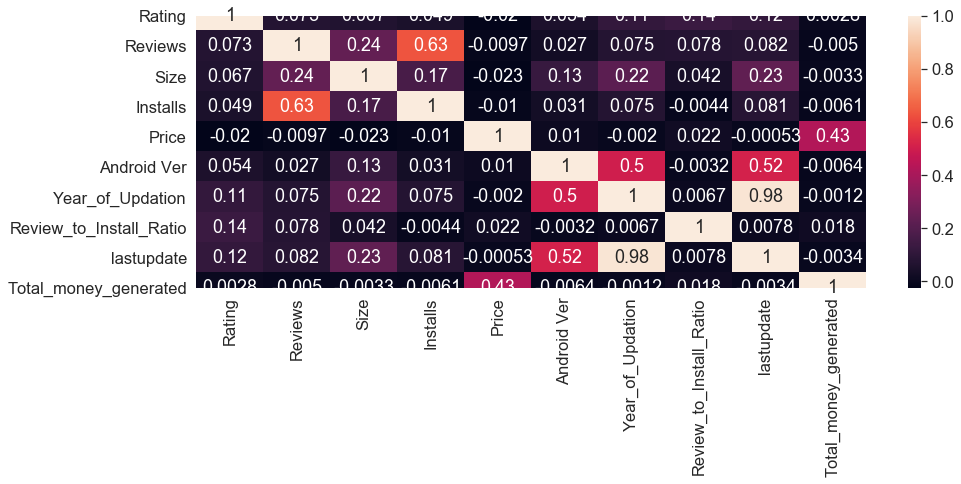

In [2128]:
plt.figure(figsize=(15,5))
sns.heatmap(apps3.corr(),annot=True);

In [2129]:
apps3.nlargest(5,'Reviews')

App Category  Rating   Reviews         Size    Installs  \
1879  Clash of Clans     GAME     4.6  44893888  102760448.0   100000000   
1670  Clash of Clans     GAME     4.6  44891723  102760448.0   100000000   
3986  Clash of Clans   FAMILY     4.6  44881447  102760448.0   100000000   
1872  Subway Surfers     GAME     4.5  27725352   79691776.0  1000000000   
1750  Subway Surfers     GAME     4.5  27724094   79691776.0  1000000000   

      Type  Price Content Rating    Genres  ... Month_of_Updation  \
1879  Free    0.0       Everyone  Strategy  ...              July   
1670  Free    0.0       Everyone  Strategy  ...              July   
3986  Free    0.0       Everyone  Strategy  ...              July   
1872  Free    0.0       Everyone    Arcade  ...              July   
1750  Free    0.0       Everyone    Arcade  ...              July   

     Year_of_Updation  Price_range Pri_Genres Sec_Genres  \
1879             2018         Free   Strategy   Strategy   
1670             2018         Free   Strategy   Strategy   
3986             2018         Free   Strategy   Strategy   
1872             2018         Free     Arcade     Arcade   
1750             2018         Free     Arcade     Arcade   

      Review_to_Install_Ratio PriceBand        new lastupdate  \
1879                 0.448939       NaN 2018-07-15        -24   
1670                 0.448917       NaN 2018-07-15        -24   
3986                 0.448814       NaN 2018-07-15        -24   
1872                 0.027725       NaN 2018-07-12        -27   
1750                 0.027724       NaN 2018-07-12        -27   

      Total_money_generated  
1879                    0.0  
1670                    0.0  
3986                    0.0  
1872                    0.0  
1750                    0.0  

[5 rows x 24 columns]

#### Clash of Clans is the most Reviewed app followed by Subway Surfers. of Game Categories. Thus they also got top Ratings.

In [2130]:
apps3.nsmallest(5,'Reviews')

App Category    Rating  \
478                                Truth or Dare Pro   DATING  2.825000   
479  Private Dating, Hide App- Blue for PrivacyHider   DATING  3.050000   
621                               Dating White Girls   DATING  4.133333   
623                                     Geeks Dating   DATING  3.466667   
627                               CAM5678 Video Chat   DATING  2.000000   

     Reviews        Size  Installs  Type  Price Content Rating  Genres  ...  \
478        0  20971520.0        50  Paid   1.49           Teen  Dating  ...   
479        0     18432.0       100  Paid   2.99       Everyone  Dating  ...   
621        0   3774873.6        50  Free   0.00     Mature 17+  Dating  ...   
623        0  13631488.0        50  Free   0.00     Mature 17+  Dating  ...   
627        0  40894464.0       500  Free   0.00     Mature 17+  Dating  ...   

    Month_of_Updation Year_of_Updation  Price_range Pri_Genres Sec_Genres  \
478         September             2017       0-75 $     Dating     Dating   
479              July             2017       0-75 $     Dating     Dating   
621              July             2018         Free     Dating     Dating   
623              July             2018         Free     Dating     Dating   
627              July             2018         Free     Dating     Dating   

     Review_to_Install_Ratio    PriceBand        new lastupdate  \
478                      0.0  2 not cheap 2017-09-01       -341   
479                      0.0  2 not cheap 2017-07-25       -379   
621                      0.0          NaN 2018-07-20        -19   
623                      0.0          NaN 2018-07-10        -29   
627                      0.0          NaN 2018-07-13        -26   

     Total_money_generated  
478                   74.5  
479                  299.0  
621                    0.0  
623                    0.0  
627                    0.0  

[5 rows x 24 columns]

#### Apps like Truth and Dare, Private Dating, Dating white girls and more have no reviews and have been Rated badly also even it is Paid or Free.

In [2131]:
#Grouping the number of reviews in 4 groups -A, B, C, Highest
bins = [0,100,100000,1000000,100000000]
labels =["A","B","C","Highest"]
apps3['Review_category'] = pd.cut(apps3['Reviews'],bins=bins, labels=labels)

In [2132]:
apps3['Review_category'] = pd.cut(apps3['Reviews'],bins=bins, labels=labels)

In [2134]:
apps3['Reviews'].max()

44893888

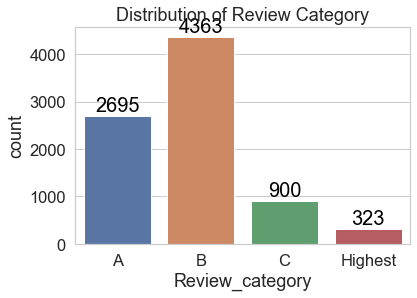

In [2136]:
ax = sns.countplot(data=apps3,x='Review_category')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2,p.get_height()),
               ha='center',va='center',xytext=(0,10),textcoords='offset points',color='black',fontsize=20);
plt.title("Distribution of Review Category");

#### We can see that Review Category B has highest frequency.

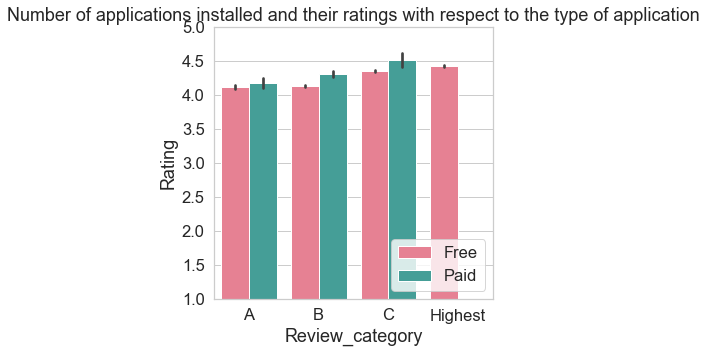

In [2137]:
plt.figure(figsize=(5,5))
x = sns.barplot(x='Review_category', y='Rating', data=apps3, hue='Type', palette='husl')
plt.legend(loc=4)
plt.title('Number of applications installed and their ratings with respect to the type of application')
x.set(ylim=(1,5));

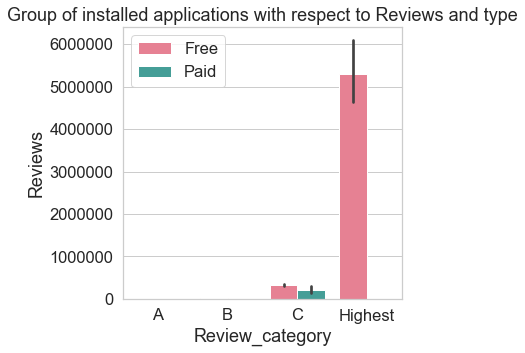

In [2138]:
plt.figure(figsize=(5,5))
sns.barplot(x='Review_category', y='Reviews', data=apps3, hue='Type', palette='husl')
plt.legend(loc=0)
plt.title('Group of installed applications with respect to Reviews and type');

In [2139]:
# Top 5 popular app less than 50MB and having most installed and have highest Reviews
aas = apps3[(apps3['Size']<51200)]
aas = aas.sort_values(by=['Installs','Reviews'], ascending=False).reset_index().drop('index',axis=1)
aas.head(3)

App            Category  Rating  Reviews     Size  \
0  Wifi Connect Library  LIBRARIES_AND_DEMO     3.9    58055  41984.0   
1  Market Update Helper  LIBRARIES_AND_DEMO     4.1    20145  11264.0   
2      ExDialer PRO Key       COMMUNICATION     4.5     5474  17408.0   

   Installs  Type  Price Content Rating            Genres  ...  \
0   5000000  Free   0.00       Everyone  Libraries & Demo  ...   
1   1000000  Free   0.00       Everyone  Libraries & Demo  ...   
2    100000  Paid   3.99       Everyone     Communication  ...   

  Year_of_Updation Price_range        Pri_Genres        Sec_Genres  \
0             2016        Free  Libraries & Demo  Libraries & Demo   
1             2013        Free  Libraries & Demo  Libraries & Demo   
2             2014      0-75 $     Communication     Communication   

  Review_to_Install_Ratio  PriceBand        new lastupdate  \
0                0.011611        NaN 2016-11-07       -639   
1                0.020145        NaN 2013-02-12      -2003   
2                0.054740   3 normal 2014-01-15      -1666   

  Total_money_generated  Review_category  
0                   0.0                B  
1                   0.0                B  
2              399000.0                B  

[3 rows x 25 columns]

#### We can see Apps like Wifi Connect, Market Update amd ExDialer that are of small size but heavily used as they have pretty high installatio and reviews as well.

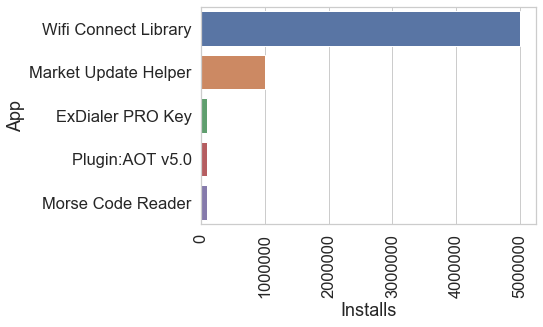

In [2140]:
sns.barplot(data=aas.head(),y='App',x='Installs')
plt.xticks(rotation=90);

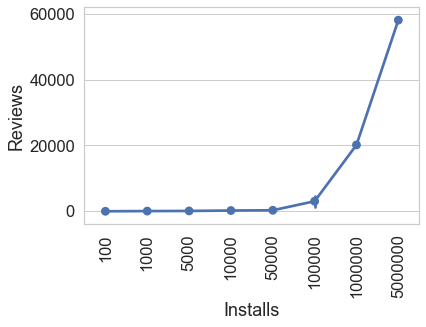

In [2141]:
sns.pointplot(data=aas,y='Reviews',x='Installs',marker='o')
plt.xticks(rotation=90);

#### We can conclude that less size apps have grown exponentially well as their Reviews are pretty high if installation is also high.

In [2143]:
# top 5 suggested Social category applications that have the highest installs which are less than 50MB
ass2 = apps3[(apps3['Category']=='SOCIAL')&(apps3['Size']<50000000)]
ass2 = ass2.sort_values(by='Installs',ascending=False)
ass2.drop_duplicates('App',inplace=True);

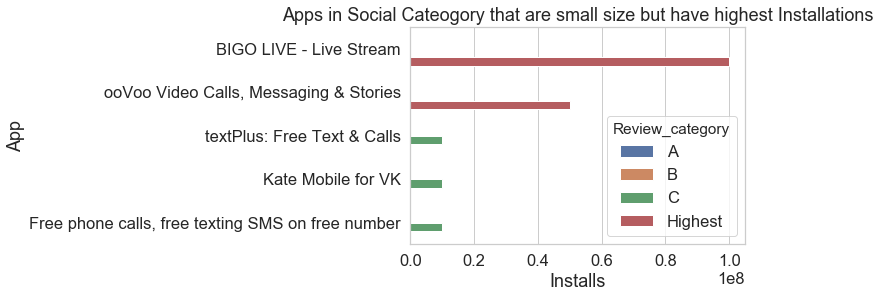

In [2145]:
sns.barplot(data=ass2.head(5),y='App',x='Installs',hue='Review_category');
plt.title("Apps in Social Cateogory that are small size but have highest Installations");

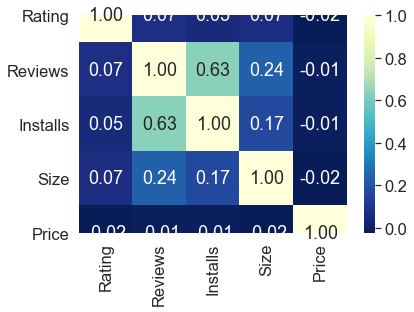

In [2146]:
sns.heatmap(apps3[['Rating','Reviews','Installs','Size','Price']].corr(), annot=True, fmt='.2f', cmap='YlGnBu_r');

In [760]:
#sns.pairplot(apps3,hue = 'Type', palette='Set2')

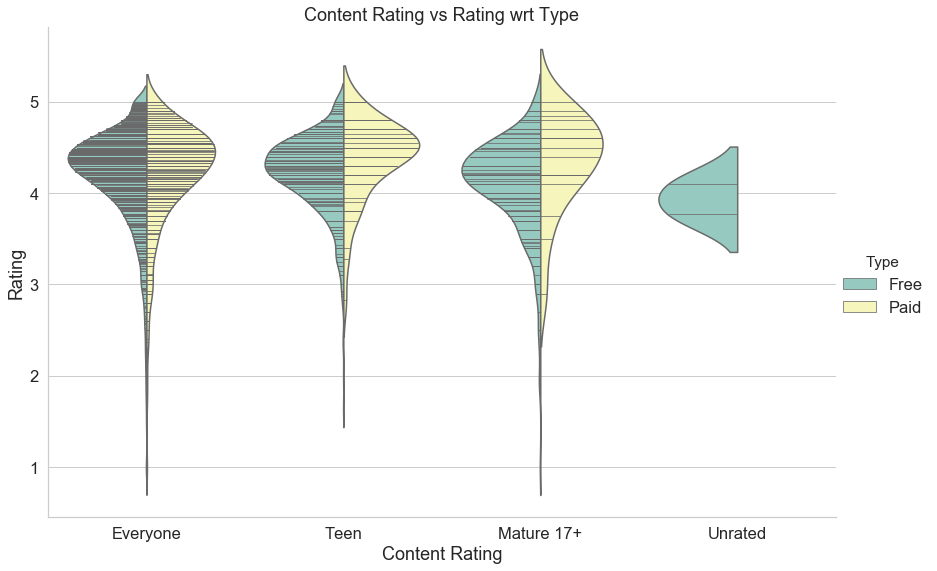

In [2147]:
#for label in ax.get_xticklabels():
#    label.set_rotation(90)

sns.catplot(x = 'Content Rating', y = 'Rating',hue='Type',data=apps,
            kind = 'violin', inner = 'stick', split = True,
            height=8, aspect=1.5, palette='Set3')
plt.title("Content Rating vs Rating wrt Type");

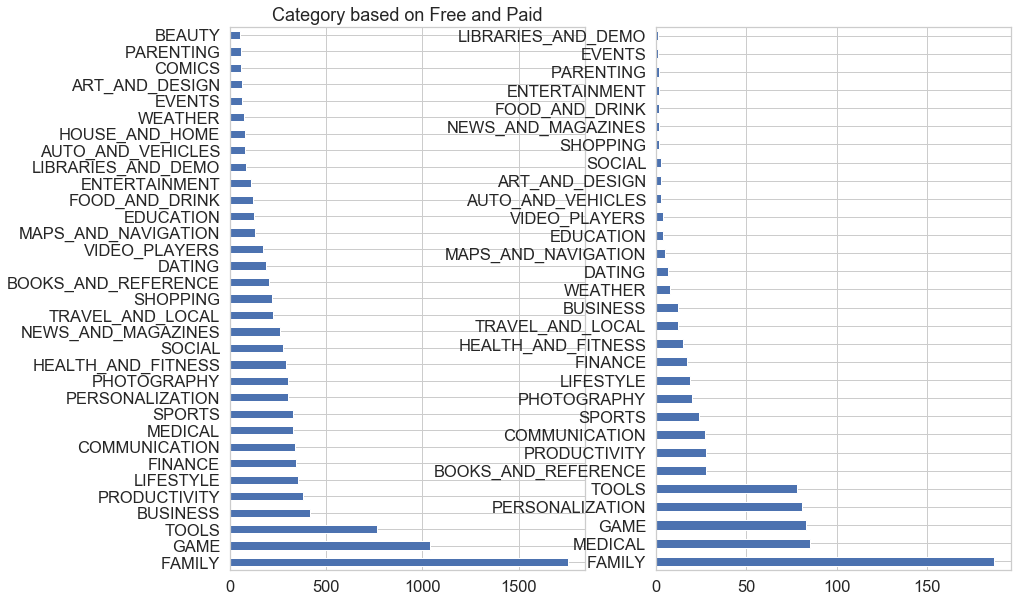

In [2148]:
f,ax=plt.subplots(1,2,figsize=(14,10))
a = apps[apps['Type']=='Free']['Category'].value_counts()
a.plot(kind='barh',ax=ax[0])
ax[0].set_title('Category based on Free and Paid')
b = apps[apps['Type']=='Paid']['Category'].value_counts()
b.plot(kind='barh',ax=ax[1]);
#plt.xticks(rotation=90)

In [2149]:
apps[apps['Type']=='Free']['Category'].value_counts().reset_index().head()

index  Category
0        FAMILY      1756
1          GAME      1038
2         TOOLS       765
3      BUSINESS       415
4  PRODUCTIVITY       379

<Figure size 1152x432 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

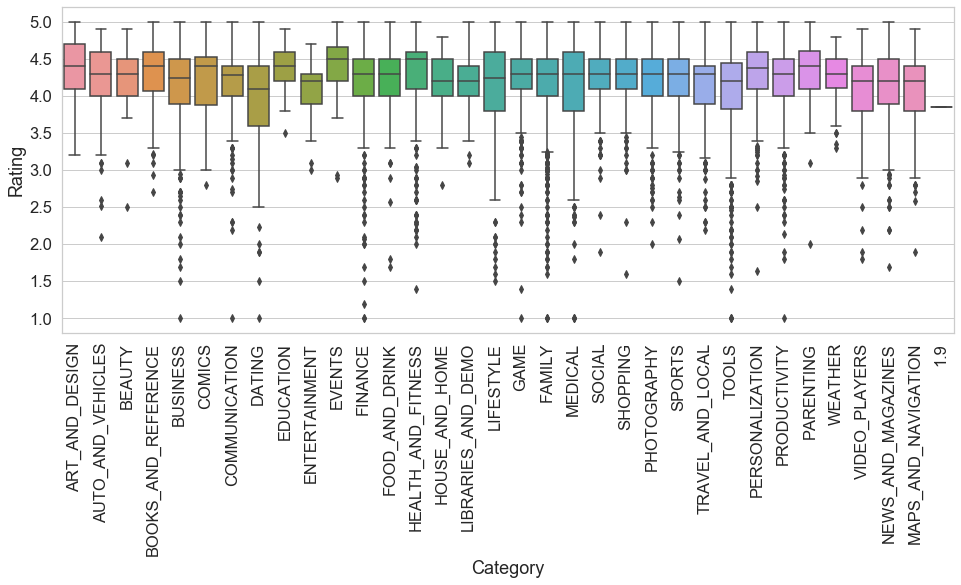

In [764]:
#Rating Analysis for Each Category
plt.figure(figsize=(16,6))
sns.boxplot(data=apps,x='Category',y='Rating')
plt.xticks(rotation=90)
plt.title("Category vs Rating");

#### We can see Categories ratings wrt Categories. But Categories like Education, Libraries-Demo  and Weather have got almost good rating with no ratings less than 3 which is pretty good.

In [168]:
#Now Convert non nemurice value to 'NaN' value
#df['Size'][df['Size' ] == 'Varies with devices'] = np.nan
#df['Size'] = df['Size'].fillna(df['Size'].mean())

In [2150]:
#Printing 10 Apps with 100 million installs and Rating >= 4.5 and Year = 2018 in Entertainment4
top_10_apps_mostRating_2018_mostDownloads = apps3[(apps3['Rating'] >= 4.5) & (apps3['Year_of_Updation']== 2018) & (apps3['Installs'] >= 100000000)]

In [2151]:
top_10_apps_mostRating_2018_mostDownloads = top_10_apps_mostRating_2018_mostDownloads.drop_duplicates('App')

In [2152]:
# For GAME category
ap1 = top_10_apps_mostRating_2018_mostDownloads[top_10_apps_mostRating_2018_mostDownloads['Category']=="GAME"]
ap1 = ap1.sort_values(by='Installs',ascending=False)
ap1.head()

App Category  Rating   Reviews        Size    Installs  \
1654       Subway Surfers     GAME     4.5  27722264  79691776.0  1000000000   
1653               ROBLOX     GAME     4.5   4447388  70254592.0   100000000   
3912  Asphalt 8: Airborne     GAME     4.5   8389714  96468992.0   100000000   
1932       Shadow Fight 2     GAME     4.6  10979062  92274688.0   100000000   
1919          Crossy Road     GAME     4.5   4230886  62914560.0   100000000   

      Type  Price Content Rating                        Genres  ...  \
1654  Free    0.0       Everyone                        Arcade  ...   
1653  Free    0.0       Everyone  Adventure;Action & Adventure  ...   
3912  Free    0.0           Teen                        Racing  ...   
1932  Free    0.0       Everyone                        Action  ...   
1919  Free    0.0       Everyone                        Action  ...   

     Year_of_Updation Price_range  Pri_Genres          Sec_Genres  \
1654             2018        Free      Arcade              Arcade   
1653             2018        Free   Adventure  Action & Adventure   
3912             2018        Free      Racing              Racing   
1932             2018        Free      Action              Action   
1919             2018        Free      Action              Action   

     Review_to_Install_Ratio  PriceBand        new lastupdate  \
1654                0.027722        NaN 2018-07-12        -27   
1653                0.044474        NaN 2018-07-31         -8   
3912                0.083897        NaN 2018-07-04        -35   
1932                0.109791        NaN 2018-07-02        -37   
1919                0.042309        NaN 2018-08-01         -7   

     Total_money_generated  Review_category  
1654                   0.0          Highest  
1653                   0.0          Highest  
3912                   0.0          Highest  
1932                   0.0          Highest  
1919                   0.0          Highest  

[5 rows x 25 columns]

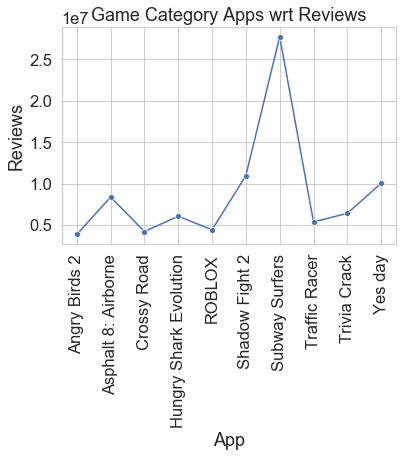

In [2153]:
sns.lineplot(data=ap1.head(10),x='App',y='Reviews',marker='o')
plt.xticks(rotation=90)
plt.title("Game Category Apps wrt Reviews");

#### We can see Subway Surfers, Shadow Fight 2 had got top reviews. 

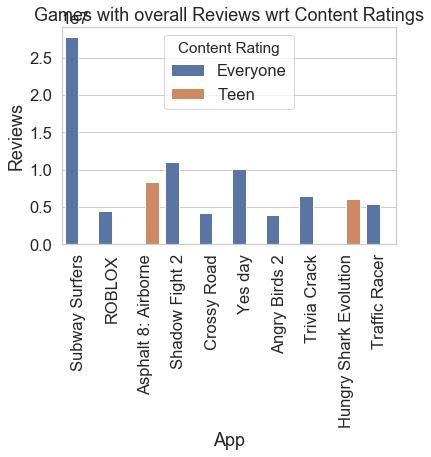

In [2154]:
sns.barplot(data=ap1.head(10),x='App',y='Reviews',hue='Content Rating')
plt.xticks(rotation=90)
plt.title("Games with overall Reviews wrt Content Ratings");

In [2155]:
new_app = apps[['Category','Rating','Android Ver']].copy()

In [2159]:
ab = new_app.groupby('Category').mean().reset_index()
ab.head()

Category    Rating  Android Ver
0       ART_AND_DESIGN  4.358462     3.707692
1    AUTO_AND_VEHICLES  4.183471     3.941176
2               BEAUTY  4.234277     3.905660
3  BOOKS_AND_REFERENCE  4.293754     3.421739
4             BUSINESS  4.127733     3.826698

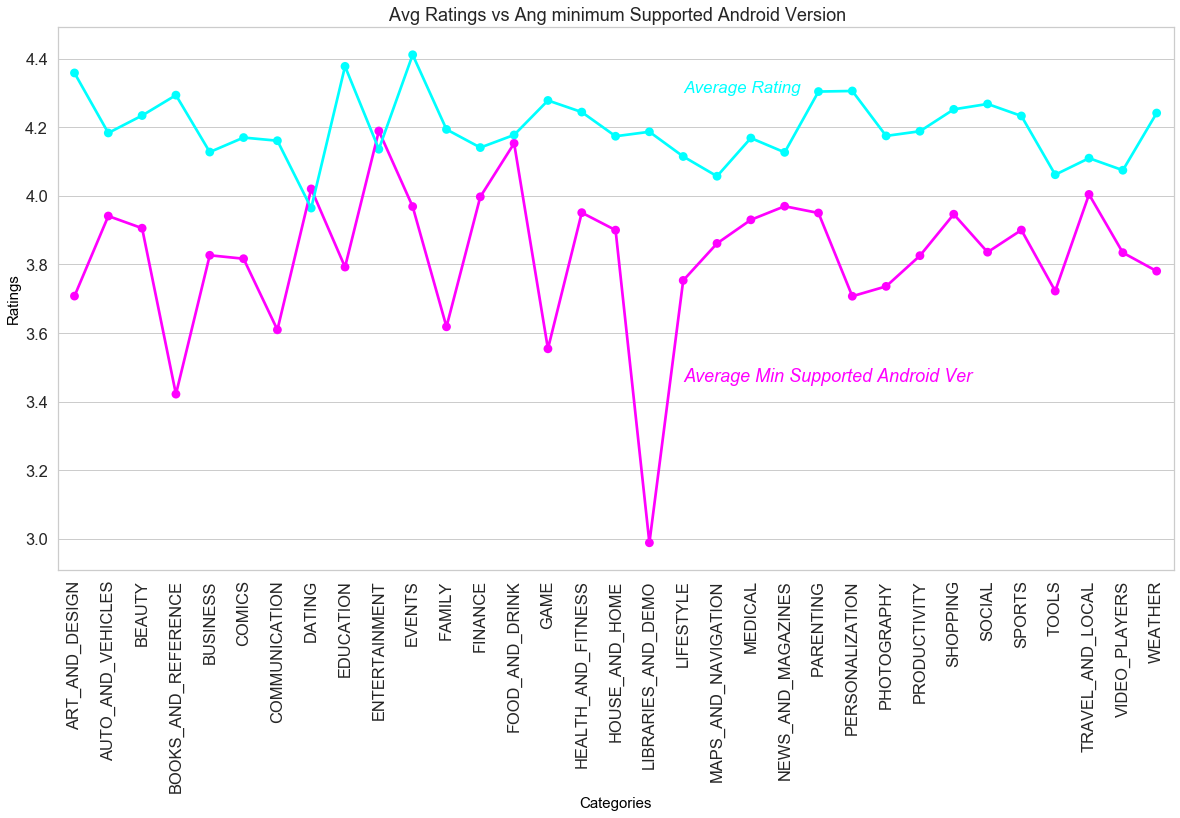

In [2163]:
f,ax2 = plt.subplots(figsize =(20,10))
sns.pointplot(x='Category',y='Android Ver',data=ab,color='magenta',alpha=0.8)
sns.pointplot(x='Category',y='Rating',data=ab,color='aqua',alpha=0.8)
plt.text(x = 18, y = 4.3, s = 'Average Rating', color = 'aqua', fontsize = 17,style = 'italic')
plt.text(x = 18, y = 3.46, s = 'Average Min Supported Android Ver', color='magenta',fontsize = 18,style = 'italic')
plt.xlabel('Categories', fontsize = 15, color = 'black')
plt.ylabel('Ratings', fontsize = 15, color = 'black')
plt.xticks(rotation =90)
plt.title(" Avg Ratings vs Ang minimum Supported Android Version");

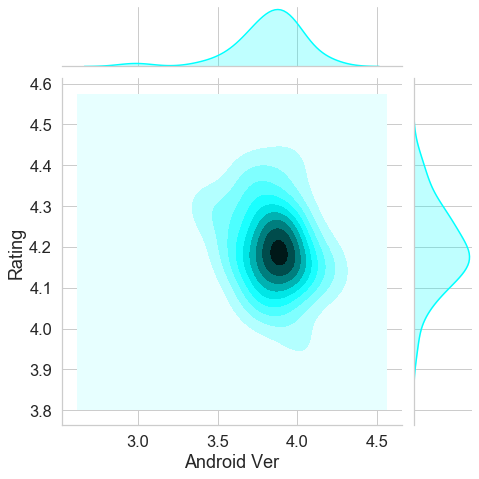

In [2164]:
g = sns.jointplot(ab['Android Ver'], ab['Rating'], kind="kde", height=7, color='aqua')
plt.savefig('graph.png')
plt.show()

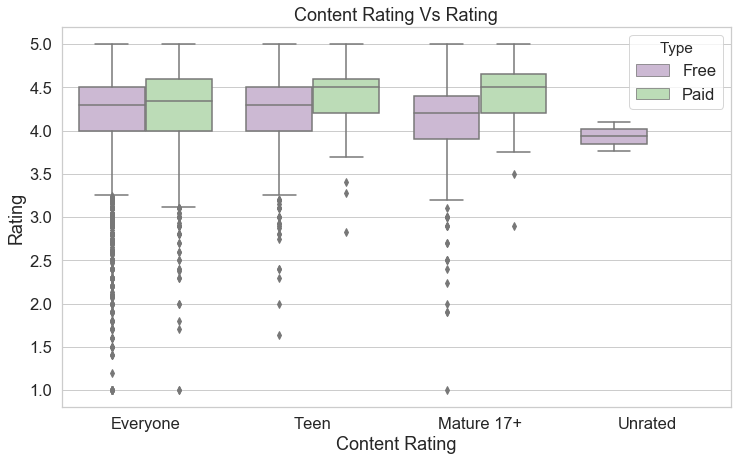

In [2165]:
plt.figure(figsize = (12,7))
sns.boxplot(x='Content Rating', y='Rating', hue='Type', data=apps, palette='PRGn')
plt.title("Content Rating Vs Rating");

In [184]:
#labels = apps['Android Ver'].unique()
#values=[]
#for each in labels:
#    values.append(len(apps[apps['Android Ver']==each]))

# Use `hole` to create a donut-like pie chart
#fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

In [185]:
#plt.subplots(figsize=(25,15))
#wordcloud = WordCloud(
#                          background_color='black',
#                          width=1920,
#                          height=1080
#                         ).generate(" ".join(df.Category))
#plt.imshow(wordcloud)

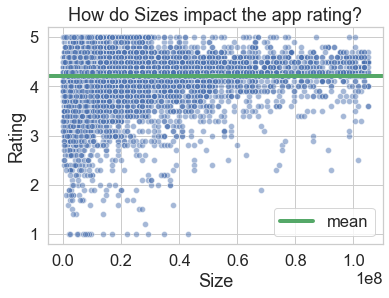

In [186]:
#How do Sizes impact the app rating?
plt.axhline(y=apps.Rating.mean(), linewidth=4, color='g', label="mean")
sns.scatterplot(data=apps3,x='Size',y='Rating',alpha = 0.5)
plt.xlabel('Size')              
plt.ylabel('Rating')
plt.title('How do Sizes impact the app rating?')          
plt.show()

#### AS size increases Ratings increases . That shows heavy apps are performing pretty well.

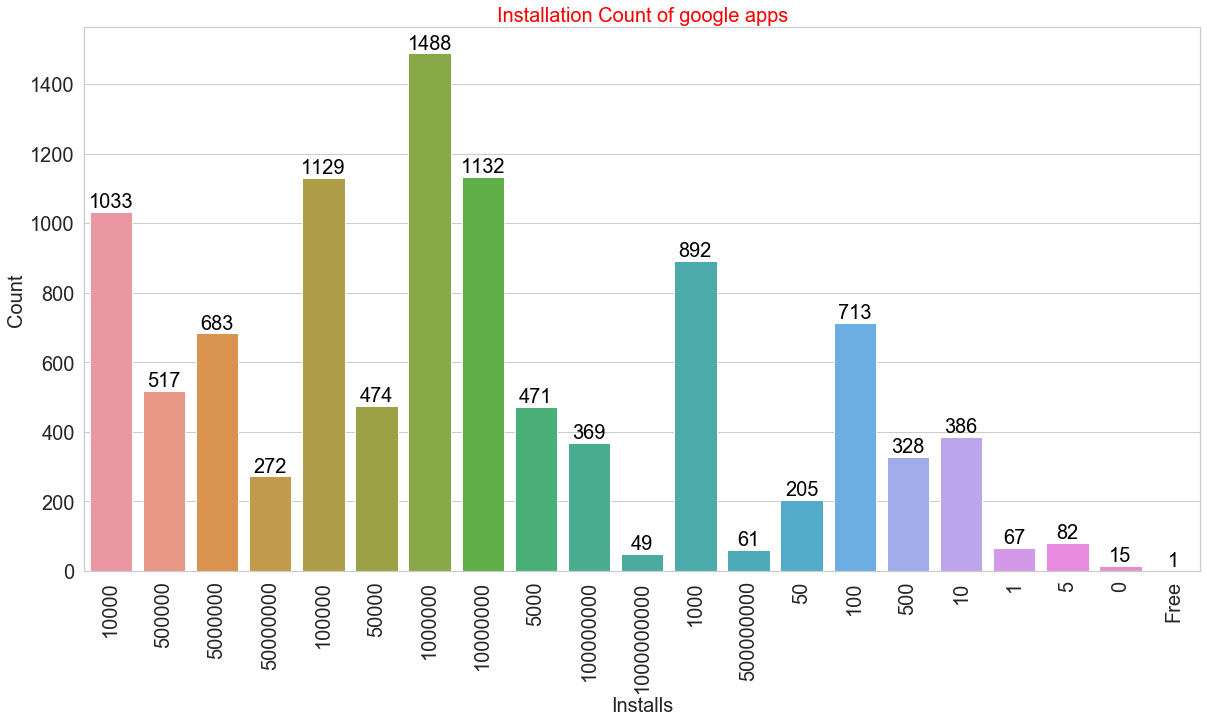

In [775]:
plt.figure(figsize=(20,10))
ax=sns.countplot('Installs',data=apps)
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2,p.get_height()),
               ha='center',va='center',xytext=(0,10),textcoords='offset points',color='black',fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Installs',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Installation Count of google apps',fontsize=20,color='red');

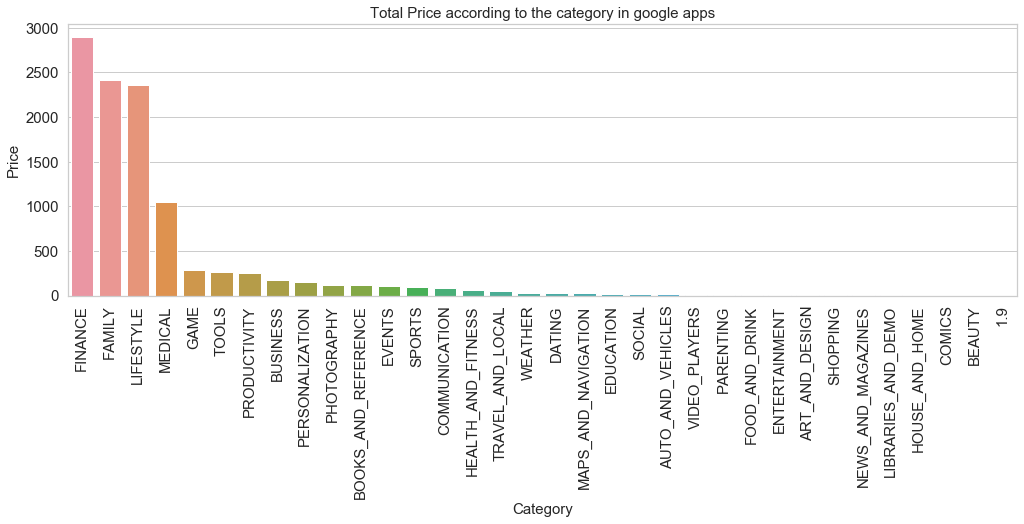

In [776]:
p_price=apps.groupby('Category')['Price'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(17,5))
sns.barplot(x='Category',y='Price',data=p_price)

plt.xlabel('Category',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.title('Total Price according to the category in google apps',fontsize=15);

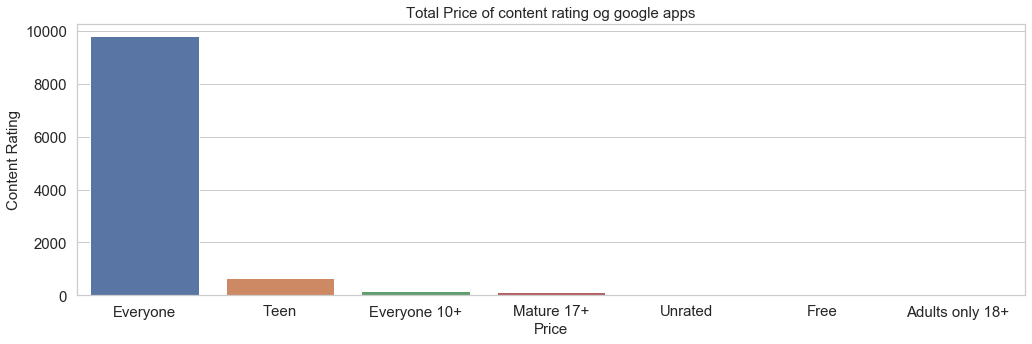

In [777]:
content_price=apps.groupby('Content Rating')['Price'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(17,5))
sns.barplot(x='Content Rating',y='Price',data=content_price)
plt.ylabel('Content Rating',fontsize=15)
plt.xlabel('Price',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Total Price of content rating og google apps',fontsize=15);

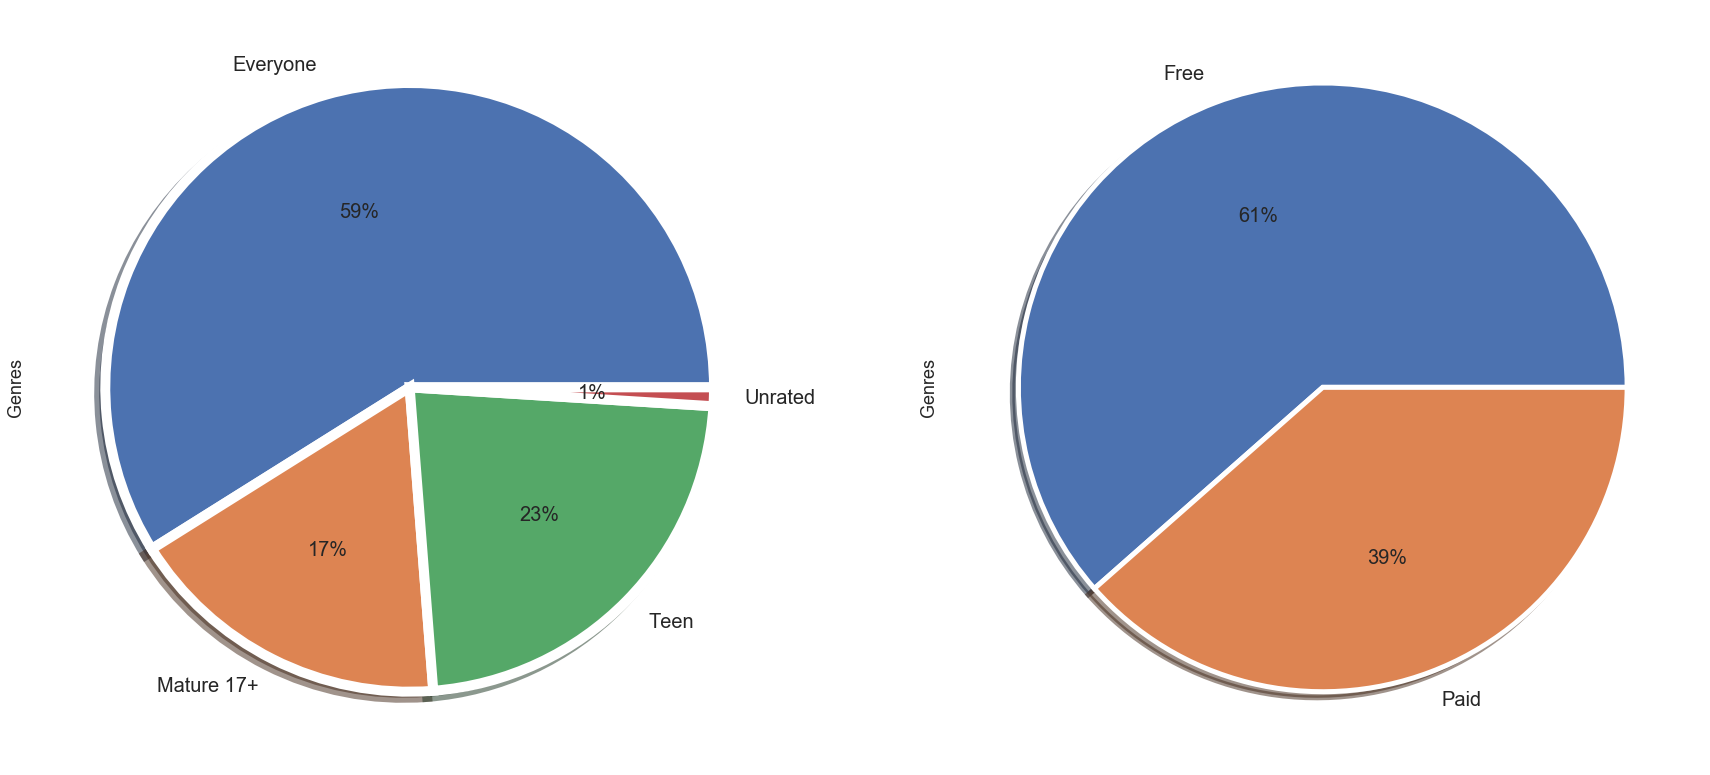

In [2166]:
plt.figure(figsize=(30,20))
plt.subplot(121)
apps.groupby('Content Rating')['Genres'].nunique().plot.pie(autopct='%1.f%%',
                                                             wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                             shadow=True,
                                                             fontsize=20)

plt.subplot(122)
apps.groupby('Type')['Genres'].nunique().plot.pie(autopct='%1.f%%',
                                                             wedgeprops={'linewidth':5,'edgecolor':'white'},
                                                             shadow=True,
                                                             fontsize=20);

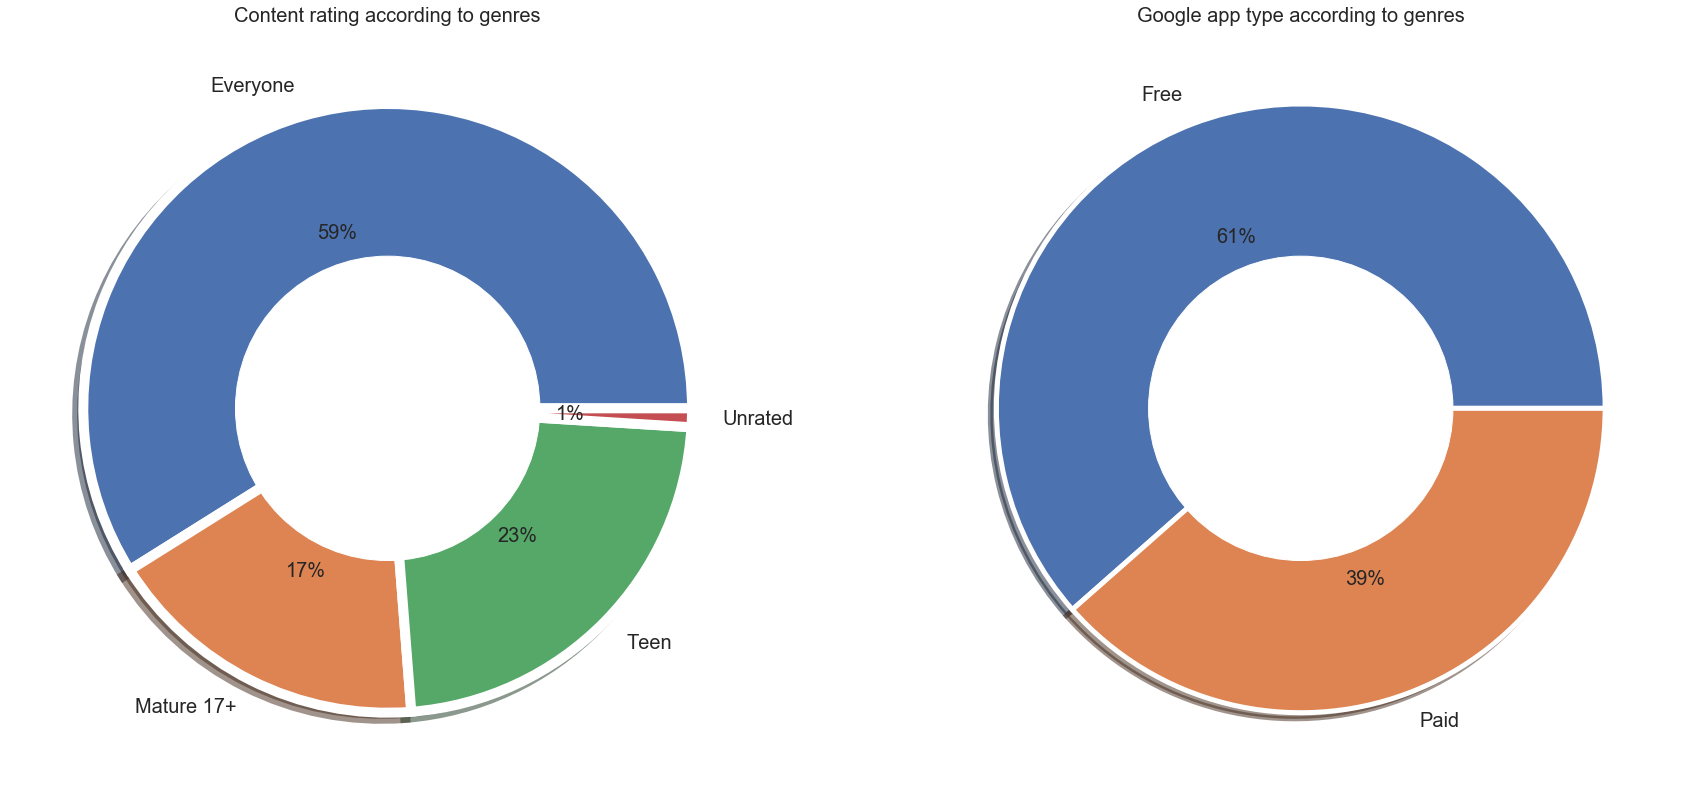

In [2167]:
plt.figure(figsize=(30,20))
plt.subplot(121)
apps.groupby('Content Rating')['Genres'].nunique().plot.pie(autopct='%1.f%%',
                                                             wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                             shadow=True,
                                                             fontsize=20)
plt.ylabel('')
circle=plt.Circle((0,0),0.5,color='white')
plt.gca().add_artist(circle)
plt.title('Content rating according to genres',fontsize=20)

plt.subplot(122)
apps.groupby('Type')['Genres'].nunique().plot.pie(autopct='%1.f%%',
                                                             wedgeprops={'linewidth':5,'edgecolor':'white'},
                                                             shadow=True,
                                                             fontsize=20)
plt.ylabel('')
circle=plt.Circle((0,0),0.5,color='white')
plt.gca().add_artist(circle)
plt.title('Google app type according to genres',fontsize=20);

<Figure size 432x864 with 0 Axes>

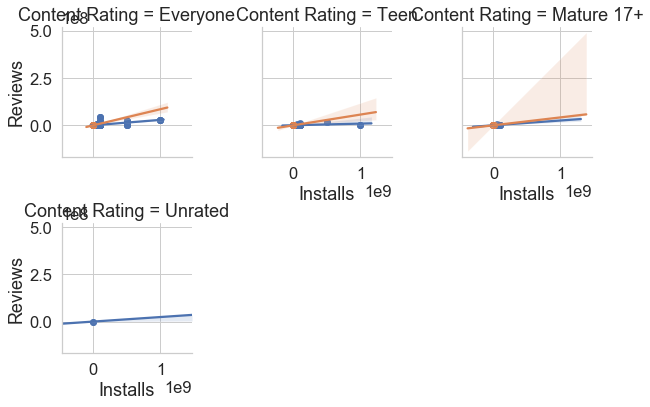

In [2168]:
plt.figure(figsize=(6,12))
g = sns.FacetGrid(apps3,col='Content Rating', hue='Type', col_wrap=3)
g.map(sns.regplot, 'Installs', 'Reviews');

In [194]:
#apps.resample("5d").mean().head()
#gs.resample("W").agg(['mean', 'sum']).head()


In [2169]:
# Apps starting with G
apps[apps['App'].str.startswith('G')].head(2)

App           Category  Rating  Reviews  Size  \
8        Garden Coloring Book     ART_AND_DESIGN     4.4    13791   33M   
56  Gas Prices (Germany only)  AUTO_AND_VEHICLES     4.4      805  5.6M   

    Installs  Type  Price Content Rating           Genres Last Updated  \
8    1000000  Free    0.0       Everyone     Art & Design   2017-09-20   
56     50000  Free    0.0       Everyone  Auto & Vehicles   2018-07-29   

   Current Ver  Android Ver Last_Updated_Month Month_of_Updation  \
8        2.9.2          3.0     September 2017         September   
56       2.5.1          4.0          July 2018              July   

    Year_of_Updation Price_range       Pri_Genres       Sec_Genres  \
8               2017        Free     Art & Design     Art & Design   
56              2018        Free  Auto & Vehicles  Auto & Vehicles   

    Review_to_Install_Ratio  
8                  0.013791  
56                 0.016100

In [2170]:
# Apps ends with G
apps[apps['App'].str.endswith('G')].head(2)

App       Category  Rating  Reviews  Size  Installs  \
205  Polaris Office for LG       BUSINESS     4.2    30847   55M   5000000   
352             Browser 4G  COMMUNICATION     4.3   192948  6.6M  10000000   

     Type  Price Content Rating         Genres Last Updated Current Ver  \
205  Free    0.0       Everyone       Business   2018-02-08      7.3.21   
352  Free    0.0       Everyone  Communication   2018-06-19      24.6.6   

     Android Ver Last_Updated_Month Month_of_Updation  Year_of_Updation  \
205          4.0      February 2018          February              2018   
352          4.0          June 2018              June              2018   

    Price_range     Pri_Genres     Sec_Genres  Review_to_Install_Ratio  
205        Free       Business       Business                 0.006169  
352        Free  Communication  Communication                 0.019295

In [2171]:
apps['Installs'] = apps['Installs'].replace('Free',np.nan)
apps['Installs'] = apps['Installs'].fillna(apps['Installs'].interpolate())
apps['Installs'] = pd.to_numeric(apps['Installs'])

apps.groupby('Category')['Installs'].agg(['mean', 'min', 'max']).astype(int).head()

mean  min         max
Category                                     
ART_AND_DESIGN       1912893    0    50000000
AUTO_AND_VEHICLES     625061    1    10000000
BEAUTY                513151   50    10000000
BOOKS_AND_REFERENCE  8332476    1  1000000000
BUSINESS             2022634    0   100000000

In [2172]:
#Create a lambda function that capitalize strings
capitalizer = apps['Last_Updated_Month'].apply(lambda x: x.capitalize())
capitalizer

0        January 2018
1        January 2018
2         August 2018
3           June 2018
4           June 2018
             ...     
10836       July 2017
10837       July 2018
10838    January 2017
10839    January 2015
10840       July 2018
Name: Last_Updated_Month, Length: 10364, dtype: object

In [2173]:
# Tell the name of the app which has got the max reviews
apps.loc[apps['Reviews'].idxmax(),]['App']

'Facebook'

### Before Applying Models We need to do some feature engineering like converting categorical variables to numericals

### Perfoming 1 hot encoding on Type and Content Rating

In [2174]:
## Before Applying Models We need to do some feature engineering like converting categorical variables to numericals

# Perfoming 1 hot encoding on Type and Column
dummy = pd.get_dummies(apps3['Type'])
dummy

Free  Paid
0         1     0
1         1     0
2         1     0
3         1     0
4         1     0
...     ...   ...
10835     1     0
10836     1     0
10837     1     0
10838     1     0
10840     1     0

[8838 rows x 2 columns]

In [2175]:
apps2 = pd.concat([apps2, dummy], axis=1)

In [2176]:
apps2.drop('Type',axis=1,inplace=True)

In [2177]:
apps2.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

    Reviews Size  Installs  Price Content Rating                     Genres  \
0  1.884407  19M  1.778279    0.0       Everyone               Art & Design   
1  2.361448  14M  2.270835    0.0       Everyone  Art & Design;Pretend Play   

       Last Updated Current Ver   Android Ver  Free  Paid  
0   January 7, 2018       1.0.0  4.0.3 and up   1.0   0.0  
1  January 15, 2018       2.0.0  4.0.3 and up   1.0   0.0

In [2180]:
apps['Content Rating'].value_counts()

Everyone      8764
Teen          1146
Mature 17+     452
Unrated          2
Name: Content Rating, dtype: int64

In [2181]:
# Perfoming 1 hot encoding on Type and Column
dummy1 = pd.get_dummies(apps3['Content Rating'])
dummy1

Everyone  Mature 17+  Teen  Unrated
0             1           0     0        0
1             1           0     0        0
2             1           0     0        0
3             0           0     1        0
4             1           0     0        0
...         ...         ...   ...      ...
10835         1           0     0        0
10836         1           0     0        0
10837         1           0     0        0
10838         1           0     0        0
10840         1           0     0        0

[8838 rows x 4 columns]

In [2182]:
apps2 = pd.concat([apps2, dummy1], axis=1)
apps2.drop('Content Rating',axis =1,inplace=True)
apps2.head(2)

## These Dummy Variable Creating are important for Machine Learning Algorithm to get better Accuracy

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

    Reviews Size  Installs  Price                     Genres  \
0  1.884407  19M  1.778279    0.0               Art & Design   
1  2.361448  14M  2.270835    0.0  Art & Design;Pretend Play   

       Last Updated Current Ver   Android Ver  Free  Paid  Everyone  \
0   January 7, 2018       1.0.0  4.0.3 and up   1.0   0.0       1.0   
1  January 15, 2018       2.0.0  4.0.3 and up   1.0   0.0       1.0   

   Mature 17+  Teen  Unrated  
0         0.0   0.0      0.0  
1         0.0   0.0      0.0

### We can Perform One Hot Encoding with many labels in it on Column Category.

#### The technique I will use is one hot encoding to the 10 most frequent labels of the variable. This means that they would make one binary variable for each of the 10 most frequent labels only.

##### (Solution givin by Winners of the KDD Cup Orange Challenge 2009)

In [2205]:
## Let's find the top 10 most frequent categories for the variable Category

apps3['Category'].value_counts().sort_values(ascending=False).head(10)

FAMILY             1806
GAME               1000
TOOLS               739
MEDICAL             387
BUSINESS            379
PERSONALIZATION     352
LIFESTYLE           338
FINANCE             304
PRODUCTIVITY        299
SPORTS              296
Name: Category, dtype: int64

In [2206]:
# let's make a list with the most frequent categories of the variable

top_10 = [x for x in apps3['Category'].value_counts().sort_values(ascending=False).head(10).index]
top_10

['FAMILY',
 'GAME',
 'TOOLS',
 'MEDICAL',
 'BUSINESS',
 'PERSONALIZATION',
 'LIFESTYLE',
 'FINANCE',
 'PRODUCTIVITY',
 'SPORTS']

In [2213]:
def one_hot_top_x(df, variable, top_x_labels):
        
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(apps2[variable]==label, 1, 0)

In [2214]:
one_hot_top_x(apps2, 'Category',top_10)

In [2217]:
# Removing the Category Column
apps2.drop('Category',axis=1,inplace=True)

In [2218]:
apps2.head(2)

App  Rating   Reviews Size  \
0  Photo Editor & Candy Camera & Grid & ScrapBook     4.1  1.884407  19M   
1                             Coloring book moana     3.9  2.361448  14M   

   Installs  Price                     Genres      Last Updated Current Ver  \
0  1.778279    0.0               Art & Design   January 7, 2018       1.0.0   
1  2.270835    0.0  Art & Design;Pretend Play  January 15, 2018       2.0.0   

    Android Ver  ...  Category_FAMILY  Category_GAME  Category_TOOLS  \
0  4.0.3 and up  ...                0              0               0   
1  4.0.3 and up  ...                0              0               0   

   Category_MEDICAL  Category_BUSINESS  Category_PERSONALIZATION  \
0                 0                  0                         0   
1                 0                  0                         0   

   Category_LIFESTYLE  Category_FINANCE  Category_PRODUCTIVITY  \
0                   0                 0                      0   
1                   0                 0                      0   

   Category_SPORTS  
0                0  
1                0  

[2 rows x 26 columns]

### We can see top 10 Categories have been comverted to Numeric and the data has also become nice for creating Machine Learning Models.

In [2]:
import statistics as sts
from statistics import mode

# Descriptie Statistics #

In [268]:
apps4 = apps3.copy()
print("Mean of Rating: " + str(round(apps4.Rating.mean(),2)) + " Median of Rating:" + str(round(apps4.Rating.median(),2)))

Mean of Rating: 4.19 Median of Rating:4.3


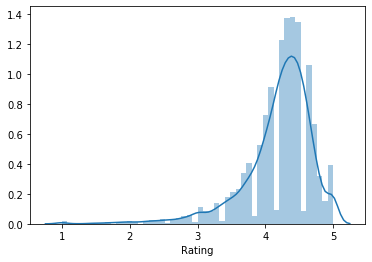

In [305]:
sns.distplot(apps4['Rating'],norm_hist=True)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



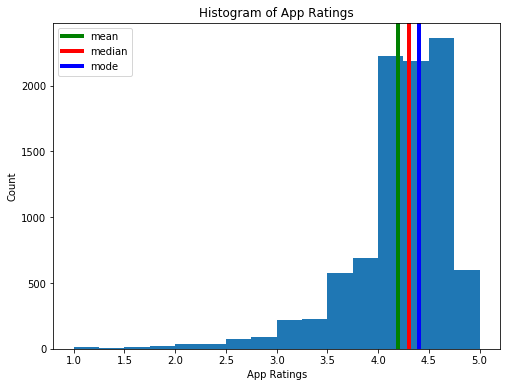

In [294]:
#apps4 = pd.read_csv('googleplaystore.csv')

plt.figure(figsize=(8,6))
plt.hist(apps4.Rating, range=(1,5), bins=16)
plt.axvline(x=apps4.Rating.mean(), linewidth=4, color='g', label="mean")
plt.axvline(x=apps4.Rating.median(), linewidth=4, color='r', label="median")
plt.axvline(x=mode(apps4['Rating']), linewidth=4, color='b', label="mode")
plt.xlabel("App Ratings")
plt.ylabel("Count")
plt.title("Histogram of App Ratings")
plt.legend();

In [ ]:
#We can see the variable mean is smaller than median that means Skweness is towords Left(-ve skewness).

Text(0.5, 1.0, 'Price Variation')

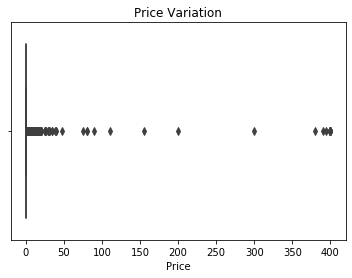

In [325]:
sns.boxplot(data=apps4,x='Price')
plt.title("Price Variation")

In [323]:
# Seeing the variance

va1 = apps4['Rating'].var()

print("Variance: " + str(round(va1,2)))

#-> We can see the variance is too large to compare the dispersion of age, we have to use standard deviation

#Cal standard deviation and coff of variation (sd/mean) of age
staDev = apps4['Rating'].std()

print("Standard Deviation: " + str(round(staDev,2)))

#To Compare 2 variable we need coff of variance

coffOfVariation = apps4['Rating'].std()/apps4['Rating'].mean()
coffOfVariation

print("Coffecient of Varaition: " + str(round(coffOfVariation,2)))

Variance: 0.27
Standard Deviation: 0.52


0.12351456784249806

Coffecient of Varaition: 0.12


##### We can see the coff of variation is 0.12

#### It is pretty low so we can say there is very high variation of price for some of the paid apps wrt to Category.

#### The lower the coefficient of variation, the less the level of dispersion around the mean, as u can see from the plot.

### Q1) Calculate covariance and correlation coefficient between ratings and Price

In [334]:
cov = apps4['Rating'].cov(apps4['Price'])

print("Covarience: " + str(cov))

# cal corelation coeff (corelation adjust covariance, so that relationship b/w 2 variables become easy to understand)

#(corelation coeff = cov(x,y)/sd(x).sd(y), -1 to 1 range)

sdMul = apps4['Rating'].std()*apps4['Price'].std()

corelation_coeff_Rating_Price = apps4['Rating'].cov(apps4['Price'])/sdMul
print("Correlation Coefficient: " + str(corelation_coeff_Rating_Price))

## It shows -ve corelation coeff and covariance that means the both variable move in opposite direction so we can say

# As the price gets higher the ratings get lower .i.e Paid apps are not that well compared to Free Apps.

Covarience: -0.1658923644807918
Correlation Coefficient: -0.020095831571528194


#### It shows -ve corelation coeff and covariance that means the both variable move in opposite direction so we can say

#### As the price gets higher the ratings get lower .i.e Paid apps are not that well compared to Free Apps.

### Q2)Compare Price distribution of Top 3 apps Category.

In [338]:
top10_rating_eachApp.head(3)

# These are the Top 3 apps Category so we will compare these

Category  1 star  2 star  3 star  4 star  5 star
11   FAMILY     3.0    21.0   122.0  1370.0   427.0
14     GAME     2.0     3.0    29.0   874.0   213.0
29    TOOLS     4.0    22.0    90.0   587.0   140.0

In [446]:
family = apps4[(apps4['Category'] == 'FAMILY') & (apps4['Price'] > 0)]['Price'].head(78)
game = apps4[(apps4['Category'] == 'GAME') & (apps4['Price'] > 0)]['Price'].head(78)
tools = apps4[(apps4['Category'] == 'TOOLS') & (apps4['Price'] > 0)]['Price'].head(78)

In [447]:
family = family.reset_index()
family.columns = ['index','Price']
family.drop('index',axis=1,inplace=True)
#family['Price'] = round(family['Price'],1)

game = game.reset_index()
game.columns = ['index','Price']
game.drop('index',axis=1,inplace=True)

tools = tools.reset_index()
tools.columns = ['index','Price']
tools.drop('index',axis=1,inplace=True)

price = pd.concat([family,game,tools],axis=1)
price.columns=['Family_price','Game_price','Tool_price']
price.head()

Family_price  Game_price  Tool_price
0          3.99        2.99        1.99
1          2.99        1.99        4.99
2          3.99        4.99        1.49
3          2.99        4.99       14.99
4          3.99        4.99       25.99

In [450]:
# Comparing variance, Standard deviation and cofficient of variation of 3 Category Price

v1_Family = price['Family_price'].var()

print("Variance of Family Category: " + str(round(v1_Family,2)))

v2_Game = price['Game_price'].var()

print("Variance of Game Category: " + str(round(v2_Game,2)))

v3_Tool = price['Tool_price'].var()

print("Variance of Tool Category: " + str(round(v3_Tool,2)))



#-> Since var is has a square unit we cant compare so we calculate sd

sd1_Family = price['Family_price'].std()

print("Standard Deviation of Family Category: " + str(round(sd1_Family,2)))

sd2_Game = price['Game_price'].std()

print("Standard Deviation of Game Category: " + str(round(sd2_Game,2)))

sd3_Tool = price['Tool_price'].std()

print("Standard Deviation of Tool Category: " + str(round(sd3_Tool,2)))



#-> We need to cal coff of variation of comparision b/w the ratings

coff_family = price['Family_price'].std()/price['Family_price'].mean()
print("Coff of variance of Family Category: " + str(round(coff_family,2)))

coff_game = price['Game_price'].std()/price['Game_price'].mean()
print("Coff of variance of Game Category: " + str(round(coff_game,2)))

coff_tool = price['Tool_price'].std()/price['Tool_price'].mean()
print("Coff of variance of Tool Category: " + str(round(coff_tool,2)))

Variance of Family Category: 7645.0
Variance of Game Category: 8.49
Variance of Tool Category: 13.11
Standard Deviation of Family Category: 87.44
Standard Deviation of Game Category: 2.91
Standard Deviation of Tool Category: 3.62
Coff of variance of Family Category: 3.59
Coff of variance of Game Category: 0.86
Coff of variance of Tool Category: 1.06


#### We can see that all 3 have coff of variation  almost >1. So we can conclude their price variablity is highly distributed around the mean specially Family Category.

# Infertial Statistical  #

In [217]:
# Statistical Analysis

# Taking sample

sample_data =  apps4.sample(700)
sample_data.shape

(700, 13)

###  1) Calculating Confidence Interval of average Rating of Apps

In [238]:
# Confidence Interval = (Sample Mean + Margin of Error , Sample Mean - Margin of Error)

# Margin of Error = (critical value) * (SD)/(sqrt(Sample Size))    (Standard_Error = (SD)/(sqrt(Sample Size))
  

#Step1) Calculating mean, sd and SE
m1 = sample_data['Rating'].mean()

sd1 =sample_data['Rating'].std()

sample_size = len(sample_data)

SE =  sd1/np.sqrt(sample_size)

print("Mean is: "+ str(round(m1,2)) + " Standard Deviation is: " + str(round(sd1,2)) + " Standard Error is: " + str(round(SE,2)))

Mean is: 4.21 Standard Deviation is: 0.5 Standard Error is: 0.02


In [249]:
#Step2) Finding T statistic 
# Degree of Freedom = n-1 = 700-1 = 699 and for 95% confidence i.e alpha is 5% so alpha/2 is .25

import scipy.stats as stats

t_statistic = stats.t.ppf(q=.95,df=699)
t_statistic

1.6470364637535286

In [500]:
#Step3) using the formula to find confidence interval 

#### [mean(ages2) - 1.65*SE , mean(ages2) + 1.65*SE]

CI_lowerLimit = m1 - t_statistic * SE
CI_upperLimit = m1 + t_statistic * SE

print("We are 95% confident that the average Rating of Apps is between: " + "(" + str(round(CI_lowerLimit,2)) + " , " + str(round(CI_upperLimit,2)) + ")")

We are 95% confident that the average Rating of Apps is between: (4.18 , 4.24)


#### We are 95% confident that the average Rating of Apps is between: (4.18 , 4.24)





### Q2) Calculating Confidence Interval of average Rating of Family Category Apps

In [517]:
# Confidence Interval = (Sample Mean + Margin of Error , Sample Mean - Margin of Error)

# Margin of Error = (critical value) * (SD)/(sqrt(Sample Size))    (Standard_Error = (SD)/(sqrt(Sample Size))
  
sample_data2 =  apps4[apps4['Category']=='FAMILY'].sample(700)
sample_data2.shape

#Step1) Calculating mean, sd and SE
m1 = sample_data2['Reviews'].mean()

sd1 =sample_data2['Reviews'].std()

sample_size = len(sample_data2)

SE =  sd1/np.sqrt(sample_size)

print("Mean is: "+ str(round(m1,2)) + " Standard Deviation is: " + str(round(sd1,2)) + " Standard Error is: " + str(round(SE,2)))

(700, 13)

Mean is: 188353.48 Standard Deviation is: 944482.54 Standard Error is: 35698.08


In [518]:
#Step2) Finding T statistic 
# Degree of Freedom = n-1 = 700-1 = 699 and for 95% confidence i.e alpha is 5% so alpha/2 is .25

import scipy.stats as stats

t_statistic = stats.t.ppf(q=.95,df=699)
t_statistic

1.6470364637535286

In [519]:
#Step3) using the formula to find confidence interval 

#### [mean(ages2) - 1.65*SE , mean(ages2) + 1.65*SE]

CI_lowerLimit = m1 - t_statistic * SE
CI_upperLimit = m1 + t_statistic * SE

print("We are 95% confident that the average Reviews of Apps is between: " + "(" + str(round(CI_lowerLimit,2)) + " , " + str(round(CI_upperLimit,2)) + ")")

We are 95% confident that the average Reviews of Apps is between: (129557.44 , 247149.53)


#### We are 95% confident that the average Reviews of Apps is between: (129557.44 , 247149.53)




### Q3) Calculating Confidence Interval of average Installs of Apps for Category Family wrt Price

In [2189]:
# Calculating Confidence Interval of average Installs of Apps for Category Family wrt Price
family_paid = apps[(apps['Category'] == 'FAMILY') & (apps['Price'] > 0)]['Installs']

family_free = apps[(apps['Category'] == 'FAMILY') & (apps['Price'] == 0)]['Installs'].head(191)

In [2190]:
family_paid = family_paid.reset_index()
family_paid.columns = ['index','Installs']
family_paid.drop('index',axis=1,inplace=True)

family_free = family_free.reset_index()
family_free.columns = ['index','Installs']
family_free.drop('index',axis=1,inplace=True)

installs = pd.concat([family_paid,family_free],axis=1)
installs.columns=['Paid_Apps_Installs','Free_Apps_Installs']
installs.head()

Paid_Apps_Installs  Free_Apps_Installs
0              5000.0            50000000
1              5000.0            10000000
2              1000.0           100000000
3               500.0             1000000
4            100000.0             5000000

In [2186]:
installs['Paid_Apps_Installs'] = pd.to_numeric(installs['Paid_Apps_Installs'])
installs['Free_Apps_Installs'] = pd.to_numeric(installs['Free_Apps_Installs'])

In [480]:
# Step1)Cal mean and sd

m1_free = installs['Free_Apps_Installs'].mean()
m2_paid = installs['Paid_Apps_Installs'].mean()

sd1_free = installs['Free_Apps_Installs'].std()
sd2_paid = installs['Paid_Apps_Installs'].std()

print("Mean of Free Apps: " + str(round(m1_free,2)) + " Standard deviation of Free Apps:" + str(round(sd1_free)))
print("Mean of Paid Apps: " + str(round(m2_paid,2)) + " Standard deviation of Paid Apps:" + str(round(sd2_paid)))

print("Total number of Installation: " + str(len(installs)))

Mean of Free Apps: 9539900.52 Standard deviation of Free Apps:20586486.0
Mean of Paid Apps: 163726.77 Standard deviation of Paid Apps:1029624.0
Total number of Installation: 191


In [503]:
#Step2) Calculate unbiased estimator i.e pooled sample variance
pooled_variance = 190*20586486*20586486  + 190*1029624*1029624 /380
polled_variance = 21243176570478
polled_sd = np.sqrt(21243176570478)
polled_sd

4609032.064379461

In [505]:
# Step3) Calculating Student's T statistic

#Degree of freedom is 191 + 191 -2 =380 and confidence level is 95%
import scipy.stats as stats

t_stat = stats.t.ppf(q=.95,df=380)
t_stat

#appling formula
lower_bound = (9539900.52 - 163726.77) - t_stat*np.sqrt(212431765704786/24 + 212431765704786/24)
upper_bound = (9539900.52 - 163726.77) + t_stat*np.sqrt(212431765704786/24 + 212431765704786/24)

print("We are 95% confident that Free Apps Installs for Family Category is greater than Paid Apps by margin of :")
print("(" + str(round(lower_bound,2)) + " , " + str(round(upper_bound,2))+ ")")

1.6488733988968423

We are 95% confident that Free Apps Installs for Family Category is greater than Paid Apps by margin of :
(2438619.09 , 16313728.41)


#### We are 95% confident that Free Apps Installs for Family Category is greater than Paid Apps by margin of : (2438619.09 , 16313728.41)

## Hypothesis Testing  ##

### Q1) Find if the average Size of Apps in Tools is greater than 9000000 or not.


In [564]:
#Test at 5% significance. Calculate the p-value of the test

#Taking sample of 200 ages
tools_size = apps3[apps3['Category']=='TOOLS']['Size'].sample(200)

# Step1) Writing null and alternative hypothesis 

# H0:mean of tools App Size is > 9000000
# H1:mean of tools App Size is < 9000000

# Its a one-sided tail test

# Step2) Cal the mean,sd and SE
m1_size = tools_size.mean()

sd1_size = tools_size.std()

SE = sd1_size/np.sqrt(200) # SE-> Standard Error

print("Mean of tools: " + str(round(m1_size,2)) + " Std of tools: " + str(round(sd1_size,2)) + " SE is:" + str(round(SE,2)))

Mean of tools: 9406344.19 Std of tools: 10994093.28 SE is:777399.79


In [619]:
# Step3) Finding T Score

# T=  x - hyphosis_mean(x) / SE

T_score , p_value = stats.ttest_1samp(a=tools_size,popmean=9196363.03)

# Step4) Finding Critical T value and comapring
# as degree of freedom is 200 -1 = 199 and we are caluclation at alpha=0.05 (95%)

t_critical = stats.t.ppf(q=.95,df=199)
print("Critical t value: " + str(round(t_critical,3)) + ", T score is: " + str(T_score))

Critical t value: 1.653, T score is: 0.27010704711358513


In [ ]:
#0.27 < 1.653 i.e  T< t

#### As per decision rule if absoulte value of T score < critical t, we can't reject the Null Hyphothesis

#### So,We accept the null Hyphothesis test

#### So, at 95% level of significance we can 't say if the average app size of Tools is less than 9000000

In [593]:
# Step4) Finding P value

T_score , p_value = stats.ttest_1samp(a=tools_size,popmean=9196363.03)

print("P value: " + str(round(p_value,2)))

# The p-value is .79 

#### 0.79 > 0.05 i.e P > alpha so as per decision rule we accept the null hyphothsis

#### So at 5% significance level we can't say that the average app size of Tools is less than 9000000

#### The result is Not Significant


# If we test at 1% significat level

#0.79 > 0.01 i.e P > alpha therefore, we cannot reject the null hypothesis.

#### So at 1% significance level we can't say that the average app size of Tools is less than 9000000

#### The result is Not Significant

P value: 0.79


In [599]:
## Find if the average Ratings of Apps in Game Category is less than 4 or not.

#Test at 5% significance. Calculate the p-value of the test

#Taking sample of 350 ages
game_ratings = apps3[apps3['Category']=='GAME']['Rating'].sample(350)

# Step1) Writing null and alternative hypothesis 

# H0:mean of game Category rating < 4
# H1:mean of game Category rating > 4

# Its a one-sided tail test

# Step2) Cal the mean,sd and SE
m1_rating = game_ratings.mean()

sd1_rating = game_ratings.std()

SE_rating = sd1_rating/np.sqrt(350) # SE-> Standard Error

print("Mean of Ratings: " + str(round(m1_rating,2)) + " Std of Ratings: " + str(round(sd1_rating,2)) + " SE is:" + str(round(SE_rating,2)))

Mean of Ratings: 4.14 Std of Ratings: 0.45 SE is:0.02


In [620]:
# Step3) Finding T Score

# T=  x - hyphosis_mean(x) / SE
population_mean = apps3[apps3['Category']=='GAME']['Rating'].mean()

T_score = (population_mean - 4)/ SE_rating

# Step4) Finding Critical T value and comapring
# as degree of freedom is 350 -1 = 349 and we are caluclation at alpha=0.05 (95%)

t_critical = stats.t.ppf(q=.95,df=349)
print("Critical t value: " + str(round(T_critical,3)) + ", T score is: " + str(T_score))

Critical t value: 1.649, T score is: 5.717213651432623


In [618]:
# 5.71 > 1.649 i.e  T > t

#### As per decision rule if absoulte value of T score > critical t, we reject Null Hyphothesis

#### We accept the Alternate Hyphothesis test

#### So, at 95% level of significance we can say that average Ratings of Apps in Game Category is greater than 4.

In [629]:
# Step4) Finding P value

#As per the P value calculator wrt T Score ,DF ,Significance Level ,One-tailed
p_value = 0.00001

print("P value: " + str(p_value))

P value: 1e-05


#### The p-value is .00001

#### -> test at 5% significat level

#### .00001 < 0.05 i.e P < alpha so as per decision rule we reject the null hyphothsis

#### So at 5% significance level we can say that average Ratings of Apps in Game Category is greater than 4.

### The result is Significant

#### -> If we test at 1% significat level

#### .00001 < 0.01 i.e P < alpha therefore, we reject the null hypothesis.

#### So at 1% significance level we can say that average Ratings of Apps in Game Category is greater than 4.

### The result is Significant




### Q2) See if Installs in Category TOOLS and GAME wrt TYPE paid are same or not.

In [1041]:
tools_paid = apps4[(apps4['Category'] == 'TOOLS') & (apps4['Type'] == 'Paid')]['Installs']

game_paid = apps4[(apps4['Category'] == 'GAME') & (apps4['Type'] == 'Paid')]['Installs'].head(78)

tools_paid = tools_paid.reset_index()
tools_paid.columns = ['index','Installs']
tools_paid.drop('index',axis=1,inplace=True)

game_paid = game_paid.reset_index()
game_paid.columns = ['index','Installs']
game_paid.drop('index',axis=1,inplace=True)

installs_all = pd.concat([tools_paid,game_paid],axis=1)
installs_all.columns=['Tools_Paid_Apps_Installs','Game_Paid_Apps_Installs']
installs_all.head(10)

Tools_Paid_Apps_Installs  Game_Paid_Apps_Installs
0                       100                   100000
1                      5000                   100000
2                      1000                   100000
3                      5000                   100000
4                        10                   100000
5                       100                   100000
6                     10000                   100000
7                        50                   100000
8                     10000                   100000
9                      5000                      100

In [1052]:
# Step1) Writing null and alternative hypothesis 

# H0: mean(tools) = mean(games)  i.e mean(tools) - mean(games) = 0
# H1: mean(tools) != mean(games) i.e mean(tools) - mean(games) != 0

# Step2) Cal mean and sd

m1_tools = installs_all['Tools_Paid_Apps_Installs'].mean()
m2_games = installs_all['Game_Paid_Apps_Installs'].mean()

sd1_tools = installs_all['Tools_Paid_Apps_Installs'].std()
sd2_games = installs_all['Game_Paid_Apps_Installs'].std()

print("Mean of Tools Category: " + str(round(m1_tools,2)) + " Standard deviation of Tools Category:" + str(round(sd1_tools)))
print("Mean of Games Category: " + str(round(m2_games,2)) + " Standard deviation of Games Category:" + str(round(sd2_games)))

print("Total number of Installation: " + str(len(installs_all)))

SE1 = sd1_tools/np.sqrt(156)
SE2 = sd2_games/np.sqrt(156)

SE = SE1+SE2 # SE-> Standard Error
print("Standard Error is: "+ str(round(SE,2)))

Mean of Tools Category: 22146.68 Standard deviation of Tools Category:114450.0
Mean of Games Category: 256280.31 Standard deviation of Games Category:1152922.0
Total number of Installation: 78
Standard Error is: 101470.98


In [1167]:
#Step3) Calculate unbiased estimator i.e pooled sample variance

#degree_freedom<- 78+78-2 
degree_freedom= 154

# using formula of Pooled variance -> (n1-1)*sd1^2 + (n2-1)*sd2^2 /(n1+n2-2) 
pooled_variance = 77*114450*114450 + 77*1152922*1152922 /156  
polled_variance = 671163970292.0
polled_sd = np.sqrt(671163970292.0)
polled_sd

819245.9766712316

In [1060]:
# Step4) Finding T Score
#t_score <- diff of sample mean - diff of hyphothsis mean / SE

#t_score <- (m2 - m1) - 0 /SE
T_score = (m2_games - m1_tools) - 0 /SE
T_score = 2.307

# Step5) Finding Critical T value and comapring

#Degree of freedom is 78 + 78 -2 = 156 and confidence level is 95%

t_critical = stats.t.ppf(q=.95,df=156)
print("Critical t value: " + str(round(t_critical,3)) + ", T score is: " + str(T_score))

Critical t value: 1.655, T score is: 2.307


In [1061]:
# 2.307 > 1.655 i.e  T> t

#### As per decision rule if absoulte value of T score > critical t, we reject Null Hyphothesis

#### We accept the Alternate Hyphothesis test

#### The Result is Significant

####-> So, at 95% level of significance we can say that average installs for Category Tools and Games wrt Type are NOT SAME

In [1075]:
# Step6) Finding P value

#As per the P value calculator wrt T Score ,DF ,Significance Level ,One-tailed
p_value = .02237

print("P value: " + str(p_value))

P value: 0.02237


#### The p-value is .02237

#### -> If we test at 5% significat level

#### .02 < 0.05 i.e P < alpha so as per decision rule we reject the null hyphothsis

#### So at 5% significance level  we can say that average installs for Category Tools and Games wrt Type are NOT SAME

### The result is Significant

#### -> If we test at 1% significat level

#### .02 > 0.010 i.e P > alpha i.e P > alpha so as per decision rule we accept the null hyphothsis

#### We see if we take at 1% significant level, We have to accept Null Hyphothsis i.e average installations are same.

### The result won't be Significant

#### So upto .02237 the result is significant after that result is not significant 

### Its upto statistician which value he want to take.

### Q3) See if Price in Category PERSONALIZATION and MEDICAL wrt price >0 and Content Rating Everyone are same or not.

In [1153]:
#See if Price in Category PERSONALIZATION and MEDICAL wrt price >0 and Content Rating Everyone are same or not.

personization_price = apps4[(apps4['Category'] == 'PERSONALIZATION') & (apps4['Price']>0) & (apps4['Content Rating']=='Everyone')]['Price']
medical_price = apps4[(apps4['Category'] == 'MEDICAL') & (apps4['Price']>0) & (apps4['Content Rating']=='Everyone')]['Price'].head(83)

personization_price = personization_price.reset_index()
personization_price.columns = ['index','price']
personization_price.drop('index',axis=1,inplace=True)

medical_price = medical_price.reset_index()
medical_price.columns = ['index','price']
medical_price.drop('index',axis=1,inplace=True)

price_all = pd.concat([personization_price,medical_price],axis=1)
price_all.columns=['Personaization_Apps_Price','Medical_Apps_Price']
price_all.tail(5)

Personaization_Apps_Price  Medical_Apps_Price
78                       2.49                2.99
79                       0.99               24.99
80                       0.99               19.99
81                       0.99                2.99
82                       0.99                0.99

In [1189]:
# Step1) Writing Null and Alternative Hyphothesis 

# H0: mean(personalization) = mean(medical)  i.e mean(personalization) - mean(medical) = 0
# H1: mean(personalization) != mean(medical) i.e mean(personalization) - mean(medical) != 0

# Step2) Cal mean and sd

m1_personalization = price_all['Personaization_Apps_Price'].mean()
m2_medical = price_all['Medical_Apps_Price'].mean()

sd1_personalization = price_all['Personaization_Apps_Price'].std()
sd2_medical = price_all['Medical_Apps_Price'].std()

print("Mean of personalization Category: " + str(round(m1_personalization,2)) + " Standard deviation of personalization Category:" + str(round(sd1_personalization,2)))
print("Mean of medical Category: " + str(round(m2_medical,2)) + " Standard deviation of medical Category:" + str(round(sd2_medical,2)))

print("Total number of Installation: " + str(len(price_all)))

SE1 = sd1_personalization/np.sqrt(166)
SE2 = sd2_medical/np.sqrt(166)

SE = SE1+SE2 # SE-> Standard Error
print("Standard Error is: "+ str(round(SE,2)))

Mean of personalization Category: 1.85 Standard deviation of personalization Category:1.48
Mean of medical Category: 13.16 Standard deviation of medical Category:15.8
Total number of Installation: 83
Standard Error is: 1.34


In [1196]:
# Step3) Cal Pooled Sample variance

#degree_freedom = 83+83-2 
degree_freedom = 164

# using formula of Pooled variance -> (n1-1)*sd1^2 + (n2-1)*sd2^2 /(n1+n2-2)
pooled_variance = 82*sd1_personalization*sd1_personalization + 82*sd2_medical*sd2_medical /164
polled_variance = 125.99
polled_sd = np.sqrt(125.99)
polled_sd

11.224526716080282

In [1200]:
# Step4) Finding T score

# T_score <- (m2 - m1) - 0 /SE
T_score = (m2_medical - m1_personalization) - 0 
T_score = T_score/SE

# Step5) Finding Critical t value and comapring

#Degree of freedom is 83 + 83 -2 = 166 and confidence level is 95%

t_critical = stats.t.ppf(q=.95,df=166)
print("Critical t value: " + str(round(t_critical,3)) + ", T score is: " + str(T_score))

Critical t value: 1.654, T score is: 8.425506773588038


In [1199]:
# 8.42 > 1.654 i.e  T> t

#### As per decision rule if absoulte value of T score > critical t, we reject Null Hyphothesis

#### We accept the Alternate Hyphothesis test'

#### The Result is Significant

#### So, at 95% level of significance we can say that price for Category PERSONALIZATION and MEDICAL wrt price >0 
####  and Content Rating Everyone are not same.

8.435820895522388

In [1209]:
# Step 6) Calculate P value

#As per the P value calculator wrt T Score ,DF ,Significance Level ,One-tailed
p_value = .000001

# calculating using T statistic
t_critical,p_value2 = stats.ttest_ind(a=price_all['Personaization_Apps_Price'],b=price_all['Medical_Apps_Price'],equal_var=False)

print("P value: " + str(p_value2))

P value: 5.850522329092536e-09


#### The p-value is .000001

#### -> If we test at 5% significat level

#### .000001 < 0.05 i.e P < alpha so as per decision rule we reject the null hyphothsis

#### So at 5% significance level  we can say that price for Categories wrt Content Rating (Everyone) are not same.

### The result is Significant

#### -> If we test at 1% significat level

#### .000001 > 0.010 i.e P < alpha so as per decision rule we reject the null hyphothsis

#### So at 1% significance level  we can say that price for Categories wrt Content Rating (Everyone) are not same.

### The result is Significant